# Latar Belakang dan Pernyataan Masalah


Pandemi Covid-19 yang terjadi di seluruh dunia telah berdampak pada semua sektor kehidupan dan industri, salah satunya adalah di sektor industri property. Berdasarkan website [sumber informasi](https://www.abc.net.au/news/2022-03-24/six-ways-pandemic-reshaped-australias-housing-market-corelogic/100933182#:~:text=According%20to%20CoreLogic's%20Home%20Value,by%20%24173%2C805%2C%20to%20be%20%24728%2C034.) pada saat awal pandemi dari awal April hingga September 2020 harga property di Australia rata-rata turun hingga 2,1% akan tetapi pada awal Oktober 2020 hingga Februari 2022 harga rumah melonjak naik hingga 24.6% dan juga terdapat lonjakan dari jumlah pembeli property selama rentang tersebut. Hal ini juga tidak terlepas dari kebijakan Bank Sentral Australia yang memberlakukan relaksasi bunga bank selama rentang waktu 2020 hingga 2024 serta berbagai stimulus lainnya. 

Berdasarkan peningkatan gairah pasar property di Australia seperti yang telah dijelaskan sebelumnya, sebuah perusahaan agen property yang telah beroperasi di berbagai *Capital City* di Australia, seperti Sydney, Brisbane, Adelaide, dan Perth akan membuka kantor barunya di Melbourne sebagai salah satu *Capital City* di Australia. Pihak management perusahaan tersebut menilai bahwa pasar property Kota Melbourne memiliki potensi yang sangat bagus di masa depan. Hal ini berdasarkan kepada keadaan Kota Melbourne yang telah bebas dari *lockdown*, peningkatan konsumsi masyarakat, peningkatan sektor ekonomi, dan banyaknya lapangan pekerjaan yang dibuka [(sumber)](https://propertyupdate.com.au/property-investment-melbourne/#is-it-the-right-time-to-get-into-the-melbourne-property-market).

Akan tetapi perusahaan tersebut masih belum mengetahui peta keadaan property pada Kota Melbourne, apalagi dengan keadaan peningkatan harga property yang sangat bervariasi di setiap daerah di Melbourne, karena terdapat *local supply and demand* [(sumber)](https://propertyupdate.com.au/property-investment-melbourne/#is-it-the-right-time-to-get-into-the-melbourne-property-market). Perusahaan tersebut juga berencana akan membuat paket-paket jenis property yang akan digunakan dalam strategi pemasaran kepada para calon pembeli property. Oleh karena itu, mereka menyewa konsultan data scientist agar dapat menganalisa keadaan pasar property di Kota Melbourne secara lebih tepat dan holistik, selain itu data scientist juga dapat membuat jenis-jenis paket property berdasarkan pengelompokan klsuter. Pengelompokan kluster dari property ini bertujuan untuk membantu pihak perusahaan dalam memasarkan dan menjual property. Pihak perusahaan juga dapat dengan mudah mengetahui segmentasi pasar property berdasarkan hasil dari pengelompokan kluster. Keuntungan lain dari pengelompokan kluster ini adalah pihak perusahaan akan dengan mudah menjelaskan kepada para calon pembeli spesifikasi dari setiap kluster, sehingga para pembeli tidak kebingungan dalam mencari property yang sesuai dengan keinginan dan kemampuan finansialnya. Selain itu persebaran kluster property dalam kota ini akan dengan mudah menjadi bahan analisis lanjutan bagi perusahaan ini.

Dataset yang digunakan dalam project ini berasal dari website Kaggle [(Kaggle)](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot).

In [1]:
# Library

# Data analisis dan visualisasi data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Statistik
from scipy.stats import normaltest

# Pre-processing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
import category_encoders as ce

# Models
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

# Evaluation
from sklearn.metrics import silhouette_score

# Data

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('melb_data.csv')
df

Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
0        Biggin   3/12/2016       2.5    3067.0       2.0       1.0  1.0   
1        Biggin   4/02/2016       2.5    3067.0       2.0       1.0  0.0   
2        Biggin   4/03/2017       2.5    3067.0       3.0       2.0  0.0   
3        Biggin   4/03/2017       2.5    3067.0       3.0       2.0  1.0   
4        Nelson   4/06/2016       2.5    3067.0       3.0       1.0  2.0   
...         ...         ...       ...       ...       ...       ...  ...   
13575     Barry  26/08/2017      16.7    3150.0       4.0       2.0  2.0   
13576  Williams  26/08/2017       6.8    3016.0       3.0       2.0  2.0   
13577     Raine  26/08/2017       6.8    3016.0       3.0       2.0  4.0   
13578   Sweeney  26/08/2017       6.8    3016.0       4.0       1.0  5.0   
13579   Village  26/08/2017       6.3    3013.0       4.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0         202.0           NaN        NaN       Yarra  -37.79960   144.99840   
1         156.0          79.0     1900.0       Yarra  -37.80790   144.99340   
2         134.0         150.0     1900.0       Yarra  -37.80930   144.99440   
3          94.0           NaN        NaN       Yarra  -37.79690   144.99690   
4         120.0         142.0     2014.0       Yarra  -37.80720   144.99410   
...         ...           ...        ...         ...        ...         ...   
13575     652.0           NaN     1981.0         NaN  -37.90562   145.16761   
13576     333.0         133.0     1995.0         NaN  -37.85927   144.87904   
13577     436.0           NaN     1997.0         NaN  -37.85274   144.88738   
13578     866.0         157.0     1920.0         NaN  -37.85908   144.89299   
13579     362.0         112.0     1920.0         NaN  -37.81188   144.88449   

                       Regionname  Propertycount  
0           Northern Metropolitan         4019.0  
1           Northern Metropolitan         4019.0  
2           Northern Metropolitan         4019.0  
3           Northern Metropolitan         4019.0  
4           Northern Metropolitan         4019.0  
...                           ...            ...  
13575  South-Eastern Metropolitan         7392.0  
13576        Western Metropolitan         6380.0  
13577        Western Metropolitan         6380.0  
13578        Western Metropolitan         6380.0  
13579        Western Metropolitan         6543.0  

[13580 rows x 21 columns]

In [4]:
df_describe =[]

for i in df.columns:
    df_describe.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])

In [5]:
desc=pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique'])
desc

column     type   nan   nan%  nunique  \
0          Suburb   object     0   0.00      314   
1         Address   object     0   0.00    13378   
2           Rooms    int64     0   0.00        9   
3            Type   object     0   0.00        3   
4           Price  float64     0   0.00     2204   
5          Method   object     0   0.00        5   
6         SellerG   object     0   0.00      268   
7            Date   object     0   0.00       58   
8        Distance  float64     0   0.00      202   
9        Postcode  float64     0   0.00      198   
10       Bedroom2  float64     0   0.00       12   
11       Bathroom  float64     0   0.00        9   
12            Car  float64    62   0.46       11   
13       Landsize  float64     0   0.00     1448   
14   BuildingArea  float64  6450  47.50      602   
15      YearBuilt  float64  5375  39.58      144   
16    CouncilArea   object  1369  10.08       33   
17      Lattitude  float64     0   0.00     6503   
18     Longtitude  float64     0   0.00     7063   
19     Regionname   object     0   0.00        8   
20  Propertycount  float64     0   0.00      311   

                                               unique  
0   [Abbotsford, Airport West, Albert Park, Alphin...  
1   [85 Turner St, 25 Bloomburg St, 5 Charles St, ...  
2                        [2, 3, 4, 1, 6, 5, 8, 7, 10]  
3                                           [h, u, t]  
4   [1480000.0, 1035000.0, 1465000.0, 850000.0, 16...  
5                                 [S, SP, PI, VB, SA]  
6   [Biggin, Nelson, Jellis, Greg, LITTLE, Collins...  
7   [3/12/2016, 4/02/2016, 4/03/2017, 4/06/2016, 7...  
8   [2.5, 13.5, 3.3, 6.4, 13.8, 11.1, 6.3, 5.9, 11...  
9   [3067.0, 3042.0, 3206.0, 3078.0, 3018.0, 3025....  
10  [2.0, 3.0, 4.0, 1.0, 6.0, 5.0, 0.0, 8.0, 9.0, ...  
11      [1.0, 2.0, 3.0, 4.0, 0.0, 7.0, 5.0, 6.0, 8.0]  
12  [1.0, 0.0, 2.0, 6.0, 5.0, 4.0, 3.0, 8.0, 7.0, ...  
13  [202.0, 156.0, 134.0, 94.0, 120.0, 181.0, 245....  
14  [nan, 79.0, 150.0, 142.0, 210.0, 107.0, 75.0, ...  
15  [nan, 1900.0, 2014.0, 1910.0, 1890.0, 2005.0, ...  
16  [Yarra, Moonee Valley, Port Phillip, Darebin, ...  
17  [-37.7996, -37.8079, -37.8093, -37.7969, -37.8...  
18  [144.9984, 144.9934, 144.9944, 144.9969, 144.9...  
19  [Northern Metropolitan, Western Metropolitan, ...  
20  [4019.0, 3464.0, 3280.0, 2211.0, 5301.0, 5132....

**Pengertian Data per-Kolom**

1. Suburb: Sub-Kota yang merupakan bagian kota pinggiran atau kota satelit (data kategori, 314 nilai unik).
2. Address: Alamat dari masing-masing property (data kategori, 13378 nilai unik).
3. Rooms: Jumlah ruangan pada property (data numerik).
4. Type: Tipe dari property (data kategori, 3 nilai unik).
    * h: rumah, cottage, villa, terrace
    * u: unit, duplex, apartment
    * t: perumahan (townhouse), daerah pengembangan
5. Price: Harga property (data numerik).
6. Method: Status penjualan dan cara penjualan property (data kategori, 5 nilai unik).
    * S: property terjual
    * SP: property yang sebelumnya masuk ke dalam list terjual
    * PI: property yang baru masuk ke pelelangan untuk dijual
    * SA: property yang terjual seteleah pelelangan
    * VB: property yang ditawar oleh vendor property
7. SellerG: Nama-nama agen real estate (data kategori, 268 nilai unik).
8. Date: Tanggal penjualan property (data kategori, 58 nilai unik).
9. Distance: Jarak property dari *Central Business District (CBD)* (data numerikal).
10. Postcode: Kode pos setiap daerah di Kota Melbourne (data numerikal).
11. Bedroom2: Jumlah kamar tidur pada property yang didapatkan dari website lain (scrapping) (data numerikal).
12. Bathroom: Jumlah kamar mandi pada property (data numerikal).
13. Car: Jumlah penyimpanan mobil/garasi pada property (data numerikal).
14. Landsize: Luas tanah property (data numerikal).
15. BuildingArea: Luas bangunan property (data numerikal).
16. YearBuilt: Tahun dimana property dibangun (data numerikal).
17. CouncilArea: Nama-nama dewan pengurus daerah setempat (data kategori, 33 nilai unik).
18. Lattitude: Koordinat garis lintang dari lokasi setiap property (data numerik).
19. Longtitude: Koordinat garis bujur dari lokasi setiap property (data numerik).
20. Propertycount: Jumlah property yang ada pada suburb (data numerikal).
21. Regionname: Pembagian daerah secara umum pada Kota Melbourne (West, North West, North, North east …etc) (data kategori, 8 nilai unik).

# Pemahaman Kondisi Property dan Data Cleansing

Asumsi dan interpretasi dari keadaan pasar property Kota Melbourne:            

* Pada Kota Melbourne, sepertinya property **dapat dijual secara langsung ataupun dapat dijual melalui pelelangan kota.**
* Kita dapat mengetahui property yang dijual berdasarkan informasi dari kolom method dan secara umum property dibagi menjadi **property yang telah terjual (S-Sold)** dan **masih belum terjual (SP,PI,SA,VB).**
* Date menunjukkan tanggal penjualan dari property dan dapat diinterpretasikan sebagai berikut:
    * Date pada Method S (Sold) menunjukan tanggal penjualan property dan property tersebut tidak dijual kembali atau dengan kata lain pembeli property membeli property dan tidak menjualnya kembali.
    * Date pada Method SP,PI,SA,VB menunjukan tanggal penjualan property sebelum property tersebut dijual kembali atau dengan kata lain pembeli property membeli property kemudian menjualnya kembali melalui berbagai Method.

Dalam memahami kondisi property pada dataset ini dan juga dalam memudahkan dalam proses *data cleansing*, saya akan membaginya ke dalam beberapa kelompok berdasarkan keadaan pasar property Kota Melbourne, kesamaan tipe data dan hubungan antar kolom, berikut adalah kelompok-kelompoknya:
1. Status Penjualan: Method.
2. Tanggal dan harga jual: Price, Date.
3. Lokasi: Suburb, Address, Regionname, Lattitude, Longtitude, Postcode, Distance.
4. Spesifikasi rumah: Rooms, Type, Bedroom2, Bathroom, Car, Landsize, Building Area, Year Built.
5. Other data: SellerG, Property count, Council Area.

## Check Data Duplicate
Kita akan mengecheck data yang duplikat berdasarkan kolom Address

### Check Menggunakan Fungsi Manual

In [6]:
# Looping proses untuk mencari nilai duplikat pada Address
# Proses ini memakan waktu yang sangat lama sehingga saya save dataframe berisi data duplicate ke dalam csv
#index_dup=[]
#for i in range(len(df)):
#    for j in range(len(df)):
#        if i == j:
#            continue
#        elif df.loc[i,'Address']==df.loc[j,'Address']:
#            index_dup.append(i)
#        else:
#            continue

In [7]:
# Save dataframe berisi nilai duplikat kedalam duplicate.csv
# df.loc[index_dup].to_csv('duplicate.csv')

In [8]:
# Panggil data csv duplikat
df_dup=pd.read_csv('duplicate.csv')
df_dup.rename(columns={'Unnamed: 0':'Real Index'}, inplace=True)

In [9]:
df_dup

Real Index           Suburb         Address  Rooms Type      Price  \
0             2       Abbotsford    5 Charles St      3    h  1465000.0   
1             2       Abbotsford    5 Charles St      3    h  1465000.0   
2            39     Airport West   50 Bedford St      3    h   730000.0   
3            40     Airport West   50 Bedford St      3    h   770000.0   
4           115      Albert Park     6 Brooke St      2    h   980000.0   
..          ...              ...             ...    ...  ...        ...   
417       13371    Brighton East    375 South Rd      5    h  1650000.0   
418       13383          Burwood  23 Cromwell St      3    h  1238000.0   
419       13421        Footscray     39 Moore St      3    h   755000.0   
420       13429  Frankston South     3 Diosma Ct      3    h  1155000.0   
421       13444     Hampton East     3 Besant St      3    h  1280000.0   

    Method        SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  \
0       SP         Biggin   4/03/2017       2.5    3067.0       3.0       2.0   
1       SP         Biggin   4/03/2017       2.5    3067.0       3.0       2.0   
2       VB         Nelson   3/12/2016      13.5    3042.0       3.0       2.0   
3       SP         Nelson   4/03/2017      13.5    3042.0       3.0       2.0   
4        S           Greg  28/05/2016       3.3    3206.0       2.0       1.0   
..     ...            ...         ...       ...       ...       ...       ...   
417     SP         Hodges  26/08/2017      10.3    3187.0       5.0       2.0   
418      S         Buxton  26/08/2017      10.4    3125.0       3.0       2.0   
419     PI  hockingstuart  26/08/2017       5.1    3011.0       3.0       1.0   
420      S  hockingstuart  26/08/2017      38.0    3199.0       3.0       2.0   
421     SP         Buxton  26/08/2017      13.8    3188.0       3.0       1.0   

     Car  Landsize  BuildingArea  YearBuilt    CouncilArea  Lattitude  \
0    0.0     134.0         150.0     1900.0          Yarra  -37.80930   
1    0.0     134.0         150.0     1900.0          Yarra  -37.80930   
2    1.0       0.0         145.0     1965.0  Moonee Valley  -37.72030   
3    1.0       0.0         145.0     1965.0  Moonee Valley  -37.72030   
4    0.0      79.0          68.0     1890.0   Port Phillip  -37.83870   
..   ...       ...           ...        ...            ...        ...   
417  5.0     773.0         275.0     1950.0            NaN  -37.93203   
418  1.0     735.0           NaN        NaN            NaN  -37.85296   
419  2.0     334.0         110.0     1920.0            NaN  -37.79770   
420  2.0    2405.0         242.0     1980.0            NaN  -38.16457   
421  3.0     658.0           NaN        NaN            NaN  -37.94259   

     Longtitude                  Regionname  Propertycount SimplifiedMethod  
0     144.99440       Northern Metropolitan         4019.0        Available  
1     144.99440       Northern Metropolitan         4019.0        Available  
2     144.87550        Western Metropolitan         3464.0        Available  
3     144.87550        Western Metropolitan         3464.0        Available  
4     144.95190       Southern Metropolitan         3280.0             Sold  
..          ...                         ...            ...              ...  
417   145.02844       Southern Metropolitan         6938.0        Available  
418   145.10550       Southern Metropolitan         5678.0             Sold  
419   144.90398        Western Metropolitan         7570.0        Available  
420   145.12421  South-Eastern Metropolitan         7566.0             Sold  
421   145.03004       Southern Metropolitan         2356.0        Available  

[422 rows x 23 columns]

In [10]:
#Terlihat bahwa nilai jumlah nilai unik paling kecil adalah 2, yang berarti pada df_dup semuanya berisi data duplicate
df_dup['Address'].value_counts()

5 Charles St         6
13 Robinson St       6
36 Aberfeldie St     6
2 Bruce St           6
14 Arthur St         6
                    ..
1/16 Mawbey St       2
11 Nottingham St     2
10/2 Howlett St      2
2/27 Pakington St    2
1/16 Osborne Av      2
Name: Address, Length: 193, dtype: int64

In [11]:
#Terlihat bahwa terdapat 6 property dengan Address '5 Charles St', tetapi pada tiga Suburbs yang berbeda
df_dup[df_dup['Address']=='5 Charles St']

Real Index          Suburb       Address  Rooms Type      Price Method  \
0             2      Abbotsford  5 Charles St      3    h  1465000.0     SP   
1             2      Abbotsford  5 Charles St      3    h  1465000.0     SP   
89         2779       Glen Iris  5 Charles St      4    h  2010000.0      S   
90         2779       Glen Iris  5 Charles St      4    h  2010000.0      S   
188        6046  Sunshine North  5 Charles St      4    h   705000.0      S   
189        6046  Sunshine North  5 Charles St      4    h   705000.0      S   

      SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
0      Biggin   4/03/2017       2.5    3067.0       3.0       2.0  0.0   
1      Biggin   4/03/2017       2.5    3067.0       3.0       2.0  0.0   
89   Marshall  10/12/2016       9.2    3146.0       4.0       2.0  2.0   
90   Marshall  10/12/2016       9.2    3146.0       4.0       2.0  2.0   
188   Douglas  25/02/2017      13.3    3020.0       4.0       2.0  1.0   
189   Douglas  25/02/2017      13.3    3020.0       4.0       2.0  1.0   

     Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0       134.0         150.0     1900.0       Yarra   -37.8093    144.9944   
1       134.0         150.0     1900.0       Yarra   -37.8093    144.9944   
89      659.0         212.0     1930.0  Boroondara   -37.8509    145.0916   
90      659.0         212.0     1930.0  Boroondara   -37.8509    145.0916   
188     570.0           NaN        NaN    Brimbank   -37.7749    144.8329   
189     570.0           NaN        NaN    Brimbank   -37.7749    144.8329   

                Regionname  Propertycount SimplifiedMethod  
0    Northern Metropolitan         4019.0        Available  
1    Northern Metropolitan         4019.0        Available  
89   Southern Metropolitan        10412.0             Sold  
90   Southern Metropolitan        10412.0             Sold  
188   Western Metropolitan         4217.0             Sold  
189   Western Metropolitan         4217.0             Sold

In [12]:
#Terlihat ada duplicate pada alamat ini
df_dup[df_dup['Address']=='1/16 Osborne Av']

Real Index     Suburb          Address  Rooms Type     Price Method  \
400       12510  Glen Iris  1/16 Osborne Av      2    t  965000.0      S   
403       12730  Glen Iris  1/16 Osborne Av      2    t  965000.0      S   

           SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
400  hockingstuart   9/09/2017       7.3    3146.0       2.0       2.0  1.0   
403  hockingstuart  16/09/2017       7.3    3146.0       2.0       2.0  1.0   

     Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
400     704.0           NaN        NaN         NaN  -37.85698   145.04686   
403     704.0           NaN        NaN         NaN  -37.85698   145.04686   

                Regionname  Propertycount SimplifiedMethod  
400  Southern Metropolitan        10412.0             Sold  
403  Southern Metropolitan        10412.0             Sold

Kesimpulannya adalah terdapat Address yang sama pada Suburb yang berbeda, sehingga hal ini tidak dihitung sebagai duplicate.

### Check Menggunakan fungis pandas.duplicated()

In [13]:
df[df['Address'].duplicated()==1]

Suburb          Address  Rooms Type      Price Method  \
40        Airport West    50 Bedford St      3    h   770000.0     SP   
197       Altona North  21 Hatherley Gr      3    h   700000.0     VB   
575             Balwyn   112 Belmore Rd      5    h  3020000.0     PI   
615       Balwyn North       3 Clive Ct      4    h  2130000.0     PI   
667       Balwyn North    41 Helston St      4    h  1900000.0     VB   
...                ...              ...    ...  ...        ...    ...   
13371    Brighton East     375 South Rd      5    h  1650000.0     SP   
13383          Burwood   23 Cromwell St      3    h  1238000.0      S   
13421        Footscray      39 Moore St      3    h   755000.0     PI   
13429  Frankston South      3 Diosma Ct      3    h  1155000.0      S   
13444     Hampton East      3 Besant St      3    h  1280000.0     SP   

             SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
40            Nelson   4/03/2017      13.5    3042.0       3.0       2.0  1.0   
197              Jas  10/12/2016      11.1    3025.0       3.0       1.0  3.0   
575           Jellis  28/05/2016       9.7    3103.0       5.0       3.0  2.0   
615               RW   8/10/2016       9.2    3104.0       4.0       3.0  2.0   
667              One  22/08/2016       9.2    3104.0       4.0       2.0  4.0   
...              ...         ...       ...       ...       ...       ...  ...   
13371         Hodges  26/08/2017      10.3    3187.0       5.0       2.0  5.0   
13383         Buxton  26/08/2017      10.4    3125.0       3.0       2.0  1.0   
13421  hockingstuart  26/08/2017       5.1    3011.0       3.0       1.0  2.0   
13429  hockingstuart  26/08/2017      38.0    3199.0       3.0       2.0  2.0   
13444         Buxton  26/08/2017      13.8    3188.0       3.0       1.0  3.0   

       Landsize  BuildingArea  YearBuilt    CouncilArea  Lattitude  \
40          0.0         145.0     1965.0  Moonee Valley  -37.72030   
197       554.0           NaN        NaN    Hobsons Bay  -37.84490   
575       715.0         420.0     2009.0     Boroondara  -37.80280   
615      1274.0         275.0     1970.0     Boroondara  -37.78220   
667       587.0         165.0     1960.0     Boroondara  -37.78410   
...         ...           ...        ...            ...        ...   
13371     773.0         275.0     1950.0            NaN  -37.93203   
13383     735.0           NaN        NaN            NaN  -37.85296   
13421     334.0         110.0     1920.0            NaN  -37.79770   
13429    2405.0         242.0     1980.0            NaN  -38.16457   
13444     658.0           NaN        NaN            NaN  -37.94259   

       Longtitude                  Regionname  Propertycount  
40      144.87550        Western Metropolitan         3464.0  
197     144.85000        Western Metropolitan         5132.0  
575     145.07680       Southern Metropolitan         5682.0  
615     145.09070       Southern Metropolitan         7809.0  
667     145.09530       Southern Metropolitan         7809.0  
...           ...                         ...            ...  
13371   145.02844       Southern Metropolitan         6938.0  
13383   145.10550       Southern Metropolitan         5678.0  
13421   144.90398        Western Metropolitan         7570.0  
13429   145.12421  South-Eastern Metropolitan         7566.0  
13444   145.03004       Southern Metropolitan         2356.0  

[202 rows x 21 columns]

Ternyata hasil menggunakan fungsi secara manual dan menggunakan fungsi dari pandas sama, sehingga kedepannya akan lebih baik jika kita menggunakan fungsi dari pandas langsung.

In [14]:
# Check data dengan Address yang sama pada Suburb yang berbeda
df[df[['Suburb','Address']].duplicated()==1]

Suburb          Address  Rooms Type      Price Method  \
40        Airport West    50 Bedford St      3    h   770000.0     SP   
197       Altona North  21 Hatherley Gr      3    h   700000.0     VB   
575             Balwyn   112 Belmore Rd      5    h  3020000.0     PI   
667       Balwyn North    41 Helston St      4    h  1900000.0     VB   
683       Balwyn North     30 Abbott St      5    h  1550000.0     VB   
...                ...              ...    ...  ...        ...    ...   
13370    Brighton East    60 Cummins Rd      3    h  1650000.0     SP   
13371    Brighton East     375 South Rd      5    h  1650000.0     SP   
13421        Footscray      39 Moore St      3    h   755000.0     PI   
13429  Frankston South      3 Diosma Ct      3    h  1155000.0      S   
13444     Hampton East      3 Besant St      3    h  1280000.0     SP   

             SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
40            Nelson   4/03/2017      13.5    3042.0       3.0       2.0  1.0   
197              Jas  10/12/2016      11.1    3025.0       3.0       1.0  3.0   
575           Jellis  28/05/2016       9.7    3103.0       5.0       3.0  2.0   
667              One  22/08/2016       9.2    3104.0       4.0       2.0  4.0   
683        Fletchers  28/05/2016       9.2    3104.0       7.0       2.0  0.0   
...              ...         ...       ...       ...       ...       ...  ...   
13370         Buxton  26/08/2017      10.3    3187.0       3.0       2.0  2.0   
13371         Hodges  26/08/2017      10.3    3187.0       5.0       2.0  5.0   
13421  hockingstuart  26/08/2017       5.1    3011.0       3.0       1.0  2.0   
13429  hockingstuart  26/08/2017      38.0    3199.0       3.0       2.0  2.0   
13444         Buxton  26/08/2017      13.8    3188.0       3.0       1.0  3.0   

       Landsize  BuildingArea  YearBuilt    CouncilArea  Lattitude  \
40          0.0         145.0     1965.0  Moonee Valley  -37.72030   
197       554.0           NaN        NaN    Hobsons Bay  -37.84490   
575       715.0         420.0     2009.0     Boroondara  -37.80280   
667       587.0         165.0     1960.0     Boroondara  -37.78410   
683       942.0           NaN        NaN     Boroondara  -37.79230   
...         ...           ...        ...            ...        ...   
13370     623.0           0.0     1920.0            NaN  -37.92698   
13371     773.0         275.0     1950.0            NaN  -37.93203   
13421     334.0         110.0     1920.0            NaN  -37.79770   
13429    2405.0         242.0     1980.0            NaN  -38.16457   
13444     658.0           NaN        NaN            NaN  -37.94259   

       Longtitude                  Regionname  Propertycount  
40      144.87550        Western Metropolitan         3464.0  
197     144.85000        Western Metropolitan         5132.0  
575     145.07680       Southern Metropolitan         5682.0  
667     145.09530       Southern Metropolitan         7809.0  
683     145.10290       Southern Metropolitan         7809.0  
...           ...                         ...            ...  
13370   145.02673       Southern Metropolitan         6938.0  
13371   145.02844       Southern Metropolitan         6938.0  
13421   144.90398        Western Metropolitan         7570.0  
13429   145.12421  South-Eastern Metropolitan         7566.0  
13444   145.03004       Southern Metropolitan         2356.0  

[114 rows x 21 columns]

In [15]:
index_dup2=df[df[['Suburb','Address']].duplicated()==1].index

In [16]:
# Drop data duplicate tersebut
df.drop(index=index_dup2, axis=0, inplace=True)

In [17]:
# Check data duplicate, terlihat sudah tidak ada data Address yang sama pada Suburbs yang berbeda
df[df['Address']=='5 Charles St']

Suburb       Address  Rooms Type      Price Method   SellerG  \
2         Abbotsford  5 Charles St      3    h  1465000.0     SP    Biggin   
2779       Glen Iris  5 Charles St      4    h  2010000.0      S  Marshall   
6046  Sunshine North  5 Charles St      4    h   705000.0      S   Douglas   

            Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
2      4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   
2779  10/12/2016       9.2    3146.0       4.0       2.0  2.0     659.0   
6046  25/02/2017      13.3    3020.0       4.0       2.0  1.0     570.0   

      BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
2            150.0     1900.0       Yarra   -37.8093    144.9944   
2779         212.0     1930.0  Boroondara   -37.8509    145.0916   
6046           NaN        NaN    Brimbank   -37.7749    144.8329   

                 Regionname  Propertycount  
2     Northern Metropolitan         4019.0  
2779  Southern Metropolitan        10412.0  
6046   Western Metropolitan         4217.0

In [18]:
# Check data duplicate, terlihat sudah tidak ada data Address yang sama
df[df['Address']=='1/16 Osborne Av']

Suburb          Address  Rooms Type     Price Method        SellerG  \
12510  Glen Iris  1/16 Osborne Av      2    t  965000.0      S  hockingstuart   

            Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
12510  9/09/2017       7.3    3146.0       2.0       2.0  1.0     704.0   

       BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
12510           NaN        NaN         NaN  -37.85698   145.04686   

                  Regionname  Propertycount  
12510  Southern Metropolitan        10412.0

In [19]:
df[df[['Suburb','Address']].duplicated()==1]

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Method, SellerG, Date, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount]
Index: []

In [20]:
df.reset_index(drop=True, inplace=True)

## Status Penjualan
Kolom yang akan dianalisis adalah Method.

In [21]:
df['Method'].unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

Method: Status penjualan dan cara penjualan property (data kategori, 5 nilai unik).
   * S: property terjual
   * SP: property yang sebelumnya masuk ke dalam list terjual
   * PI: property yang baru masuk ke pelelangan untuk dijual
   * SA: property yang terjual setelah pelelangan
   * VB: property yang ditawar oleh vendor property                           

Karena project ini bertujuan untuk mengetahui kondisi pasar property terlebih lagi mengetahui bangunan mana saja yang tersedia untuk dijual pada Kota Melbourne, maka kita akan menyederhanakan Method menjadi dua kategori, yakni menjadi 'Sold'(terjual) dan 'Available'(tersedia).

In [22]:
df['SimplifiedMethod']=df['Method'].apply(lambda x: 'Sold' if x in ['S'] else 'Available')

## Tanggal dan Harga Jual
Kolom yang akan dianalisis adalah Price dan Date

In [23]:
df_describe1 =[]

for i in df[['Price','Date']].columns:
    df_describe1.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])

In [24]:
desc1=pd.DataFrame(df_describe1, columns=['column','type','nan','nan%','nunique','unique'])
desc1

column     type  nan  nan%  nunique  \
0  Price  float64    0   0.0     2195   
1   Date   object    0   0.0       58   

                                              unique  
0  [1480000.0, 1035000.0, 1465000.0, 850000.0, 16...  
1  [3/12/2016, 4/02/2016, 4/03/2017, 4/06/2016, 7...

Terlihat pada kolom ini tidak ada NaN value dan type untuk Date harus diubah menjadi datetime.

In [25]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']

0       2016-03-12
1       2016-04-02
2       2017-04-03
3       2017-04-03
4       2016-04-06
           ...    
13461   2017-08-26
13462   2017-08-26
13463   2017-08-26
13464   2017-08-26
13465   2017-08-26
Name: Date, Length: 13466, dtype: datetime64[ns]

### Pembuatan Kolom Baru: PropertySalesMonth dan PropertySalesYear

In [26]:
#Penambahan kolom PropertySalesMonth
df['PropertySalesMonth']=pd.DatetimeIndex(df['Date']).month

In [27]:
df['PropertySalesMonth']=df['PropertySalesMonth'].astype(str)

In [28]:
#Penambahan kolom PropertySalesYear
df['PropertySalesYear']=pd.DatetimeIndex(df['Date']).year

In [29]:
df['PropertySalesYear']=df['PropertySalesYear'].astype(str)

## Lokasi

In [30]:
df[['Suburb','Address','Regionname','Lattitude','Longtitude','Postcode','Distance']]

Suburb           Address                  Regionname  Lattitude  \
0         Abbotsford      85 Turner St       Northern Metropolitan  -37.79960   
1         Abbotsford   25 Bloomburg St       Northern Metropolitan  -37.80790   
2         Abbotsford      5 Charles St       Northern Metropolitan  -37.80930   
3         Abbotsford  40 Federation La       Northern Metropolitan  -37.79690   
4         Abbotsford       55a Park St       Northern Metropolitan  -37.80720   
...              ...               ...                         ...        ...   
13461  Wheelers Hill      12 Strada Cr  South-Eastern Metropolitan  -37.90562   
13462   Williamstown     77 Merrett Dr        Western Metropolitan  -37.85927   
13463   Williamstown       83 Power St        Western Metropolitan  -37.85274   
13464   Williamstown      96 Verdon St        Western Metropolitan  -37.85908   
13465     Yarraville        6 Agnes St        Western Metropolitan  -37.81188   

       Longtitude  Postcode  Distance  
0       144.99840    3067.0       2.5  
1       144.99340    3067.0       2.5  
2       144.99440    3067.0       2.5  
3       144.99690    3067.0       2.5  
4       144.99410    3067.0       2.5  
...           ...       ...       ...  
13461   145.16761    3150.0      16.7  
13462   144.87904    3016.0       6.8  
13463   144.88738    3016.0       6.8  
13464   144.89299    3016.0       6.8  
13465   144.88449    3013.0       6.3  

[13466 rows x 7 columns]

In [31]:
df_describe2 =[]

for i in df[['Suburb','Address','Regionname','Lattitude','Longtitude','Postcode','Distance']].columns:
    df_describe2.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])

In [32]:
desc2=pd.DataFrame(df_describe2, columns=['column','type','nan','nan%','nunique','unique'])
desc2

column     type  nan  nan%  nunique  \
0      Suburb   object    0   0.0      314   
1     Address   object    0   0.0    13378   
2  Regionname   object    0   0.0        8   
3   Lattitude  float64    0   0.0     6483   
4  Longtitude  float64    0   0.0     7036   
5    Postcode  float64    0   0.0      198   
6    Distance  float64    0   0.0      202   

                                              unique  
0  [Abbotsford, Airport West, Albert Park, Alphin...  
1  [85 Turner St, 25 Bloomburg St, 5 Charles St, ...  
2  [Northern Metropolitan, Western Metropolitan, ...  
3  [-37.7996, -37.8079, -37.8093, -37.7969, -37.8...  
4  [144.9984, 144.9934, 144.9944, 144.9969, 144.9...  
5  [3067.0, 3042.0, 3206.0, 3078.0, 3018.0, 3025....  
6  [2.5, 13.5, 3.3, 6.4, 13.8, 11.1, 6.3, 5.9, 11...

In [33]:
df['Postcode']=df['Postcode'].astype(str)

Tidak ada NaN value pada kelompok Lokasi dan juga tidak ada masalah mengenai data yang terduplikasi.

## Spesifikasi Rumah

In [34]:
df[['Rooms','Type','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt']]

Rooms Type  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt
0          2    h       2.0       1.0  1.0     202.0           NaN        NaN
1          2    h       2.0       1.0  0.0     156.0          79.0     1900.0
2          3    h       3.0       2.0  0.0     134.0         150.0     1900.0
3          3    h       3.0       2.0  1.0      94.0           NaN        NaN
4          4    h       3.0       1.0  2.0     120.0         142.0     2014.0
...      ...  ...       ...       ...  ...       ...           ...        ...
13461      4    h       4.0       2.0  2.0     652.0           NaN     1981.0
13462      3    h       3.0       2.0  2.0     333.0         133.0     1995.0
13463      3    h       3.0       2.0  4.0     436.0           NaN     1997.0
13464      4    h       4.0       1.0  5.0     866.0         157.0     1920.0
13465      4    h       4.0       1.0  1.0     362.0         112.0     1920.0

[13466 rows x 8 columns]

In [35]:
df_describe3 =[]

for i in df[['Rooms','Type','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt']].columns:
    df_describe3.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])

In [36]:
desc3=pd.DataFrame(df_describe3, columns=['column','type','nan','nan%','nunique','unique'])
desc3

column     type   nan   nan%  nunique  \
0         Rooms    int64     0   0.00        9   
1          Type   object     0   0.00        3   
2      Bedroom2  float64     0   0.00       12   
3      Bathroom  float64     0   0.00        9   
4           Car  float64    62   0.46       11   
5      Landsize  float64     0   0.00     1447   
6  BuildingArea  float64  6408  47.59      601   
7     YearBuilt  float64  5339  39.65      144   

                                              unique  
0                       [2, 3, 4, 1, 6, 5, 8, 7, 10]  
1                                          [h, u, t]  
2  [2.0, 3.0, 4.0, 1.0, 6.0, 5.0, 0.0, 8.0, 9.0, ...  
3      [1.0, 2.0, 3.0, 4.0, 0.0, 7.0, 5.0, 6.0, 8.0]  
4  [1.0, 0.0, 2.0, 6.0, 5.0, 4.0, 3.0, 8.0, 7.0, ...  
5  [202.0, 156.0, 134.0, 94.0, 120.0, 181.0, 245....  
6  [nan, 79.0, 150.0, 142.0, 210.0, 107.0, 75.0, ...  
7  [nan, 1900.0, 2014.0, 1910.0, 1890.0, 2005.0, ...

Pada hasil deskripsi singkat dataframe diatas, ada beberapa hal yang perlu dilakukan:
1. Check kesesuaian nilai antara Rooms, Bedroom2, dan Bathroom.
2. Isi NaN value dari Car berdasarkan distribusi data dan hubungan dengan kolom lainnya.
3. Isi NaN value dari BuildingArea berdasarkan distribusi data dan hubungan dengan kolom lainnya.
4. Check kesesuaian nilai dari Landsize berdasarkan distribusi data dan hubungan dengan kolom lainnya.
4. NaN value dari YearBuilt sangat banyak dan sepertinya kita tidak bisa mengestimasi tahun pembuatan dari sebuah properti, sehingga kolom ini akan di drop saja.

### Check Nilai Rooms, Bedroom2, dan Bathroom
Asumsi yang kita pakai adalah, dalam sebuah property seharusnya jumlah kamar (Rooms) itu menjelaskan jumlah semua ruangan yang ada, seperti ruang tamu, ruang keluarga, tidak hanya kamar tidur (Bedroom2) dan kamar mandi (Bathroom), sehingga seharusnya nilai Rooms lebih besar daripada penjumlahan antara nilai Bedroom2 dan Bathroom. Akan tetapi terdapat masalah, yakni nilai Bedroom2 didapatkan dari scrapping dari website lain, sehingga perlu dilakukan analisis lebih lanjut.

In [37]:
df[['Rooms','Bedroom2','Bathroom']]

Rooms  Bedroom2  Bathroom
0          2       2.0       1.0
1          2       2.0       1.0
2          3       3.0       2.0
3          3       3.0       2.0
4          4       3.0       1.0
...      ...       ...       ...
13461      4       4.0       2.0
13462      3       3.0       2.0
13463      3       3.0       2.0
13464      4       4.0       1.0
13465      4       4.0       1.0

[13466 rows x 3 columns]

In [38]:
#Check apakah ada ada nilai Bathroom yang lebih sama dengan dari nilai Rooms
df[df['Bathroom']>=df['Rooms']]

Suburb              Address  Rooms Type      Price Method  \
8          Abbotsford   6/241 Nicholson St      1    u   300000.0      S   
10         Abbotsford   411/8 Grosvenor St      2    u   700000.0     VB   
12         Abbotsford  123/56 Nicholson St      2    u   750000.0      S   
14         Abbotsford   7/20 Abbotsford St      1    u   441000.0     SP   
24         Abbotsford       52a William St      2    h  1100000.0     PI   
...               ...                  ...    ...  ...        ...    ...   
13346     Keilor East        17 Diorite Ct      1    h   860000.0     SP   
13395       Northcote        95 Beavers Rd      2    h  1118000.0      S   
13399  Oakleigh South          33 Guest Rd      2    h   985000.0     PI   
13408  Port Melbourne        201 Stokes St      2    h  1515000.0     SP   
13419   Ringwood East        14 Everard Rd      2    h   937000.0      S   

        SellerG       Date  Distance Postcode  Bedroom2  Bathroom  Car  \
8        Biggin 2016-08-10       2.5   3067.0       1.0       1.0  1.0   
10       Jellis 2016-12-11       2.5   3067.0       2.0       2.0  1.0   
12       Biggin 2016-12-11       2.5   3067.0       2.0       2.0  1.0   
14         Greg 2016-05-14       2.5   3067.0       1.0       1.0  1.0   
24       Biggin 2016-06-18       2.5   3067.0       2.0       2.0  1.0   
...         ...        ...       ...      ...       ...       ...  ...   
13346       Ace 2017-08-26      11.7   3033.0       1.0       1.0  NaN   
13395    Nelson 2017-08-26       5.3   3070.0       2.0       2.0  1.0   
13399  Woodards 2017-08-26      15.5   3167.0       2.0       2.0  0.0   
13408  Marshall 2017-08-26       3.5   3207.0       2.0       2.0  NaN   
13419    Carter 2017-08-26      21.3   3135.0       2.0       2.0  2.0   

       Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
8           0.0           NaN        NaN       Yarra  -37.80080   144.99730   
10          0.0           NaN        NaN       Yarra  -37.81100   145.00670   
12          0.0          94.0     2009.0       Yarra  -37.80780   144.99650   
14          0.0           NaN        NaN       Yarra  -37.80160   144.99880   
24        124.0         135.0     2013.0       Yarra  -37.80790   144.99770   
...         ...           ...        ...         ...        ...         ...   
13346     472.0           NaN        NaN         NaN  -37.74061   144.87462   
13395     173.0          81.0     1910.0         NaN  -37.76623   144.99318   
13399     600.0           NaN        NaN         NaN  -37.91344   145.09347   
13408     197.0           NaN        NaN         NaN  -37.83754   144.93954   
13419     736.0         116.0     1960.0         NaN  -37.80401   145.25225   

                       Regionname  Propertycount SimplifiedMethod  \
8           Northern Metropolitan         4019.0             Sold   
10          Northern Metropolitan         4019.0        Available   
12          Northern Metropolitan         4019.0             Sold   
14          Northern Metropolitan         4019.0        Available   
24          Northern Metropolitan         4019.0        Available   
...                           ...            ...              ...   
13346        Western Metropolitan         5629.0        Available   
13395       Northern Metropolitan        11364.0             Sold   
13399  South-Eastern Metropolitan         3692.0        Available   
13408       Southern Metropolitan         8648.0        Available   
13419        Eastern Metropolitan         4407.0             Sold   

      PropertySalesMonth PropertySalesYear  
8                      8              2016  
10                    12              2016  
12                    12              2016  
14                     5              2016  
24                     6              2016  
...                  ...               ...  
13346                  8              2017  
13395                  8              2017  
13399                  8      

Terdapat sekitar 1411 nilai Bathroom yang lebih banyak atau sama dengan Rooms, atau sekitar 11% dari total data.

In [39]:
#Check apakah ada ada nilai Bedroom2 yang lebih sama dengan dari nilai Rooms
df[df['Bedroom2']>=df['Rooms']]

Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
5         Abbotsford    129 Charles St      2    h   941000.0      S   
...              ...               ...    ...  ...        ...    ...   
13461  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13462   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13463   Williamstown       83 Power St      3    h  1170000.0      S   
13464   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13465     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG       Date  Distance Postcode  Bedroom2  Bathroom  Car  \
0        Biggin 2016-03-12       2.5   3067.0       2.0       1.0  1.0   
1        Biggin 2016-04-02       2.5   3067.0       2.0       1.0  0.0   
2        Biggin 2017-04-03       2.5   3067.0       3.0       2.0  0.0   
3        Biggin 2017-04-03       2.5   3067.0       3.0       2.0  1.0   
5        Jellis 2016-07-05       2.5   3067.0       2.0       1.0  0.0   
...         ...        ...       ...      ...       ...       ...  ...   
13461     Barry 2017-08-26      16.7   3150.0       4.0       2.0  2.0   
13462  Williams 2017-08-26       6.8   3016.0       3.0       2.0  2.0   
13463     Raine 2017-08-26       6.8   3016.0       3.0       2.0  4.0   
13464   Sweeney 2017-08-26       6.8   3016.0       4.0       1.0  5.0   
13465   Village 2017-08-26       6.3   3013.0       4.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0         202.0           NaN        NaN       Yarra  -37.79960   144.99840   
1         156.0          79.0     1900.0       Yarra  -37.80790   144.99340   
2         134.0         150.0     1900.0       Yarra  -37.80930   144.99440   
3          94.0           NaN        NaN       Yarra  -37.79690   144.99690   
5         181.0           NaN        NaN       Yarra  -37.80410   144.99530   
...         ...           ...        ...         ...        ...         ...   
13461     652.0           NaN     1981.0         NaN  -37.90562   145.16761   
13462     333.0         133.0     1995.0         NaN  -37.85927   144.87904   
13463     436.0           NaN     1997.0         NaN  -37.85274   144.88738   
13464     866.0         157.0     1920.0         NaN  -37.85908   144.89299   
13465     362.0         112.0     1920.0         NaN  -37.81188   144.88449   

                       Regionname  Propertycount SimplifiedMethod  \
0           Northern Metropolitan         4019.0             Sold   
1           Northern Metropolitan         4019.0             Sold   
2           Northern Metropolitan         4019.0        Available   
3           Northern Metropolitan         4019.0        Available   
5           Northern Metropolitan         4019.0             Sold   
...                           ...            ...              ...   
13461  South-Eastern Metropolitan         7392.0             Sold   
13462        Western Metropolitan         6380.0        Available   
13463        Western Metropolitan         6380.0             Sold   
13464        Western Metropolitan         6380.0        Available   
13465        Western Metropolitan         6543.0        Available   

      PropertySalesMonth PropertySalesYear  
0                      3              2016  
1                      4              2016  
2                      4              2017  
3                      4              2017  
5                      7              2016  
...                  ...               ...  
13461                  8              2017  
13462                  8              2017  
13463                  8              2017  
13464                  8        

Terdapat sekitar 12995 nilai Bedroom2 yang lebih banyak atau sama dengan Rooms, atau sekitar 99% dari total data. Nilai yang tidak sesuai ini sangatlah banyak dan juga mengingat bahwa nilai dari kolom Bedroom2 ini merupakan hasil dari webscrapping sehingga nilai yang diberikan kolom ini tidak terlalu dapat dipercaya, sehingga saya akan drop kolom ini.

In [40]:
#Drop kolom Bedroom2
df.drop(columns='Bedroom2', axis=1, inplace=True)

Berdasarkan hasil analisis lanjutan dari Room dan Bathroom, terdapat beberapa pola yang dilihat berdasarkan Type dari property itu sendiri. Jika kita lihat property Type **h** memiliki Room 3 dengan kamar mandi 2, ini masuk akal mengingat Type h merupakan hotel dan cottage, karena biasanya hotel terdiri atas satu kamar besar dan mungkin ada beberapa kamar mandi. Sehingga nilai kolom Room yang tidak sesuai (lebih kecil sama dengan nilai Bathroom) dapat diisi dengan penjumlahan dari nilai kolom Room dan Bathroom.

In [41]:
#Simpan nilai rooms lebih kecil dari bathroom pada dataframe room
room=df[df['Bathroom']>=df['Rooms']]

In [42]:
#Buat kolom baru pada dataframe room yang menyimpan penjumlahan Bathroom dan Rooms
room['Rooms2']=room['Bathroom']+room['Rooms']

<ipython-input-42-bd8874ef75b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  room['Rooms2']=room['Bathroom']+room['Rooms']


In [43]:
#Menyimpan index pada index_room
index_room=room.index

In [44]:
#Ganti nilai Rooms yang tidak sesuai ketentuan dengan nilai pada dataframe room
df.loc[index_room,'Rooms']=room['Rooms2']

In [45]:
#Sudah tidak ada nilai Rooms yang lebih kecil atau sama dengan nilai Bathroom
df[df['Bathroom']>=df['Rooms']]

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Method, SellerG, Date, Distance, Postcode, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount, SimplifiedMethod, PropertySalesMonth, PropertySalesYear]
Index: []

### Kolom Car

In [46]:
#Kita akan mengisi NaN value pada kolom Car berdasarkan median car berdasarkan Type property
df.groupby('Type').median()['Car']

Type
h    2.0
t    2.0
u    1.0
Name: Car, dtype: float64

In [47]:
df['Car']=df.groupby('Type')['Car'].apply(lambda x: x.fillna(x.median()))

### BuildingArea
Terdapat sekitar 47.5% nilai NaN dari BuildingArea, sehingga dalam mengisi NaN value kita harus sangat hati-hati. Pertama kita harus melihat distribusi data dari Building Area.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


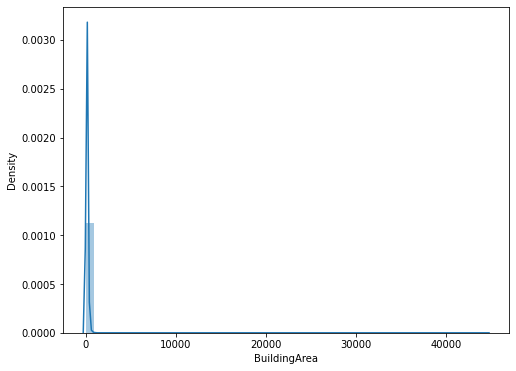

In [48]:
# BuildingArea memiliki distribusi data yang tidak normal dan cenderung skew ke kanan
# Kita akan coba untuk melihat distribusi data BuildingArea jika outlier dihilangkan
plt.figure(figsize=(8,6))
sns.distplot(df['BuildingArea'], kde=True)
plt.show()

Kita akan melihat apakah outlier yang menyebabkan ketidaknormalan distribusi pada BuildingArea berada pada batas 1000ft2. Kita lihat bagaimana keadaan data diatas dan dibawah 1000ft2

In [49]:
df[df['BuildingArea']<=1000]

Suburb          Address  Rooms Type      Price Method  \
1        Abbotsford  25 Bloomburg St    2.0    h  1035000.0      S   
2        Abbotsford     5 Charles St    3.0    h  1465000.0     SP   
4        Abbotsford      55a Park St    4.0    h  1600000.0     VB   
6        Abbotsford     124 Yarra St    3.0    h  1876000.0      S   
7        Abbotsford    98 Charles St    2.0    h  1636000.0      S   
...             ...              ...    ...  ...        ...    ...   
13458      Watsonia    76 Kenmare St    2.0    h   650000.0     PI   
13459      Werribee      5 Nuragi Ct    4.0    h   635000.0      S   
13462  Williamstown    77 Merrett Dr    3.0    h  1031000.0     SP   
13464  Williamstown     96 Verdon St    4.0    h  2500000.0     PI   
13465    Yarraville       6 Agnes St    4.0    h  1285000.0     SP   

             SellerG       Date  Distance Postcode  Bathroom  Car  Landsize  \
1             Biggin 2016-04-02       2.5   3067.0       1.0  0.0     156.0   
2             Biggin 2017-04-03       2.5   3067.0       2.0  0.0     134.0   
4             Nelson 2016-04-06       2.5   3067.0       1.0  2.0     120.0   
6             Nelson 2016-07-05       2.5   3067.0       2.0  0.0     245.0   
7             Nelson 2016-08-10       2.5   3067.0       1.0  2.0     256.0   
...              ...        ...       ...      ...       ...  ...       ...   
13458       Morrison 2017-08-26      14.5   3087.0       1.0  1.0     210.0   
13459  hockingstuart 2017-08-26      14.7   3030.0       2.0  1.0     662.0   
13462       Williams 2017-08-26       6.8   3016.0       2.0  2.0     333.0   
13464        Sweeney 2017-08-26       6.8   3016.0       1.0  5.0     866.0   
13465        Village 2017-08-26       6.3   3013.0       1.0  1.0     362.0   

       BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
1              79.0     1900.0       Yarra  -37.80790   144.99340   
2             150.0     1900.0       Yarra  -37.80930   144.99440   
4             142.0     2014.0       Yarra  -37.80720   144.99410   
6             210.0     1910.0       Yarra  -37.80240   144.99930   
7             107.0     1890.0       Yarra  -37.80600   144.99540   
...             ...        ...         ...        ...         ...   
13458          79.0     2006.0         NaN  -37.70657   145.07878   
13459         172.0     1980.0         NaN  -37.89327   144.64789   
13462         133.0     1995.0         NaN  -37.85927   144.87904   
13464         157.0     1920.0         NaN  -37.85908   144.89299   
13465         112.0     1920.0         NaN  -37.81188   144.88449   

                  Regionname  Propertycount SimplifiedMethod  \
1      Northern Metropolitan         4019.0             Sold   
2      Northern Metropolitan         4019.0        Available   
4      Northern Metropolitan         4019.0        Available   
6      Northern Metropolitan         4019.0             Sold   
7      Northern Metropolitan         4019.0             Sold   
...                      ...            ...              ...   
13458  Northern Metropolitan         2329.0        Available   
13459   Western Metropolitan        16166.0             Sold   
13462   Western Metropolitan         6380.0        Available   
13464   Western Metropolitan         6380.0        Available   
13465   Western Metropolitan         6543.0        Available   

      PropertySalesMonth PropertySalesYear  
1                      4              2016  
2                      4              2017  
4                      4              2016  
6                      7              2016  
7                      8              2016  
...                  ...               ...  
13458                  8              2017  
13459                  8              2017  
13462                  8              2017  
13464                  8              2017  
13465                  8              2017  

[7050 rows x 23 columns]

In [50]:
df[df['BuildingArea']>1000]

Suburb             Address  Rooms Type      Price Method  \
1359       Brunswick         7 Garnet St    3.0    h  1053000.0      S   
1475         Bulleen     19 Warringal St    4.0    h  1280000.0      S   
1578      Camberwell     46 Athelstan Rd    5.0    h  2608000.0      S   
2223     Elsternwick  5/16 St Georges Rd    2.0    u   741000.0      S   
2548   Fitzroy North      186 Queens Pde    5.0    t   930000.0      S   
2814       Glen Iris     1/58 Edgar St N    2.0    t   600000.0     VB   
3621             Kew   24 Fitzwilliam St    5.0    h  1975000.0      S   
13138   New Gisborne      71 Hamilton Rd    5.0    h  1355000.0      S   

        SellerG       Date  Distance Postcode  Bathroom  Car  Landsize  \
1359        Ray 2016-06-27       5.2   3056.0       1.0  1.0     343.0   
1475      Barry 2017-11-03      11.8   3105.0       1.0  2.0     732.0   
1578   Marshall 2016-10-15       7.8   3124.0       2.0  4.0     730.0   
2223     Biggin 2016-04-16       8.5   3185.0       1.0  1.0       0.0   
2548     Nelson 2016-03-09       3.5   3068.0       3.0  0.0    2778.0   
2814       Gary 2016-08-22       9.2   3146.0       1.0  1.0       0.0   
3621        Kay 2016-06-18       5.6   3101.0       2.0  1.0     531.0   
13138     Raine 2017-09-23      48.1   3438.0       3.0  5.0   44500.0   

       BuildingArea  YearBuilt  CouncilArea  Lattitude  Longtitude  \
1359         1041.0     1925.0     Moreland  -37.75890   144.95290   
1475         6791.0        NaN   Manningham  -37.76150   145.08970   
1578         3112.0     1920.0   Boroondara  -37.84240   145.06390   
2223         1561.0     1966.0    Glen Eira  -37.88290   145.00330   
2548         3558.0        NaN        Yarra  -37.79030   144.98590   
2814         1143.0        NaN  Stonnington  -37.85060   145.04650   
3621         1022.0     1890.0   Boroondara  -37.81300   145.04110   
13138       44515.0        NaN          NaN  -37.45392   144.58864   

                  Regionname  Propertycount SimplifiedMethod  \
1359   Northern Metropolitan        11918.0             Sold   
1475    Eastern Metropolitan         4480.0             Sold   
1578   Southern Metropolitan         8920.0             Sold   
2223   Southern Metropolitan         4898.0             Sold   
2548   Northern Metropolitan         6244.0             Sold   
2814   Southern Metropolitan        10412.0        Available   
3621   Southern Metropolitan        10331.0             Sold   
13138      Northern Victoria          849.0             Sold   

      PropertySalesMonth PropertySalesYear  
1359                   6              2016  
1475                  11              2017  
1578                  10              2016  
2223                   4              2016  
2548                   3              2016  
2814                   8              2016  
3621                   6              2016  
13138                  9              2017

Terdapat 7050 data dengan nilai BuildingArea dibawah 1000ft2 dan hanya 8 data dengan nilai BuildingArea diatas 1000ft2, sehingga kita akan menghapus 8 data outlier tersebut.

In [51]:
index_area=df[df['BuildingArea']>1000].index

In [52]:
df.drop(index=index_area, axis=0, inplace=True)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


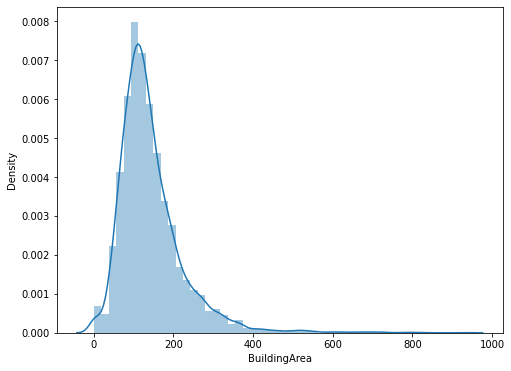

In [53]:
# Dapat dilihat setelah penghapusan outlier, distribusi data jadi lebih terlihat
plt.figure(figsize=(8,6))
sns.distplot(df['BuildingArea'], kde=True)
plt.show()

In [54]:
df.groupby(['Type','Rooms']).median()[['Landsize','BuildingArea']]

Landsize  BuildingArea
Type Rooms                        
h    2.0       250.0        94.000
     3.0       543.0       129.000
     4.0       612.0       187.000
     5.0       679.5       253.000
     6.0       571.0       207.000
     7.0       611.0       316.000
     8.0       665.5       293.000
     9.0       655.5       352.000
     10.0      679.5       410.000
     11.0      819.5       340.000
     12.0     1254.0       322.500
     16.0      650.0           NaN
t    2.0       121.0        96.000
     3.0       217.0       135.000
     4.0       228.0       151.500
     5.0       227.0       159.000
     6.0       252.0       166.000
     8.0       370.0       265.000
u    1.0       438.0           NaN
     2.0         0.0        68.055
     3.0       209.0       113.500
     4.0         0.0        90.000
     5.0       245.0           NaN
     6.0       195.5       145.000
     7.0         0.0       230.000
     8.0       983.0           NaN

Dapat dilihat dari dataframe diatas, bahwa nilai median dari Landsize dan BuildingArea berdasarkan Type dan Rooms menunjukan nilai yang relatif membesar seiring dengan pertambahan Rooms. Berdasarkan histogram dari BuildingArea menunjukan bahwa data tidak terdistribusi secara normal, sehingga pengisian NaN value akan menggunakan Median berdasarkan Type dan Rooms.

In [55]:
#Pengisian Missing Value dengan nilai Median BuildingArea berdasarkan Type dan Rooms
df['BuildingArea']=df.groupby(['Type','Rooms'])['BuildingArea'].apply(lambda x: x.fillna(x.median()))

In [56]:
#Masih terdapat 6 missing value di BuildingArea, sehingga kita akan megisinya dengan nilai Median BuildingArea berdasarkan Type
df['BuildingArea'].isna().sum()

6

In [57]:
#Pengisian Missing Value dengan nilai Median BuildingArea berdasarkan Type
df['BuildingArea']=df.groupby('Type')['BuildingArea'].apply(lambda x: x.fillna(x.median()))

In [58]:
#Sudah tidak ada NaN Value
df['BuildingArea'].isna().sum()

0

In [59]:
df.reset_index(drop=True, inplace=True)

### Landsize

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


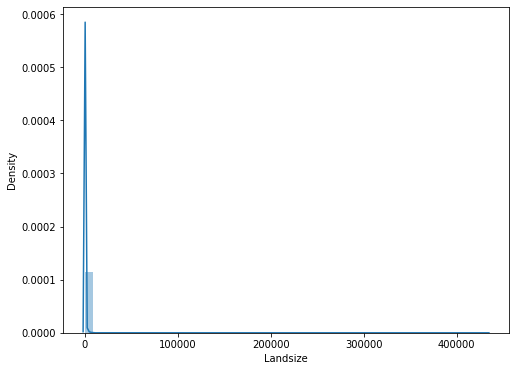

In [60]:
# Landsize memiliki distribusi data yang tidak normal dan cenderung skew ke kanan
# Kita akan coba untuk melihat distribusi data Landsize jika outlier dihilangkan
plt.figure(figsize=(8,6))
sns.distplot(df['Landsize'], kde=True)
plt.show()

Kita akan melihat apakah outlier yang menyebabkan ketidaknormalan distribusi pada BuildingArea berada pada batas 1000ft2. Kita lihat bagaimana keadaan data diatas dan dibawah 10000ft2

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


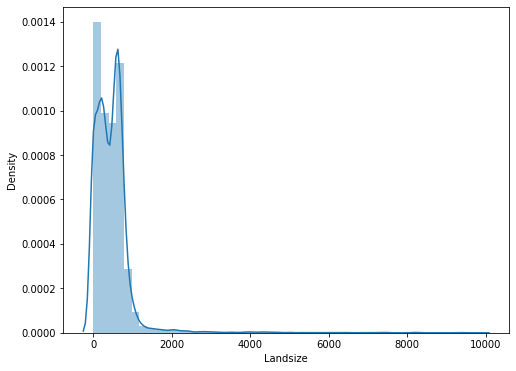

In [61]:
# Dapat dilihat bahwa distribusi data Landsize dibawah 10000 masih tidak terlihat normal, sehingga kita akan melihat
# bagaimana distribusi data dengan Landsize dibawah 1000
plt.figure(figsize=(8,6))
sns.distplot(df[df['Landsize']<10000]['Landsize'], kde=True)
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


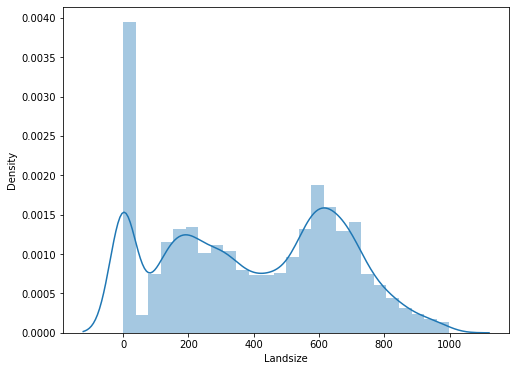

In [62]:
plt.figure(figsize=(8,6))
sns.distplot(df[df['Landsize']<1000]['Landsize'], kde=True)
plt.show()

Dapat dilihat diatas, ternyata distribusi data Landsize dibawah 1000ft2 memiliki dua puncak (bimodal) dan sepertinya terdapat banyak nilai 0 di kolom ini. Kita akan melihat bagaimana karakteristik dari data Landsize bernilai 0 ini.

In [63]:
df[df['Landsize']==0]

Suburb              Address  Rooms Type      Price Method  \
8        Abbotsford   6/241 Nicholson St    2.0    u   300000.0      S   
10       Abbotsford   411/8 Grosvenor St    4.0    u   700000.0     VB   
12       Abbotsford  123/56 Nicholson St    4.0    u   750000.0      S   
14       Abbotsford   7/20 Abbotsford St    2.0    u   441000.0     SP   
21       Abbotsford   13/11 Nicholson St    3.0    t   900000.0      S   
...             ...                  ...    ...  ...        ...    ...   
12060      St Kilda    45/151 Fitzroy St    2.0    u   600000.0     VB   
12068  Surrey Hills     6/91 Warrigal Rd    3.0    u  1050000.0     PI   
12080   Tullamarine     9/200 Melrose Dr    2.0    u   300000.0     SP   
12099  Williamstown        2/29 Dover Rd    2.0    u   385000.0     SP   
12101       Windsor      201/152 Peel St    2.0    u   560000.0     PI   

             SellerG       Date  Distance Postcode  Bathroom  Car  Landsize  \
8             Biggin 2016-08-10       2.5   3067.0       1.0  1.0       0.0   
10            Jellis 2016-12-11       2.5   3067.0       2.0  1.0       0.0   
12            Biggin 2016-12-11       2.5   3067.0       2.0  1.0       0.0   
14              Greg 2016-05-14       2.5   3067.0       1.0  1.0       0.0   
21            Beller 2017-03-18       2.5   3067.0       2.0  2.0       0.0   
...              ...        ...       ...      ...       ...  ...       ...   
12060  hockingstuart 2017-07-29       5.0   3182.0       1.0  1.0       0.0   
12068  hockingstuart 2017-07-29      10.2   3127.0       2.0  2.0       0.0   
12080          Jason 2017-07-29      12.9   3043.0       1.0  1.0       0.0   
12099       Williams 2017-07-29       6.8   3016.0       1.0  1.0       0.0   
12101  hockingstuart 2017-07-29       4.6   3181.0       1.0  1.0       0.0   

       BuildingArea  YearBuilt   CouncilArea  Lattitude  Longtitude  \
8            68.055        NaN         Yarra  -37.80080   144.99730   
10           90.000        NaN         Yarra  -37.81100   145.00670   
12           94.000     2009.0         Yarra  -37.80780   144.99650   
14           68.055        NaN         Yarra  -37.80160   144.99880   
21          135.000     2010.0         Yarra  -37.80930   144.99590   
...             ...        ...           ...        ...         ...   
12060        82.000     1930.0  Port Phillip  -37.85911   144.97900   
12068       113.500        NaN    Whitehorse  -37.83358   145.09884   
12080        66.320     1980.0          Hume  -37.69815   144.88019   
12099        35.640     1967.0   Hobsons Bay  -37.85588   144.89936   
12101        61.600     2012.0   Stonnington  -37.85581   144.99025   

                  Regionname  Propertycount SimplifiedMethod  \
8      Northern Metropolitan         4019.0             Sold   
10     Northern Metropolitan         4019.0        Available   
12     Northern Metropolitan         4019.0             Sold   
14     Northern Metropolitan         4019.0        Available   
21     Northern Metropolitan         4019.0             Sold   
...                      ...            ...              ...   
12060  Southern Metropolitan        13240.0        Available   
12068  Southern Metropolitan         5457.0        Available   
12080   Western Metropolitan         3296.0        Available   
12099   Western Metropolitan         6380.0        Available   
12101  Southern Metropolitan         4380.0        Available   

      PropertySalesMonth PropertySalesYear  
8                      8              2016  
10                    12              2016  
12                    12              2016  
14                     5              2016  
21                     3              2017  
...                  ...               ...  
12060                  7              2017  
12068                  7              2017  
12080                  7              2017  
12099                  7              2017  
12101                  7              2017  

[1918 rows x

Dataframe dengan nilai nilai Landsize 0 banyak dimiliki oleh property dengan **Type u**, hal ini sangat masuk akal karena Type u merupakan property apartment/duplex unit yang memang hanya memiliki BuildingArea dan tidak mempunyai tanah. Namun terdapat property Type h dan t yang merupakan tipe rumah dan cottage yang pada umumnya memiliki Landsize tetapi bernilai 0. Pada bagian selanjutnya proses pengolahan data pada Landsize akan dilakukan.

### YearBuilt

In [64]:
df['YearBuilt'].isna().sum()

5335

Terlalu banyak nilai NaN pada YearBuilt dan kita tidak bisa mengestimasi NaN value tersebut berdasarkan informasi dari kolom lainnya, sehingga kita tidak akan memasukan kolom ini kedalam pemodelan, akan tetapi informasi yang terkandung dalam YearBuilt akan dipakai pada analisis data.

## Other Data

In [65]:
df[['CouncilArea','SellerG','Propertycount']]

CouncilArea   SellerG  Propertycount
0           Yarra    Biggin         4019.0
1           Yarra    Biggin         4019.0
2           Yarra    Biggin         4019.0
3           Yarra    Biggin         4019.0
4           Yarra    Nelson         4019.0
...           ...       ...            ...
13453         NaN     Barry         7392.0
13454         NaN  Williams         6380.0
13455         NaN     Raine         6380.0
13456         NaN   Sweeney         6380.0
13457         NaN   Village         6543.0

[13458 rows x 3 columns]

In [66]:
df_describe4 =[]

for i in df[['CouncilArea','SellerG','Propertycount']].columns:
    df_describe4.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])

In [67]:
desc4=pd.DataFrame(df_describe4, columns=['column','type','nan','nan%','nunique','unique'])
desc4

column     type   nan   nan%  nunique  \
0    CouncilArea   object  1355  10.07       33   
1        SellerG   object     0   0.00      267   
2  Propertycount  float64     0   0.00      310   

                                              unique  
0  [Yarra, Moonee Valley, Port Phillip, Darebin, ...  
1  [Biggin, Nelson, Jellis, Greg, LITTLE, Collins...  
2  [4019.0, 3464.0, 3280.0, 2211.0, 5301.0, 5132....

Pada kelompok ini terdapat NaN value pada CouncilArea, tetapi saya rasa CouncilArea tidak terlalu berpengaruh terhadap pengelompokan cluster dari property sehingga tidak apa apa jika tidak diisi NaN valuenya. Tetapi kolom ini tidak akan di drop karena mungkin akan berguna dalam proses analisis data.

## Kesimpulan Kondisi Pasar Property dan Analisis Bisnis Proses

Secara umum bisnis proses pada pasar property adalah:
1. Perusahaan agen property menerima penawaran dari penduduk setempat yang ingin menjual propertynya dengan cepat, karena Perusahaan agen property dapat memasarkan property ke masyarakat luas maupun ke suatu instansi.
2. Perusahaan property lalu mendapatkan semua data property yang dijual menggunakan jasanya.
3. Perusahaan property lalu memasarkan property yang dijual tersebut dan terjadilah kontak dengan para calon pembeli.
4. Perusahaan property berusaha agar harga property yang dijual cukup kompetitif tetapi mereka juga harus mendapatkan profit maksimal.
5. Penjualan property di Kota Melbourne dapat melalui iklan langsung, melalui agen property, atau melalui proses pelelangan (auction).

Berdasarkan penjelasan bisnis proses diatas, kita bisa menyimpulkan bahwa perusahaan agen property hanya tertarik terhadap property yang masih bisa dibeli atau `Available` dan tidak mungkin tertarik kepada property yang sudah terjual `Sold`, sehingga **dalam proses analisis dan pengelompokan kluster, saya hanya akan menggunakan data property yang `Available`.**

In [68]:
df=df[df['SimplifiedMethod']=='Available'].reset_index(drop=True)

# Exploratory Data Analysis

In [69]:
df

Suburb             Address  Rooms Type      Price Method  \
0       Abbotsford        5 Charles St    3.0    h  1465000.0     SP   
1       Abbotsford    40 Federation La    3.0    h   850000.0     PI   
2       Abbotsford         55a Park St    4.0    h  1600000.0     VB   
3       Abbotsford  411/8 Grosvenor St    4.0    u   700000.0     VB   
4       Abbotsford     40 Nicholson St    3.0    h  1350000.0     VB   
...            ...                 ...    ...  ...        ...    ...   
4476      Viewbank       149 Graham Rd    5.0    h  1316000.0     SP   
4477      Watsonia       76 Kenmare St    2.0    h   650000.0     PI   
4478  Williamstown       77 Merrett Dr    3.0    h  1031000.0     SP   
4479  Williamstown        96 Verdon St    4.0    h  2500000.0     PI   
4480    Yarraville          6 Agnes St    4.0    h  1285000.0     SP   

       SellerG       Date  Distance Postcode  Bathroom  Car  Landsize  \
0       Biggin 2017-04-03       2.5   3067.0       2.0  0.0     134.0   
1       Biggin 2017-04-03       2.5   3067.0       2.0  1.0      94.0   
2       Nelson 2016-04-06       2.5   3067.0       1.0  2.0     120.0   
3       Jellis 2016-12-11       2.5   3067.0       2.0  1.0       0.0   
4       Nelson 2016-12-11       2.5   3067.0       2.0  2.0     214.0   
...        ...        ...       ...      ...       ...  ...       ...   
4476    Nelson 2017-08-26       8.9   3084.0       3.0  3.0     696.0   
4477  Morrison 2017-08-26      14.5   3087.0       1.0  1.0     210.0   
4478  Williams 2017-08-26       6.8   3016.0       2.0  2.0     333.0   
4479   Sweeney 2017-08-26       6.8   3016.0       1.0  5.0     866.0   
4480   Village 2017-08-26       6.3   3013.0       1.0  1.0     362.0   

      BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0            150.0     1900.0       Yarra  -37.80930   144.99440   
1            129.0        NaN       Yarra  -37.79690   144.99690   
2            142.0     2014.0       Yarra  -37.80720   144.99410   
3             90.0        NaN       Yarra  -37.81100   145.00670   
4            190.0     2005.0       Yarra  -37.80850   144.99640   
...            ...        ...         ...        ...         ...   
4476         253.0        NaN         NaN  -37.73501   145.08341   
4477          79.0     2006.0         NaN  -37.70657   145.07878   
4478         133.0     1995.0         NaN  -37.85927   144.87904   
4479         157.0     1920.0         NaN  -37.85908   144.89299   
4480         112.0     1920.0         NaN  -37.81188   144.88449   

                 Regionname  Propertycount SimplifiedMethod  \
0     Northern Metropolitan         4019.0        Available   
1     Northern Metropolitan         4019.0        Available   
2     Northern Metropolitan         4019.0        Available   
3     Northern Metropolitan         4019.0        Available   
4     Northern Metropolitan         4019.0        Available   
...                     ...            ...              ...   
4476   Eastern Metropolitan         2698.0        Available   
4477  Northern Metropolitan         2329.0        Available   
4478   Western Metropolitan         6380.0        Available   
4479   Western Metropolitan         6380.0        Available   
4480   Western Metropolitan         6543.0        Available   

     PropertySalesMonth PropertySalesYear  
0                     4              2017  
1                     4              2017  
2                     4              2016  
3                    12              2016  
4                    12              2016  
...                 ...               ...  
4476                  8              2017  
4477                  8              2017  
4478                  8              2017  
4479                  8              2017  
4480                  8              2017  

[4481 rows x 23 columns]

## Numerical Feature

In [70]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_feature.remove('Date')
numerical_feature.remove('YearBuilt')
print ('Number of numerical feature:' , len(numerical_feature))

df[numerical_feature].head()

Number of numerical feature: 10


Rooms      Price  Distance  Bathroom  Car  Landsize  BuildingArea  \
0    3.0  1465000.0       2.5       2.0  0.0     134.0         150.0   
1    3.0   850000.0       2.5       2.0  1.0      94.0         129.0   
2    4.0  1600000.0       2.5       1.0  2.0     120.0         142.0   
3    4.0   700000.0       2.5       2.0  1.0       0.0          90.0   
4    3.0  1350000.0       2.5       2.0  2.0     214.0         190.0   

   Lattitude  Longtitude  Propertycount  
0   -37.8093    144.9944         4019.0  
1   -37.7969    144.9969         4019.0  
2   -37.8072    144.9941         4019.0  
3   -37.8110    145.0067         4019.0  
4   -37.8085    144.9964         4019.0

### Distribusi Data

In [71]:
# Check distribusi data dari fitur numerik
a=[]
b=[]
c=[]
for feature in ['Rooms','Price','Distance','Bathroom','Car','Landsize','BuildingArea','Lattitude',
                'Longtitude']:
    t,pval=normaltest(df[feature])
    a.append(feature)
    b.append(t)
    c.append(pval)
pd.DataFrame({'feature':a,'statistics':b, 'p-value':c})

feature    statistics        p-value
0         Rooms   2130.658096   0.000000e+00
1         Price   2391.888449   0.000000e+00
2      Distance   1804.607426   0.000000e+00
3      Bathroom   1332.265193  5.038358e-290
4           Car   1581.069693   0.000000e+00
5      Landsize  15364.790659   0.000000e+00
6  BuildingArea   2189.312250   0.000000e+00
7     Lattitude    321.783773   1.335185e-70
8    Longtitude    181.984947   3.037182e-40

Dapat dilihat berdasarkan hasil dari normaltest semua data numerik tidak terdistribusi secara normal. Sehingga akan dilakukan korelasi spearman.

In [72]:
corr=df[numerical_feature].corr(method='spearman')

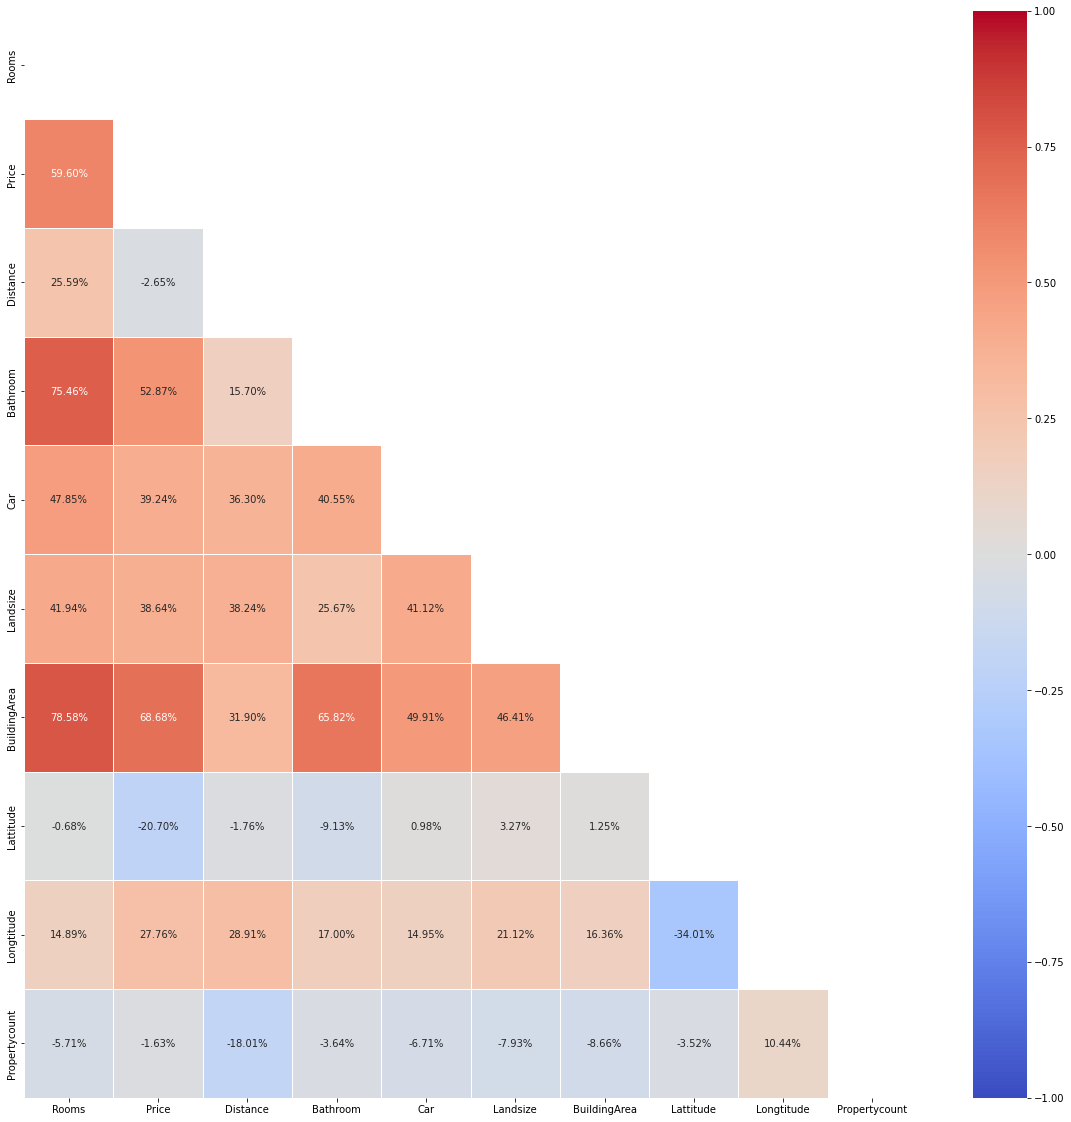

In [73]:
# Heatmap dari korelasi antar fitur numerik
plt.figure(figsize=(20,20))
mask=np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt='.2%', linewidth=1, mask=mask)
plt.show()

Kesimpulan berdasaran Heatmap Spearman Correlation:
1. `Rooms` memiliki **korelasi yang kuat berbanding lurus dengan BuildingArea dan Bathroom** (Hal ini wajar karena kolom-kolom ini saling mengisi nilai satu dengan lainnya pada proses data cleansing), **korelasi sedang berbanding lurus dengan Price, Car, dan Landsize.**
2. `Price` memiliki **korelasi sedang dan berbanding lurus dengan Bathrooms dan Rooms**, serta **korelasi yang kuat berbanding lurus dengan BuildingArea**.
3. `Distance` memiliki **korelasi sedang berbanding lurus dengan Landsize**.
4. `Bathroom` memiliki **korelasi kuat dan berbanding lurus dengan BuildingArea dan Rooms**.
5. `Landsize` memiliki **korelasi sedang dan berbanding lurus dengan BuildingArea, Rooms, Distance, dan Car**.
6. `BuildingArea` memiliki **korelasi kuat dan berbanding lurus dengan Rooms dan Bathroom**, serta memiliki **korelasi sedang dan berbanding lurus dengan Price, Car, dan Landsize**.

### Analisa Outlier

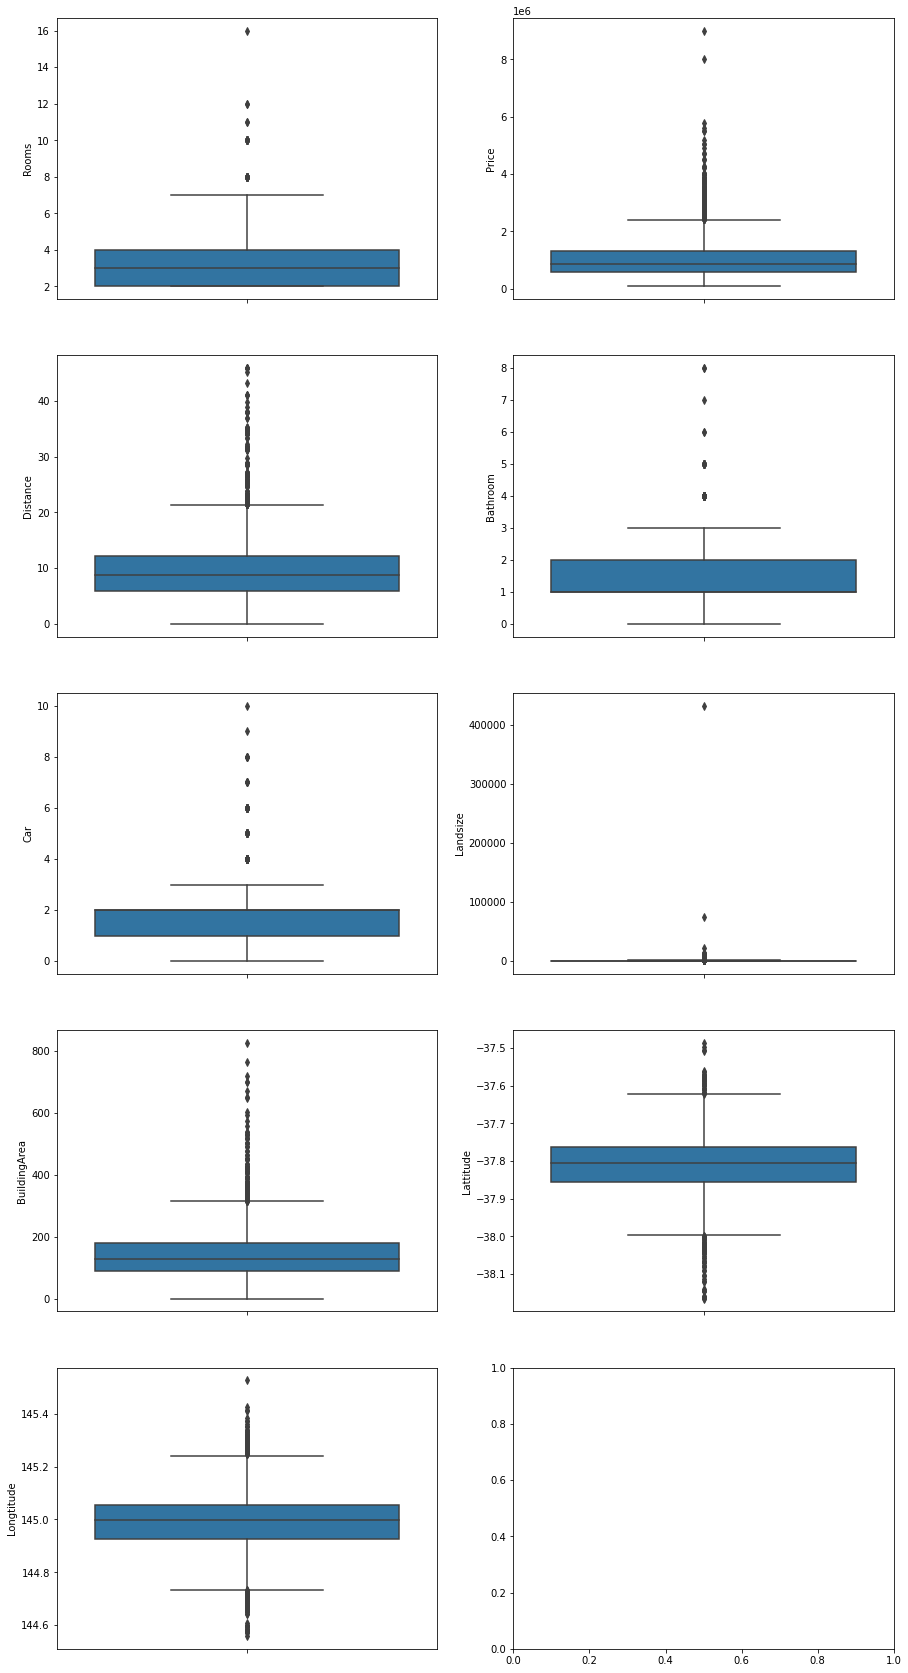

In [74]:
fig, ax = plt.subplots(5,2, figsize=(15,30))
for variable, subplot in zip(['Rooms','Price','Distance','Bathroom','Car','Landsize','BuildingArea','Lattitude',
                'Longtitude'], ax.flatten()):
    sns.boxplot(data=df, y=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

In [75]:
# Fungsi untuk menghitung outlier
def outliers(data):
    q1=data.quantile(.25)
    q3=data.quantile(.75)
    iqr=q3-q1
    batas_bawah = q1-(1.5*iqr)
    batas_atas = q3+(1.5*iqr)
    A=[]
    for i in range(len(data)):
        if (data.loc[i] < batas_bawah) | (data.loc[i] > batas_atas):
            A.append(data.loc[i])
        else:
            continue
    return(batas_atas,batas_bawah,len(A),round((len(A)/len(data))*100,2))

In [76]:
# Fungsi untuk menghitung extreme outlier
def ex_outliers(data):
    q1=data.quantile(.25)
    q3=data.quantile(.75)
    iqr=q3-q1
    batas_bawah = q1-(3*iqr)
    batas_atas = q3+(3*iqr)
    A=[]
    for i in range(len(data)):
        if (data.loc[i] < batas_bawah) | (data.loc[i] > batas_atas):
            A.append(data.loc[i])
        else:
            continue
    print('Nilai batas atas: ',batas_atas)
    print('Nilai batas bawah: ',batas_bawah)
    print('Jumlah extreme outlier: ',len(A))
    print('Persentase Jumlah extreme outlier: ',round((len(A)/len(data))*100,2))

In [77]:
#Masukan hasil dari fungsi outlier kedalam list
batas_atas=[]
batas_bawah=[]
outlier=[]
persentase=[]
for i in numerical_feature:
    for j in range(4):
        if j==0:
            batas_atas.append(outliers(df[i])[0])
        elif j==1:
            batas_bawah.append(outliers(df[i])[1])
        elif j==2:
            outlier.append(outliers(df[i])[2])
        else:
            persentase.append(outliers(df[i])[3])

In [78]:
#Hasil analisa outlier dikeluarkan sebagai dataframe
pd.DataFrame({'Nilai Batas Atas':batas_atas, 'Nilai Batas Bawah':batas_bawah, 'Jumlah Outlier':outlier, 
             'Persentase Outlier':persentase}, index=numerical_feature)

Nilai Batas Atas  Nilai Batas Bawah  Jumlah Outlier  \
Rooms              7.000000e+00          -1.000000              43   
Price              2.415000e+06     -505000.000000             210   
Distance           2.140000e+01          -3.400000             175   
Bathroom           3.500000e+00          -0.500000              74   
Car                3.500000e+00          -0.500000             232   
Landsize           1.426000e+03        -630.000000             163   
BuildingArea       3.150000e+02         -45.000000             133   
Lattitude         -3.762138e+01         -37.996625              90   
Longtitude         1.452454e+02         144.733650             124   
Propertycount      1.759700e+04       -3451.000000              96   

               Persentase Outlier  
Rooms                        0.96  
Price                        4.69  
Distance                     3.91  
Bathroom                     1.65  
Car                          5.18  
Landsize                     3.64  
BuildingArea                 2.97  
Lattitude                    2.01  
Longtitude                   2.77  
Propertycount                2.14

Berdasarkan hasil boxplot dan juga analisa outlier, terdapat beberapa kolom yang akan dianalisa lebih lanjut, yakni:
1. Price
2. Distance
3. Rooms
4. Bathroom
5. Car
6. Landsize
7. BuildingArea

#### Price
Berdasarkan boxplot dan hasil analisa outlier, sepertinya kolom Price memiliki distribusi data yang tidak normal dan cenderung skew ke kanan (positive skew) dengan batas atas 2.415.000. Kita akan analisa data lebih mendalam dengan melihat bagaimana extreme outlier yang ada.

In [79]:
ex_outliers(df['Price'])

Nilai batas atas:  3510000.0
Nilai batas bawah:  -1600000.0
Jumlah extreme outlier:  42
Persentase Jumlah extreme outlier:  0.94


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


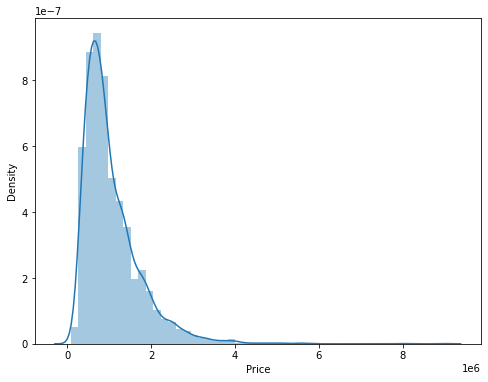

In [80]:
plt.figure(figsize=(8,6))
sns.distplot(df['Price'], kde=True)
plt.show()

Berdasarkan hasil analisa extreme outliers dan juga plot histogram, maka pada kolom Price hanya terdapat batas atas dari extreme outliers dan batas bawah tidak mempunyai extreme outliers, sehingga kita akan drop data dengan nilai diatas extreme outliers tersebut.

In [81]:
df[df['Price']>3510000]

Suburb            Address  Rooms Type      Price Method  \
90         Armadale      44 Hampden Rd    4.0    h  4200000.0     VB   
166          Balwyn       349 Union Rd    6.0    h  4000000.0     VB   
177          Balwyn       18 Metung St    5.0    h  3600000.0     SP   
193          Balwyn        8 Raynes St    5.0    h  4000000.0     VB   
194          Balwyn    29 Sevenoaks St   12.0    h  3900000.0     PI   
234    Balwyn North      9 Stephens St   10.0    h  4000000.0     PI   
330        Box Hill     6 Archibald St    3.0    h  4000000.0     VB   
351        Brighton        9 Sussex St    5.0    h  4700000.0     VB   
357        Brighton          82 New St    5.0    h  3700000.0     VB   
535      Canterbury       29 Rubens Gr    4.0    h  3800000.0     PI   
538      Canterbury    77 Highfield Rd    5.0    h  3550000.0     VB   
891       Glen Iris       2 Vincent St    5.0    h  3730000.0     PI   
1026       Hawthorn      2 Fordholm Rd    5.0    h  4250000.0     PI   
1034       Hawthorn      50 Kinkora Rd    8.0    h  5050000.0     VB   
1041       Hawthorn         9 Power St    5.0    h  3750000.0     PI   
1154            Kew       94 Argyle Rd    4.0    h  3550000.0     VB   
1169            Kew   61 Molesworth St    3.0    h  3650000.0     VB   
1181            Kew     62 Campbell St    4.0    h  4005000.0     PI   
1230        Malvern          3 Mary St    8.0    h  4525000.0     PI   
1335    Mont Albert    72 Churchill St    4.0    h  3900000.0     PI   
1476      Northcote      167 Clarke St    5.0    h  4300000.0     SP   
1487      Northcote      215 Clarke St    8.0    h  3850000.0     PI   
1945       St Kilda      33 Marine Pde    4.0    h  4750000.0     PI   
2097         Toorak       10 Myoora Rd    4.0    h  5500000.0     VB   
2106         Toorak     5 Berenice Tce    4.0    h  4000000.0     VB   
2114         Toorak          1 Ross St    8.0    h  4000000.0     VB   
2116         Toorak     23 Canberra Rd    4.0    h  4500000.0     PI   
2360   Ivanhoe East  271 The Boulevard    5.0    h  3850000.0     SP   
2514       Brighton      161 Church St    5.0    h  5800000.0     PI   
2558     Canterbury     49 Mangarra Rd   10.0    h  8000000.0     VB   
2637  Hawthorn East     25 Myrniong Gr    5.0    h  3750000.0     VB   
2639  Hawthorn East        41 Leura Gr    4.0    h  3600000.0     VB   
2652            Kew      23 Uvadale Gr   10.0    h  3800000.0     VB   
2869         Toorak      680 Orrong Rd    4.0    h  3600000.0     PI   
2882       Armadale     52 Adelaide St    5.0    h  5200000.0     SP   
3049        Malvern       14 Irving St    7.0    h  4900000.0     VB   
3054    Middle Park        204 Page St    6.0    h  5600000.0     PI   
3436    Middle Park    89 Armstrong St    3.0    h  3750000.0     PI   
3602       Brighton      2A Collins St    8.0    h  4050000.0     PI   
3992       Mulgrave        35 Bevis St    3.0    h  9000000.0     PI   
4042       Brighton        139 Cole St   10.0    h  5500000.0     VB   
4212            Kew   130 Sackville St    5.0    h  5065000.0     PI   

           SellerG       Date  Distance Postcode  Bathroom  Car  Landsize  \
90             Kay 2016-11-27       6.3   3143.0       3.0  3.0     563.0   
166         Jellis 2016-03-12       9.7   3103.0       4.0  7.0    2051.0   
177       Marshall 2016-10-12       9.7   3103.0       3.0  2.0     678.0   
193             RT 2016-11-27       9.7   3103.0       4.0  3.0    1437.0   
194         Jellis 2016-08-28       9.7   3103.0       7.0  6.0       0.0   
234       Marshall 2016-06-18       9.2   3104.0       5.0  4.0    1364.0   
330      Lindellas 2016-06-18      13.1   3128.0       1.0  2.0     763.0   
351         Hodges 2016-12-11      11.2   3186.0       3.0  2.0    1073.0   
357            Kay 2016-06-18      11.2   3186.0       3.0  4.0    1572.0   
535       Marshall 2017-11-02       9.0   3126.0       1.0  1.0     858.0   
538             RT 2017-03-18       9.0   3126.0       4.0  4.0     6

In [82]:
index_out1=df[df['Price']>3510000].index

In [83]:
df.drop(index=index_out1, axis=0, inplace=True)

In [84]:
df.reset_index(drop=True, inplace=True)

#### Distance
Berdasarkan boxplot dan hasil analisa outlier, sepertinya kolom Distance memiliki distribusi data yang tidak normal dan cenderung skew ke kanan (positive skew) dengan batas atas 21,4. Kita akan analisa data lebih mendalam dengan melihat bagaimana extreme outlier yang ada.

In [85]:
ex_outliers(df['Distance'])

Nilai batas atas:  30.699999999999996
Nilai batas bawah:  -12.699999999999998
Jumlah extreme outlier:  61
Persentase Jumlah extreme outlier:  1.37


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


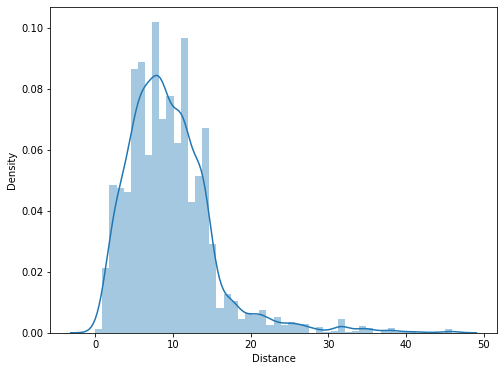

In [86]:
plt.figure(figsize=(8,6))
sns.distplot(df['Distance'], kde=True)
plt.show()

Berdasarkan hasil analisa extreme outliers dan juga plot histogram, maka pada kolom Distance hanya terdapat batas atas dari extreme outliers dan batas bawah tidak mempunyai extreme outliers, sehingga kita akan drop data dengan nilai diatas extreme outliers tersebut.

In [87]:
df[df['Distance']>30.7]

Suburb           Address  Rooms Type     Price Method  \
2855      Berwick     96 Avebury Dr    4.0    h  627500.0     SP   
2878     Gisborne       3 Sansom St    4.0    h  521000.0     SP   
2883  Healesville  15A Westmount Rd    3.0    h  650000.0     SP   
2898       Melton      38 Gretel Gr    4.0    h  320000.0     SP   
2899       Melton      21 Sandra St    3.0    h  480000.0     SP   
...           ...               ...    ...  ...       ...    ...   
4385    Frankston    4 Sassafras Dr    3.0    h  515000.0     SP   
4406   Langwarrin    83 Pindara Bvd    4.0    h  965000.0     PI   
4411       Melton     21D Yuille St    5.0    h  710000.0     PI   
4412      Monbulk       21 David St    4.0    h  720000.0     SP   
4429      Sunbury    7 Fullbrook Dr    3.0    h  480000.0     PI   

            SellerG       Date  Distance Postcode  Bathroom  Car  Landsize  \
2855            C21 2017-01-07      35.2   3806.0       2.0  2.0     687.0   
2878          Raine 2017-01-07      45.9   3437.0       2.0  2.0     978.0   
2883        McGrath 2017-01-07      45.2   3777.0       2.0  4.0     724.0   
2898          Raine 2017-01-07      31.7   3337.0       2.0  1.0     547.0   
2899  PRDNationwide 2017-01-07      31.7   3337.0       1.0  2.0     900.0   
...             ...        ...       ...      ...       ...  ...       ...   
4385        O'Brien 2017-08-26      38.0   3199.0       1.0  4.0     602.0   
4406        O'Brien 2017-08-26      41.0   3910.0       2.0  6.0     869.0   
4411          Ryder 2017-08-26      31.7   3337.0       2.0  2.0    1670.0   
4412      Fletchers 2017-08-26      34.1   3793.0       2.0  2.0    1611.0   
4429        Leeburn 2017-08-26      31.7   3429.0       2.0  2.0     646.0   

      BuildingArea  YearBuilt     CouncilArea  Lattitude  Longtitude  \
2855         187.0        NaN           Casey  -38.02434   145.33117   
2878         144.0     1980.0  Macedon Ranges  -37.49642   144.60119   
2883         156.6     2009.0    Yarra Ranges  -37.64685   145.52635   
2898         200.0     1986.0          Melton  -37.69026   144.57866   
2899         100.0     1980.0          Melton  -37.68738   144.57415   
...            ...        ...             ...        ...         ...   
4385         129.0        NaN             NaN  -38.14374   145.16976   
4406         264.0     2007.0             NaN  -38.14508   145.18787   
4411         280.0     2000.0             NaN  -37.67813   144.59292   
4412         187.0        NaN             NaN  -37.87931   145.41288   
4429         129.0        NaN             NaN  -37.56005   144.70892   

                      Regionname  Propertycount SimplifiedMethod  \
2855            Eastern Victoria        17093.0        Available   
2878           Northern Victoria         3376.0        Available   
2883           Northern Victoria         3307.0        Available   
2898            Western Victoria         3600.0        Available   
2899            Western Victoria         3600.0        Available   
...                          ...            ...              ...   
4385  South-Eastern Metropolitan        17055.0        Available   
4406            Eastern Victoria         8743.0        Available   
4411            Western Victoria         3600.0        Available   
4412            Eastern Victoria         1424.0        Available   
4429        Western Metropolitan        14092.0        Available   

     PropertySalesMonth PropertySalesYear  
2855                  1              2017  
2878                  1              2017  
2883                  1              2017  
2898                  1              2017  
2899                  1              2017  
...                 ...               ...  
4385                  8              2017  
4406                  8              2017  
4411                  8              2017  
4412                  8              2017  
4429                  8              2017  

[61 rows x 23 columns]

In [88]:
index_out2=df[df['Distance']>30.7].index

In [89]:
df.drop(index=index_out2, axis=0, inplace=True)

In [90]:
df.reset_index(drop=True, inplace=True)

#### Rooms
Berdasarkan boxplot dan hasil analisa outlier, sepertinya kolom Rooms memiliki distribusi data yang tidak normal dan cenderung skew ke kanan (positive skew) dengan batas atas 7. Kita akan analisa data lebih mendalam dengan melihat bagaimana extreme outlier yang ada.

In [91]:
ex_outliers(df['Rooms'])

Nilai batas atas:  10.0
Nilai batas bawah:  -4.0
Jumlah extreme outlier:  4
Persentase Jumlah extreme outlier:  0.09


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


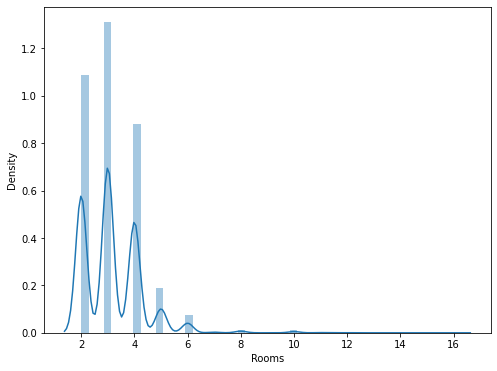

In [92]:
plt.figure(figsize=(8,6))
sns.distplot(df['Rooms'], kde=True)
plt.show()

Berdasarkan hasil analisa extreme outliers dan juga plot histogram, maka pada kolom Rooms hanya terdapat batas atas dari extreme outliers dan batas bawah tidak mempunyai extreme outliers, sehingga kita akan drop data dengan nilai diatas extreme outliers tersebut.

In [93]:
df[df['Rooms']>=10]

Suburb         Address  Rooms Type      Price Method  \
164             Balwyn      4 Melba Ct   10.0    h  3250000.0     PI   
182             Balwyn    2 Birtles Ct   10.0    h  3000000.0     VB   
183             Balwyn    49 Metung St   11.0    h  3400000.0     VB   
347           Brighton   31 Orchard St   10.0    h  2100000.0     PI   
521         Camberwell      9 Derby St   10.0    h  2250000.0     PI   
1162               Kew     69 Malin St   10.0    h  3280000.0     PI   
1591           Preston   672 Plenty Rd   10.0    h   630000.0     PI   
1621           Preston   421 Murray Rd   12.0    h   760000.0     PI   
2001      Surrey Hills    14 Verdun St   10.0    h  1650000.0     VB   
3209  Caroline Springs  9 Hounslow Grn   10.0    h  1150000.0     SP   
3441        Camberwell  1088 Toorak Rd   16.0    h  2200000.0     PI   
3454         Edithvale     96 Berry Av   11.0    h  1260000.0     SP   
3681          Bundoora       5 Ball Ct   10.0    h   900000.0     PI   
4020            Balwyn     7 Relowe Cr   10.0    h  2750000.0     VB   
4135    Mount Waverley    37 Illuka Cr   10.0    h  2420000.0     SP   
4224            Balwyn   12 Belmore Rd   10.0    h  2580000.0     PI   

            SellerG       Date  Distance Postcode  Bathroom  Car  Landsize  \
164   hockingstuart 2016-03-12       9.7   3103.0       5.0  2.0     651.0   
182          Jellis 2016-06-18       9.7   3103.0       5.0  2.0     671.0   
183          Jellis 2016-06-18       9.7   3103.0       6.0  4.0     739.0   
347          Hodges 2016-04-16      11.2   3186.0       5.0  2.0     552.0   
521        Marshall 2016-08-28       7.8   3124.0       5.0  1.0     639.0   
1162       Marshall 2016-11-27       5.6   3101.0       5.0  2.0     480.0   
1591  hockingstuart 2017-04-03       8.8   3072.0       5.0  3.0     199.0   
1621          Barry 2016-05-22       8.8   3072.0       8.0  7.0    1254.0   
2001  hockingstuart 2016-12-06      11.2   3127.0       5.0  2.0     693.0   
3209             RW 2017-06-24      14.8   3023.0       5.0  4.0     688.0   
3441           Ross 2017-08-07       7.7   3124.0       8.0  4.0     650.0   
3454        O'Brien 2017-08-07      27.0   3196.0       6.0  3.0     900.0   
3681            Ray 2017-07-15      12.1   3083.0       3.0  2.0     313.0   
4020  hockingstuart 2017-09-09       7.9   3103.0       5.0  2.0    1235.0   
4135            LLC 2017-09-16      14.2   3149.0       5.0  2.0     757.0   
4224       Marshall 2017-09-23       7.9   3103.0       5.0  2.0     621.0   

      BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
164          410.0        NaN  Boroondara  -37.80710   145.09080   
182          410.0        NaN  Boroondara  -37.80250   145.06650   
183          502.0        NaN  Boroondara  -37.80390   145.07140   
347          219.0     1920.0     Bayside  -37.90120   144.99700   
521          453.0     2010.0  Boroondara  -37.83030   145.06680   
1162         147.0     1979.0  Boroondara  -37.81170   145.04490   
1591           5.0        NaN     Darebin  -37.73090   145.01510   
1621         280.0     1928.0     Darebin  -37.73670   144.98950   
2001         410.0     1930.0  Boroondara  -37.83390   145.09370   
3209         490.0     2006.0      Melton  -37.74281   144.72513   
3441         129.0        NaN  Boroondara  -37.84812   145.07414   
3454         178.0     1960.0    Kingston  -38.04105   145.12160   
3681         410.0     2006.0     Darebin  -37.71098   145.05381   
4020         397.0     2016.0         NaN  -37.80563   145.10304   
4135         503.0     1975.0         NaN  -37.88750   145.14467   
4224         575.0     2009.0         NaN  -37.80199   145.06486   

                      Regionname  Propertycount SimplifiedMethod  \
164        Southern Metropolitan         5682.0        Available   
182        Southern Metropolitan         5682.0        Available   
183        Southern Metropolitan         5682.0        Available   
347        Southern Metropolitan   

In [94]:
index_out3=df[df['Rooms']>10].index

In [95]:
df.drop(index=index_out3, axis=0, inplace=True)

In [96]:
df.reset_index(drop=True, inplace=True)

#### Bathroom
Berdasarkan boxplot dan hasil analisa outlier, sepertinya kolom Bathroom memiliki distribusi data yang tidak normal dan cenderung skew ke kanan (positive skew) dengan batas atas 4. Kita akan analisa data lebih mendalam dengan melihat bagaimana extreme outlier yang ada.

In [97]:
ex_outliers(df['Bathroom'])

Nilai batas atas:  5.0
Nilai batas bawah:  -2.0
Jumlah extreme outlier:  0
Persentase Jumlah extreme outlier:  0.0


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


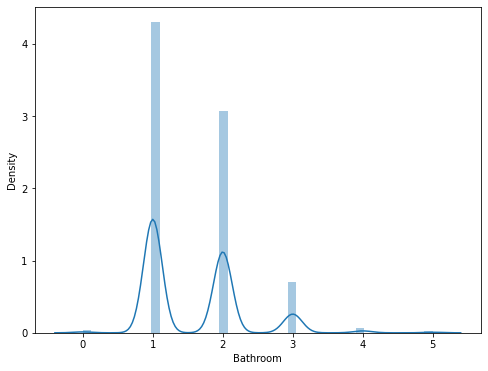

In [98]:
plt.figure(figsize=(8,6))
sns.distplot(df['Bathroom'], kde=True)
plt.show()

Berdasarkan hasil analisa extreme outliers dan juga plot histogram, maka pada kolom Rooms hanya terdapat batas atas dari extreme outliers dan batas bawah tidak mempunyai extreme outliers, sehingga kita akan drop data dengan nilai diatas extreme outliers tersebut.

In [99]:
df[df['Bathroom']>=5]

Suburb         Address  Rooms Type      Price Method  \
164             Balwyn      4 Melba Ct   10.0    h  3250000.0     PI   
182             Balwyn    2 Birtles Ct   10.0    h  3000000.0     VB   
346           Brighton   31 Orchard St   10.0    h  2100000.0     PI   
520         Camberwell      9 Derby St   10.0    h  2250000.0     PI   
1161               Kew     69 Malin St   10.0    h  3280000.0     PI   
1590           Preston   672 Plenty Rd   10.0    h   630000.0     PI   
1999      Surrey Hills    14 Verdun St   10.0    h  1650000.0     VB   
3207  Caroline Springs  9 Hounslow Grn   10.0    h  1150000.0     SP   
4016            Balwyn     7 Relowe Cr   10.0    h  2750000.0     VB   
4131    Mount Waverley    37 Illuka Cr   10.0    h  2420000.0     SP   
4220            Balwyn   12 Belmore Rd   10.0    h  2580000.0     PI   

            SellerG       Date  Distance Postcode  Bathroom  Car  Landsize  \
164   hockingstuart 2016-03-12       9.7   3103.0       5.0  2.0     651.0   
182          Jellis 2016-06-18       9.7   3103.0       5.0  2.0     671.0   
346          Hodges 2016-04-16      11.2   3186.0       5.0  2.0     552.0   
520        Marshall 2016-08-28       7.8   3124.0       5.0  1.0     639.0   
1161       Marshall 2016-11-27       5.6   3101.0       5.0  2.0     480.0   
1590  hockingstuart 2017-04-03       8.8   3072.0       5.0  3.0     199.0   
1999  hockingstuart 2016-12-06      11.2   3127.0       5.0  2.0     693.0   
3207             RW 2017-06-24      14.8   3023.0       5.0  4.0     688.0   
4016  hockingstuart 2017-09-09       7.9   3103.0       5.0  2.0    1235.0   
4131            LLC 2017-09-16      14.2   3149.0       5.0  2.0     757.0   
4220       Marshall 2017-09-23       7.9   3103.0       5.0  2.0     621.0   

      BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
164          410.0        NaN  Boroondara  -37.80710   145.09080   
182          410.0        NaN  Boroondara  -37.80250   145.06650   
346          219.0     1920.0     Bayside  -37.90120   144.99700   
520          453.0     2010.0  Boroondara  -37.83030   145.06680   
1161         147.0     1979.0  Boroondara  -37.81170   145.04490   
1590           5.0        NaN     Darebin  -37.73090   145.01510   
1999         410.0     1930.0  Boroondara  -37.83390   145.09370   
3207         490.0     2006.0      Melton  -37.74281   144.72513   
4016         397.0     2016.0         NaN  -37.80563   145.10304   
4131         503.0     1975.0         NaN  -37.88750   145.14467   
4220         575.0     2009.0         NaN  -37.80199   145.06486   

                 Regionname  Propertycount SimplifiedMethod  \
164   Southern Metropolitan         5682.0        Available   
182   Southern Metropolitan         5682.0        Available   
346   Southern Metropolitan        10579.0        Available   
520   Southern Metropolitan         8920.0        Available   
1161  Southern Metropolitan        10331.0        Available   
1590  Northern Metropolitan        14577.0        Available   
1999  Southern Metropolitan         5457.0        Available   
3207   Western Metropolitan         7719.0        Available   
4016  Southern Metropolitan         5682.0        Available   
4131   Eastern Metropolitan        13366.0        Available   
4220  Southern Metropolitan         5682.0        Available   

     PropertySalesMonth PropertySalesYear  
164                   3              2016  
182                   6              2016  
346                   4              2016  
520                   8              2016  
1161                 11              2016  
1590                  4              2017  
1999                 12              2016  
3207                  6              2017  
4016                  9              2017  
4131                  9              2017  
4220                  9              2017

Ternyata nilai Bathroom terbesar adalah 5 yang merupakan batas atas dari extreme outliers, sehingga kita tidak perli drop baris ini.

#### Car
Berdasarkan boxplot dan hasil analisa outlier, sepertinya kolom car memiliki distribusi data yang tidak normal dan cenderung skew ke kanan (positive skew) dengan batas atas 4. Kita akan analisa data lebih mendalam dengan melihat bagaimana extreme outlier yang ada.

In [100]:
ex_outliers(df['Car'])

Nilai batas atas:  5.0
Nilai batas bawah:  -2.0
Jumlah extreme outlier:  28
Persentase Jumlah extreme outlier:  0.64


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


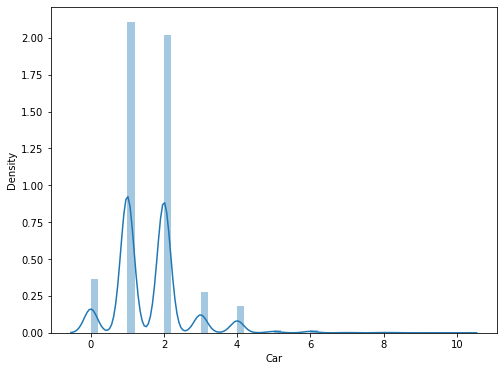

In [101]:
plt.figure(figsize=(8,6))
sns.distplot(df['Car'], kde=True)
plt.show()

Berdasarkan hasil analisa extreme outliers dan juga plot histogram, maka pada kolom Car hanya terdapat batas atas dari extreme outliers dan batas bawah tidak mempunyai extreme outliers, sehingga kita akan drop data dengan nilai diatas extreme outliers tersebut.

In [102]:
df[df['Car']>5]

Suburb             Address  Rooms Type      Price Method  \
15        Airport West         3 Deidre Ct    3.0    h   895000.0     PI   
42              Altona          29 Rose St    4.0    h  1780000.0     SP   
149   Avondale Heights        11 South Tce    3.0    h   850000.0     SP   
230       Balwyn North         1 Morris St    6.0    h  1900000.0     VB   
749           Essendon    59 Hedderwick St    5.0    h  2800000.0     PI   
948            Glenroy      107 Glenroy Rd    4.0    h  1000000.0     PI   
1268       Maribyrnong      12 Newstead St    4.0    h  1900000.0     VB   
1466         Northcote    118 Westgarth St    3.0    h  1500000.0     PI   
1678         Reservoir     192 Edwardes St    2.0    h  1700000.0     PI   
2384    West Footscray       742 Barkly St    3.0    h  1415000.0     PI   
2651           Newport          7 Clyde St    5.0    h  1820000.0     SP   
2656           Newport        16 Thorpe St    3.0    h  1100000.0     PI   
2722          Richmond       2 Portland St    3.0    h  3000000.0     VB   
2896         Moorabbin        3 Bruthen St    3.0    h  1175000.0     PI   
2917      Surrey Hills  1093 Riversdale Rd    3.0    h  2100000.0     VB   
2928        Yarraville        72 Bishop St    6.0    h  1240000.0     VB   
3071         Bayswater        95 Orange Gr    4.0    h   925000.0     SP   
3500         St Albans          1 Aspen St    3.0    h   600000.0     VB   
3545       Craigieburn        12 Surrey Ct    3.0    h   716000.0     SP   
3610          Mulgrave         95 Wanda St    4.0    h  1001000.0     SP   
3658        Yarraville        39 Benbow St    3.0    h  1100000.0     PI   
3742        Aberfeldie         45 Afton St    3.0    h  2050000.0     SP   
3832     Taylors Lakes       4 Goulburn Wy    4.0    h   800000.0     VB   
4001         Reservoir       11 Asquith St    4.0    h   750000.0     VB   
4096         Deer Park         1 Hovell St    3.0    h   629500.0     SA   
4108           Glenroy         76 Daley St    2.0    h   605000.0     PI   
4280         Reservoir         19 Smith St    5.0    h  1000000.0     VB   
4318          Essendon        54 Cooper St    5.0    h  2335000.0     SP   

            SellerG       Date  Distance Postcode  Bathroom   Car  Landsize  \
15          Rendina 2016-10-09      13.5   3042.0       1.0   6.0    1063.0   
42             Greg 2016-04-06      13.8   3018.0       3.0   6.0    1057.0   
149          Moonee 2017-02-25      10.5   3034.0       2.0   8.0     585.0   
230   hockingstuart 2016-05-22       9.2   3104.0       1.0   6.0     691.0   
749          Nelson 2016-08-10       8.0   3040.0       4.0   6.0     877.0   
948           Barry 2016-11-27      13.0   3046.0       2.0   8.0     977.0   
1268         Nelson 2016-09-17       8.7   3032.0       3.0   8.0     865.0   
1466         Jellis 2016-07-30       5.5   3070.0       1.0   8.0     727.0   
1678          Barry 2017-03-18      11.2   3073.0       1.0   6.0    1041.0   
2384         Biggin 2016-04-02       8.2   3012.0       1.0   6.0     970.0   
2651        Sweeney 2017-05-13       8.4   3015.0       2.0   7.0     760.0   
2656        Sweeney 2017-04-29       8.4   3015.0       1.0   6.0     761.0   
2722         Jellis 2017-05-20       2.6   3121.0       2.0   7.0     230.0   
2896         Buxton 2017-01-07      14.3   3189.0       2.0   6.0     650.0   
2917         Jellis 2017-01-07      10.2   3127.0       1.0   9.0     841.0   
2928            Jas 2017-01-07       6.3   3013.0       3.0   6.0     668.0   
3071         Biggin 2017-06-17      23.2   3153.0       1.0  10.0     993.0   
3500       Westside 2017-08-07      14.0   3021.0       2.0   6.0     532.0   
3545      Stockdale 2017-12-08      20.6   3064.0       2.0   6.0    1005.0   
3610           Noel 2017-12-08      18.8   3170.0       2.0   7.0     771.0   
3658        Sweeney 2017-12-08       6.3   3013.0       1.0   6.0     732.0   
3742       McDonald 2017-07-22       7.5   3040.0       2.0   6.0     402

In [103]:
index_out4=df[df['Car']>5].index

In [104]:
df.drop(index=index_out4, axis=0, inplace=True)

In [105]:
df.reset_index(drop=True, inplace=True)

#### Landsize
Berdasarkan boxplot dan hasil analisa outlier, sepertinya kolom Landsize memiliki distribusi data yang tidak normal dan cenderung skew ke kanan (positive skew) dengan batas atas 1426. Kita akan analisa data lebih mendalam dengan melihat bagaimana extreme outlier yang ada. Untuk kolom Landsize sendiri sangat umum jika kita temui property dengan Type u memiliki Landsize 0 sehingga untuk melihat batas bawah extreme outliers, kita hanya akan melihat dari property Type t dan h.

In [106]:
ex_outliers(df['Landsize'])

Nilai batas atas:  2201.0
Nilai batas bawah:  -1418.0
Jumlah extreme outlier:  84
Persentase Jumlah extreme outlier:  1.93


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


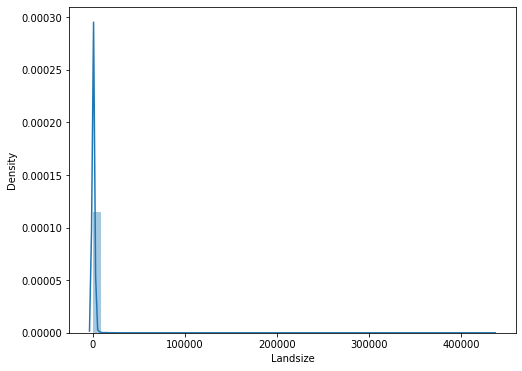

In [107]:
plt.figure(figsize=(8,6))
sns.distplot(df['Landsize'], kde=True)
plt.show()

Kita akan drop data diatas nilai batas atas extreme outliers (Q3) dari kolom Landsize.

In [108]:
df[df['Landsize']>2200]

Suburb            Address  Rooms Type      Price Method  \
235    Balwyn North        9 Gildan St    3.0    h  2000000.0     VB   
325       Braybrook        40 Errol St    3.0    t   505000.0     PI   
415       Brunswick         32 Lobb St    3.0    t   820000.0     SP   
424       Brunswick         30 Lobb St    3.0    h   740000.0     PI   
647     Collingwood  306/40 Stanley St    2.0    u   440000.0     VB   
...             ...                ...    ...  ...        ...    ...   
4030    Mont Albert     1/12 Hotham St    2.0    u   850000.0     SP   
4040       Richmond     36/73 River St    4.0    u   592000.0     SA   
4080  Fitzroy North      90 Bennett St    3.0    h  1400000.0     PI   
4254       Richmond  201/77 Abinger St    2.0    u   400000.0     VB   
4286      Chadstone      23 Oakpark Dr    3.0    h   990000.0     PI   

            SellerG       Date  Distance Postcode  Bathroom  Car  Landsize  \
235             Kay 2016-08-28       9.2   3104.0       1.0  2.0   75100.0   
325          Nelson 2016-06-27      10.8   3019.0       2.0  2.0    4931.0   
415          Jellis 2017-02-25       5.2   3056.0       2.0  2.0    4668.0   
424          Nelson 2016-05-28       5.2   3056.0       2.0  1.0    4676.0   
647         Collins 2017-04-03       1.6   3066.0       1.0  1.0    2773.0   
...             ...        ...       ...      ...       ...  ...       ...   
4030  hockingstuart 2017-09-09      10.2   3127.0       1.0  1.0    2243.0   
4040         Jellis 2017-09-09       2.4   3121.0       2.0  1.0   14294.0   
4080        McGrath 2017-09-16       3.6   3068.0       2.0  2.0    9338.0   
4254       Marshall 2017-09-23       2.4   3121.0       1.0  1.0    4425.0   
4286         Buxton 2017-08-26      11.7   3148.0       2.0  2.0    6000.0   

      BuildingArea  YearBuilt  CouncilArea  Lattitude  Longtitude  \
235        129.000        NaN   Boroondara  -37.80020   145.07000   
325        135.000        NaN  Maribyrnong  -37.77610   144.85570   
415        126.000     2011.0     Moreland  -37.76870   144.96490   
424        122.000     2010.0     Moreland  -37.76870   144.96490   
647         68.055     2010.0        Yarra  -37.80200   144.98540   
...            ...        ...          ...        ...         ...   
4030        68.055        NaN          NaN  -37.81452   145.10884   
4040        77.000     2006.0          NaN  -37.81894   145.01314   
4080       129.000        NaN          NaN  -37.78101   144.98843   
4254        51.000     2012.0          NaN  -37.82009   145.00380   
4286       129.000        NaN          NaN  -37.88932   145.10299   

                 Regionname  Propertycount SimplifiedMethod  \
235   Southern Metropolitan         7809.0        Available   
325    Western Metropolitan         3589.0        Available   
415   Northern Metropolitan        11918.0        Available   
424   Northern Metropolitan        11918.0        Available   
647   Northern Metropolitan         4553.0        Available   
...                     ...            ...              ...   
4030   Eastern Metropolitan         2079.0        Available   
4040  Northern Metropolitan        14949.0        Available   
4080  Northern Metropolitan         6244.0        Available   
4254  Northern Metropolitan        14949.0        Available   
4286  Southern Metropolitan         3582.0        Available   

     PropertySalesMonth PropertySalesYear  
235                   8              2016  
325                   6              2016  
415                   2              2017  
424                   5              2016  
647                   4              2017  
...                 ...               ...  
4030                  9              2017  
4040                  9              2017  
4080                  9              2017  
4254                  9              2017  
4286                  8              2017  

[84 rows x 23 columns]

In [109]:
index_out5=df[df['Landsize']>2200].index

In [110]:
df.drop(index=index_out5, axis=0, inplace=True)

In [111]:
df.reset_index(drop=True, inplace=True)

Untuk drop data Landsize dengan nilai 0, kita hanya akan drop data tersebut pada property dengan type h dan t.

In [112]:
land=df[(df['Type']=='h') | (df['Type']=='t')].reset_index(drop=True)

(array([108.,  72., 163., 215., 201., 193., 205., 141., 126., 139.]),
 array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500]),
 <BarContainer object of 10 artists>)

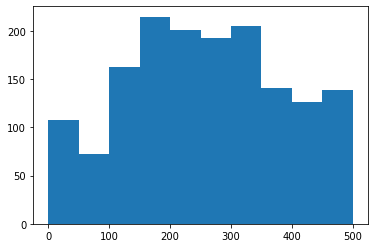

In [113]:
# Kita analisa extreme outliers pada Q1 Landsize
plt.hist(land['Landsize'],bins=[0,50,100,150,200,250,300,350,400,450,500])

Pada histogram diatas, dapat dilihat bahwa terdapat perubahan jumlah data yang drastis pada nilai 100, sehingga kita akan drop setiap nilai Landsize dibawah 100 pada tipe h dan t.

In [114]:
df[(df['Landsize']<100) & ((df['Type']=='h') | (df['Type']=='t'))]

Suburb           Address  Rooms Type      Price Method  \
1          Abbotsford  40 Federation La    3.0    h   850000.0     PI   
12       Airport West     50 Bedford St    3.0    h   730000.0     VB   
32        Albert Park    74 Bridport St    6.0    h  2800000.0     VB   
36         Alphington  7/7 Chandler Hwy    2.0    t   650000.0     SP   
57       Altona North     1/5 Little St    3.0    h   720000.0     VB   
...               ...               ...    ...  ...        ...    ...   
3829  South Melbourne   372 Coventry St    2.0    h   980000.0     VB   
3896      Pascoe Vale     5/14 Devon Rd    4.0    t   500000.0     VB   
3922    Carlton North      125 Newry St    2.0    h   950000.0     VB   
3963  South Melbourne       40 Smith St    2.0    h   970000.0     VB   
4035         Richmond     37 Spencer Pl    3.0    t  1500000.0     VB   

       SellerG       Date  Distance Postcode  Bathroom  Car  Landsize  \
1       Biggin 2017-04-03       2.5   3067.0       2.0  1.0      94.0   
12      Nelson 2016-03-12      13.5   3042.0       2.0  1.0       0.0   
32      Buxton 2016-07-30       3.3   3206.0       3.0  1.0       0.0   
36       Brace 2016-09-24       6.4   3078.0       1.0  0.0       0.0   
57        Greg 2016-06-08      11.1   3025.0       2.0  1.0       0.0   
...        ...        ...       ...      ...       ...  ...       ...   
3829  Marshall 2017-07-29       1.9   3205.0       1.0  0.0      64.0   
3896    Nelson 2017-03-09       8.5   3044.0       2.0  1.0      74.0   
3922    Nelson 2017-09-09       3.5   3054.0       1.0  2.0      97.0   
3963  Marshall 2017-09-09       1.9   3205.0       1.0  2.0      82.0   
4035    Jellis 2017-09-16       2.4   3121.0       2.0  2.0      72.0   

      BuildingArea  YearBuilt    CouncilArea  Lattitude  Longtitude  \
1            129.0        NaN          Yarra  -37.79690   144.99690   
12           145.0     1965.0  Moonee Valley  -37.72030   144.87550   
32           207.0        NaN   Port Phillip  -37.83990   144.95770   
36            96.0        NaN          Yarra  -37.78480   145.02500   
57           130.0     2012.0    Hobsons Bay  -37.83790   144.85830   
...            ...        ...            ...        ...         ...   
3829         112.0     2000.0   Port Phillip  -37.83326   144.95464   
3896         151.5     2011.0            NaN  -37.72184   144.92969   
3922          94.0        NaN            NaN  -37.78990   144.97112   
3963          94.0     1900.0            NaN  -37.83606   144.95164   
4035         145.0     2011.0            NaN  -37.81937   145.00146   

                 Regionname  Propertycount SimplifiedMethod  \
1     Northern Metropolitan         4019.0        Available   
12     Western Metropolitan         3464.0        Available   
32    Southern Metropolitan         3280.0        Available   
36    Northern Metropolitan         2211.0        Available   
57     Western Metropolitan         5132.0        Available   
...                     ...            ...              ...   
3829  Southern Metropolitan         5943.0        Available   
3896  Northern Metropolitan         7485.0        Available   
3922  Northern Metropolitan         3106.0        Available   
3963  Southern Metropolitan         5943.0        Available   
4035  Northern Metropolitan        14949.0        Available   

     PropertySalesMonth PropertySalesYear  
1                     4              2017  
12                    3              2016  
32                    7              2016  
36                    9              2016  
57                    6              2016  
...                 ...               ...  
3829                  7              2017  
3896                  3              2017  
3922                  9              2017  
3963                  9              2017  
4035                  9              2017  

[180 rows x 23 columns]

In [115]:
index_out6=df[(df['Landsize']<100) & ((df['Type']=='h') | (df['Type']=='t'))].index

In [116]:
df.drop(index=index_out6, axis=0, inplace=True)

In [117]:
df.reset_index(drop=True, inplace=True)

#### BuildingArea
Berdasarkan boxplot dan hasil analisa outlier, sepertinya kolom BuildingArea memiliki distribusi data yang tidak normal dan cenderung skew ke kanan (positive skew) dengan batas atas 315. Kita akan analisa data lebih mendalam dengan melihat bagaimana extreme outlier yang ada. Untuk kolom Building sendiri sangat umum jika kita temui property dengan Type t memiliki BuildingArea 0 karena kemungkinan memang masih pada tahap pembangunan/pengembangan, akan tetapi tidak umum jika kita menjumpai property Type h dan u dengan Building Area 0.

In [118]:
ex_outliers(df['BuildingArea'])

Nilai batas atas:  450.0
Nilai batas bawah:  -180.0
Jumlah extreme outlier:  26
Persentase Jumlah extreme outlier:  0.64


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


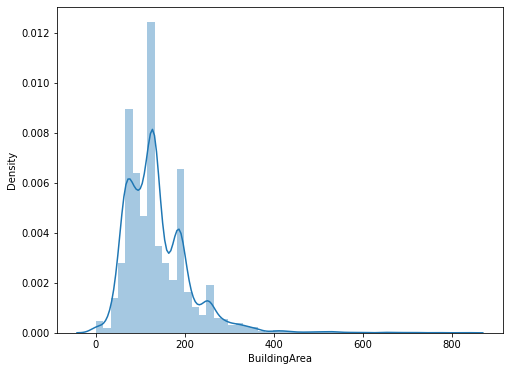

In [119]:
plt.figure(figsize=(8,6))
sns.distplot(df['BuildingArea'], kde=True)
plt.show()

Kita akan drop batas atas dari extreme outliers (Q3) kolom BuildingArea.

In [120]:
df[df['BuildingArea']>450]

Suburb           Address  Rooms Type      Price Method  \
57        Altona North        21 Neal Ct    3.0    h   770000.0     SP   
184       Balwyn North     3 Dumblane St    5.0    h  3300000.0     PI   
189       Balwyn North    325 Belmore Rd    5.0    h  3250000.0     PI   
209       Balwyn North        2 Tudor Ct    7.0    h  2600000.0     PI   
249          Bentleigh      20 Wright St    4.0    h  1150000.0     PI   
347      Brighton East       12 Meyer Ct    4.0    h  1825000.0     PI   
436            Bulleen         8 Vera St    3.0    h  1050000.0     PI   
489         Camberwell        9 Derby St   10.0    h  2250000.0     PI   
648          Eaglemont      8 Outlook Dr    4.0    h  2550000.0     VB   
714           Essendon        2 Cooke St    5.0    h  1575000.0     PI   
863          Glen Iris      35 Adrian St    5.0    h  2400000.0     VB   
1097               Kew      31 Argyle Rd    4.0    h  2600000.0     VB   
1519           Preston     5 Bischoff St    2.0    h   900000.0     SP   
1549         Reservoir    3 Hillcroft St    3.0    h   810000.0     SP   
1822          Sunshine   132 Cornwall Rd    3.0    h   910000.0     PI   
2801           Preston     121 Murray Rd    4.0    h   830000.0     PI   
2857     Brighton East     35 Studley Rd    4.0    t  1620000.0     PI   
2949          Viewbank     28 Kuranga Rd    3.0    h   940000.0     SA   
2975  Caroline Springs    9 Hounslow Grn   10.0    h  1150000.0     SP   
3215    Ferntree Gully      2 Francis Cr    3.0    t  1900000.0     PI   
3284          Brighton      23 Arthur Av    5.0    h  3000000.0     VB   
3457        Point Cook  84 Beachview Pde    4.0    h   690000.0     VB   
3742    Brunswick West        13 Zeal St    2.0    h  1225000.0     SP   
3844    Mount Waverley      37 Illuka Cr   10.0    h  2420000.0     SP   
3932            Balwyn     12 Belmore Rd   10.0    h  2580000.0     PI   
3956       Forest Hill         14 Box Av    4.0    h  1350000.0     VB   

            SellerG       Date  Distance Postcode  Bathroom  Car  Landsize  \
57    hockingstuart 2016-11-19      11.1   3025.0       1.0  3.0     602.0   
184   hockingstuart 2016-03-12       9.2   3104.0       4.0  2.0     760.0   
189          Jellis 2016-06-08       9.2   3104.0       4.0  2.0     886.0   
209           Barry 2016-05-14       9.2   3104.0       3.0  3.0     637.0   
249          Buxton 2017-02-25      13.0   3204.0       2.0  2.0     384.0   
347          Buxton 2016-04-06      10.7   3187.0       3.0  2.0     594.0   
436       Fletchers 2016-10-15      11.8   3105.0       2.0  1.0     728.0   
489        Marshall 2016-08-28       7.8   3124.0       5.0  1.0     639.0   
648           Miles 2016-11-27      10.3   3084.0       2.0  2.0    1484.0   
714            Brad 2016-04-16       8.0   3040.0       3.0  2.0     700.0   
863          Jellis 2016-07-30       9.2   3146.0       3.0  2.0     709.0   
1097            Kay 2016-08-28       5.6   3101.0       3.0  2.0     700.0   
1519  hockingstuart 2017-02-25       8.8   3072.0       1.0  1.0     529.0   
1549         Nelson 2016-10-12      11.2   3073.0       1.0  2.0     564.0   
1822        Douglas 2017-02-25      12.6   3020.0       2.0  2.0     653.0   
2801           Love 2017-03-06       8.4   3072.0       1.0  2.0     540.0   
2857         Buxton 2017-06-17      10.3   3187.0       2.0  2.0     326.0   
2949         Nelson 2017-06-17       8.9   3084.0       2.0  2.0     541.0   
2975             RW 2017-06-24      14.8   3023.0       5.0  4.0     688.0   
3215             LJ 2017-08-07      24.8   3156.0       2.0  2.0    1869.0   
3284         Buxton 2017-12-08      10.5   3186.0       3.0  2.0     818.0   
3457  hockingstuart 2017-07-15      14.7   3030.0       2.0  2.0     540.0   
3742         Walshe 2017-09-09       5.2   3055.0       1.0  2.0     501.0   
3844            LLC 2017-09-16      14.2   3149.0       5.0  2.0     757.0   
3932       Marshall 2017-09-23       7.9   3103.0       5.0  2.0   

In [121]:
index_out7=df[df['BuildingArea']>450].index

In [122]:
df.drop(index=index_out7, axis=0, inplace=True)

In [123]:
df.reset_index(drop=True, inplace=True)

Untuk drop kolom BuildingArea dengan nilai 0 berdasarkan Type Property u dan h.

In [124]:
area=df[(df['Type']=='h') | (df['Type']=='u')].reset_index(drop=True)

(array([1.270e+02, 1.185e+03, 1.259e+03, 7.050e+02, 1.990e+02, 1.930e+02,
        6.400e+01, 2.100e+01, 1.200e+01, 1.000e+00]),
 array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500]),
 <BarContainer object of 10 artists>)

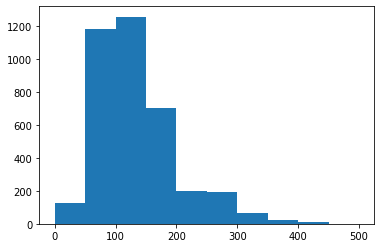

In [125]:
# Kita analisa extreme outliers pada Q1 BuildingArea
plt.hist(area['BuildingArea'],bins=[0,50,100,150,200,250,300,350,400,450,500])

Pada histogram diatas, dapat dilihat bahwa terdapat perubahan jumlah data yang drastis pada nilai 50, sehingga kita akan drop setiap nilai BuildingArea dibawah 50 pada tipe h dan u.

In [126]:
df[(df['BuildingArea']<50) & ((df['Type']=='h') | (df['Type']=='u'))]

Suburb              Address  Rooms Type      Price Method  \
50              Altona        5/57 Blyth St    3.0    u   730000.0     SP   
67            Armadale       9/19 Mercer Rd    3.0    u   735000.0     PI   
69            Armadale  15/405 Dandenong Rd    2.0    u   280000.0     PI   
373          Brunswick     9/15 De Carle St    2.0    u   272500.0     PI   
392          Brunswick     329 Brunswick Rd    4.0    h  1175000.0     PI   
...                ...                  ...    ...  ...        ...    ...   
3644      Williamstown        2/29 Dover Rd    2.0    u   385000.0     SP   
3848  Williams Landing       22 Bushlark Cr    3.0    h   555000.0     SP   
3938       Huntingdale       33 Beauford St    3.0    h  1205000.0     SA   
4008         Glen Iris            6 Viva St    4.0    h  2690000.0     PI   
4022               Kew        16 Hodgson St    5.0    h  3450000.0     PI   

            SellerG       Date  Distance Postcode  Bathroom  Car  Landsize  \
50           Barlow 2016-05-28      13.8   3018.0       2.0  1.0      70.0   
67         Marshall 2016-07-05       6.3   3143.0       2.0  1.0    2113.0   
69    hockingstuart 2016-10-09       6.3   3143.0       1.0  1.0       0.0   
373          Walshe 2016-04-06       5.2   3056.0       1.0  1.0       0.0   
392          Jellis 2016-11-27       5.2   3056.0       1.0  2.0     319.0   
...             ...        ...       ...      ...       ...  ...       ...   
3644       Williams 2017-07-29       6.8   3016.0       1.0  1.0       0.0   
3848  hockingstuart 2017-09-16      17.6   3027.0       2.0  2.0     265.0   
3938             FN 2017-09-23      12.3   3166.0       2.0  4.0     622.0   
4008       Marshall 2017-08-26       7.3   3146.0       2.0  2.0     647.0   
4022            Kay 2017-08-26       5.4   3101.0       2.0  2.0     668.0   

      BuildingArea  YearBuilt  CouncilArea  Lattitude  Longtitude  \
50            3.00     2014.0  Hobsons Bay  -37.86800   144.82850   
67           14.00     1970.0  Stonnington  -37.85430   145.02620   
69           38.00     1975.0  Stonnington  -37.86190   145.01850   
373          40.00     1970.0     Moreland  -37.76200   144.96470   
392           1.00        NaN     Moreland  -37.77630   144.95490   
...            ...        ...          ...        ...         ...   
3644         35.64     1967.0  Hobsons Bay  -37.85588   144.89936   
3848         25.00     2014.0          NaN  -37.85504   144.73516   
3938          0.00     1960.0          NaN  -37.90823   145.10851   
4008          0.00     1910.0          NaN  -37.86133   145.04167   
4022          0.00     2006.0          NaN  -37.80795   145.01474   

                 Regionname  Propertycount SimplifiedMethod  \
50     Western Metropolitan         5301.0        Available   
67    Southern Metropolitan         4836.0        Available   
69    Southern Metropolitan         4836.0        Available   
373   Northern Metropolitan        11918.0        Available   
392   Northern Metropolitan        11918.0        Available   
...                     ...            ...              ...   
3644   Western Metropolitan         6380.0        Available   
3848   Western Metropolitan         1999.0        Available   
3938  Southern Metropolitan          768.0        Available   
4008  Southern Metropolitan        10412.0        Available   
4022  Southern Metropolitan        10331.0        Available   

     PropertySalesMonth PropertySalesYear  
50                    5              2016  
67                    7              2016  
69                   10              2016  
373                   4              2016  
392                  11              2016  
...                 ...               ...  
3644                  7              2017  
3848                  9              2017  
3938                  9              2017  
4008                  8              2017  
4022                  8              2017  

[127 rows x 23 columns]

In [127]:
index_out8=df[(df['BuildingArea']<50) & ((df['Type']=='h') | (df['Type']=='u'))].index

In [128]:
df.drop(index=index_out8, axis=0, inplace=True)

In [129]:
df.reset_index(drop=True, inplace=True)

### Final Numerical Feature

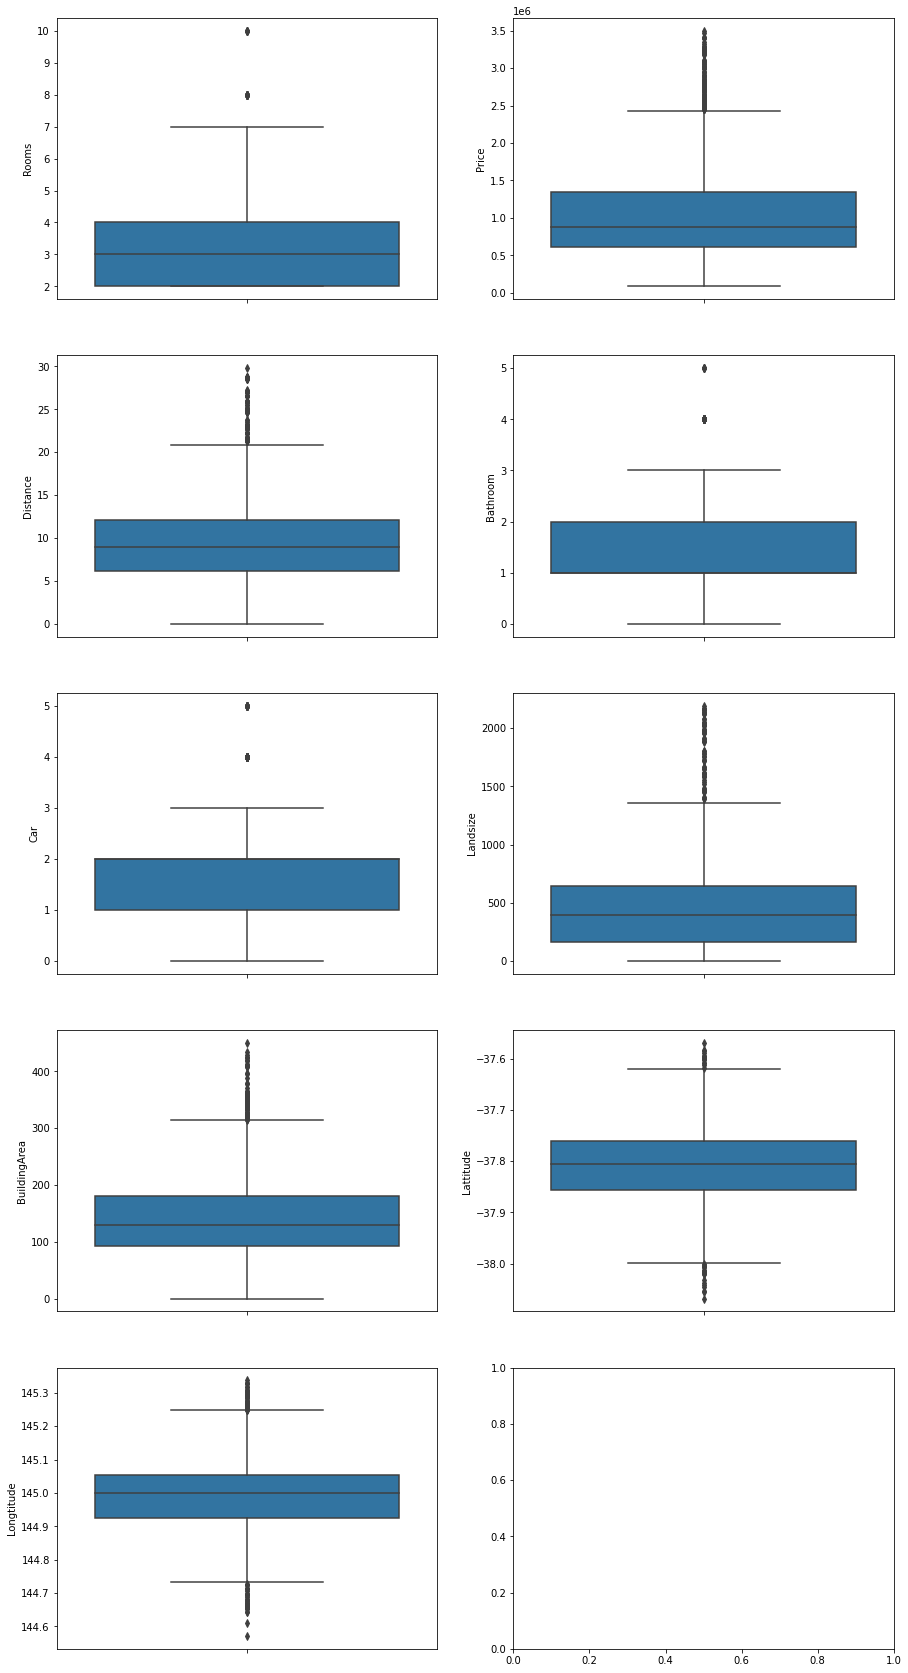

In [130]:
fig, ax = plt.subplots(5,2, figsize=(15,30))
for variable, subplot in zip(['Rooms','Price','Distance','Bathroom','Car','Landsize','BuildingArea','Lattitude',
                'Longtitude'], ax.flatten()):
    sns.boxplot(data=df, y=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

## Categorical Feature

In [131]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']
print ('Number of categorical feature:' , len(categorical_feature))

df[categorical_feature].head()

Number of categorical feature: 11


Suburb             Address Type Method SellerG Postcode CouncilArea  \
0  Abbotsford        5 Charles St    h     SP  Biggin   3067.0       Yarra   
1  Abbotsford         55a Park St    h     VB  Nelson   3067.0       Yarra   
2  Abbotsford  411/8 Grosvenor St    u     VB  Jellis   3067.0       Yarra   
3  Abbotsford     40 Nicholson St    h     VB  Nelson   3067.0       Yarra   
4  Abbotsford  7/20 Abbotsford St    u     SP    Greg   3067.0       Yarra   

              Regionname SimplifiedMethod PropertySalesMonth PropertySalesYear  
0  Northern Metropolitan        Available                  4              2017  
1  Northern Metropolitan        Available                  4              2016  
2  Northern Metropolitan        Available                 12              2016  
3  Northern Metropolitan        Available                 12              2016  
4  Northern Metropolitan        Available                  5              2016

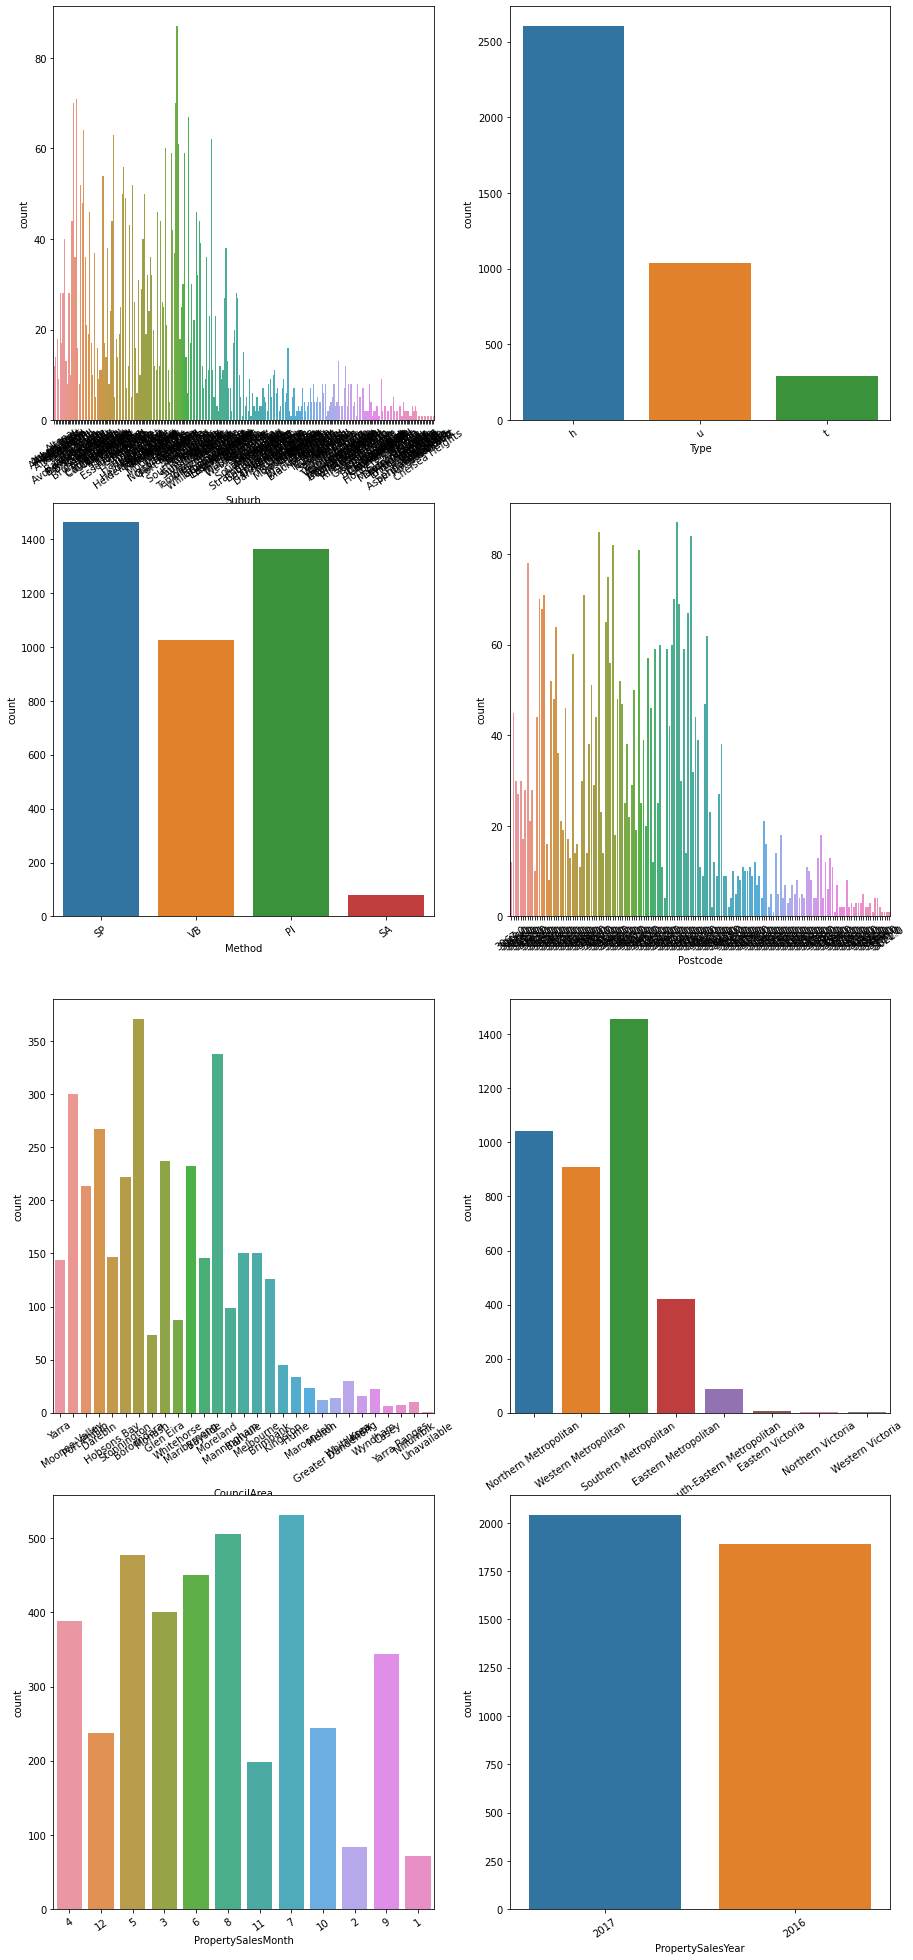

In [132]:
fig, ax = plt.subplots(4,2, figsize=(15,35))
for variable, subplot in zip(['Suburb','Type','Method','Postcode','CouncilArea','Regionname','PropertySalesMonth',
                              'PropertySalesYear'], ax.flatten()):
    sns.countplot(data=df, x=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(35)

In [133]:
df

Suburb             Address  Rooms Type      Price Method  \
0       Abbotsford        5 Charles St    3.0    h  1465000.0     SP   
1       Abbotsford         55a Park St    4.0    h  1600000.0     VB   
2       Abbotsford  411/8 Grosvenor St    4.0    u   700000.0     VB   
3       Abbotsford     40 Nicholson St    3.0    h  1350000.0     VB   
4       Abbotsford  7/20 Abbotsford St    2.0    u   441000.0     SP   
...            ...                 ...    ...  ...        ...    ...   
3924      Viewbank       149 Graham Rd    5.0    h  1316000.0     SP   
3925      Watsonia       76 Kenmare St    2.0    h   650000.0     PI   
3926  Williamstown       77 Merrett Dr    3.0    h  1031000.0     SP   
3927  Williamstown        96 Verdon St    4.0    h  2500000.0     PI   
3928    Yarraville          6 Agnes St    4.0    h  1285000.0     SP   

       SellerG       Date  Distance Postcode  Bathroom  Car  Landsize  \
0       Biggin 2017-04-03       2.5   3067.0       2.0  0.0     134.0   
1       Nelson 2016-04-06       2.5   3067.0       1.0  2.0     120.0   
2       Jellis 2016-12-11       2.5   3067.0       2.0  1.0       0.0   
3       Nelson 2016-12-11       2.5   3067.0       2.0  2.0     214.0   
4         Greg 2016-05-14       2.5   3067.0       1.0  1.0       0.0   
...        ...        ...       ...      ...       ...  ...       ...   
3924    Nelson 2017-08-26       8.9   3084.0       3.0  3.0     696.0   
3925  Morrison 2017-08-26      14.5   3087.0       1.0  1.0     210.0   
3926  Williams 2017-08-26       6.8   3016.0       2.0  2.0     333.0   
3927   Sweeney 2017-08-26       6.8   3016.0       1.0  5.0     866.0   
3928   Village 2017-08-26       6.3   3013.0       1.0  1.0     362.0   

      BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0          150.000     1900.0       Yarra  -37.80930   144.99440   
1          142.000     2014.0       Yarra  -37.80720   144.99410   
2           90.000        NaN       Yarra  -37.81100   145.00670   
3          190.000     2005.0       Yarra  -37.80850   144.99640   
4           68.055        NaN       Yarra  -37.80160   144.99880   
...            ...        ...         ...        ...         ...   
3924       253.000        NaN         NaN  -37.73501   145.08341   
3925        79.000     2006.0         NaN  -37.70657   145.07878   
3926       133.000     1995.0         NaN  -37.85927   144.87904   
3927       157.000     1920.0         NaN  -37.85908   144.89299   
3928       112.000     1920.0         NaN  -37.81188   144.88449   

                 Regionname  Propertycount SimplifiedMethod  \
0     Northern Metropolitan         4019.0        Available   
1     Northern Metropolitan         4019.0        Available   
2     Northern Metropolitan         4019.0        Available   
3     Northern Metropolitan         4019.0        Available   
4     Northern Metropolitan         4019.0        Available   
...                     ...            ...              ...   
3924   Eastern Metropolitan         2698.0        Available   
3925  Northern Metropolitan         2329.0        Available   
3926   Western Metropolitan         6380.0        Available   
3927   Western Metropolitan         6380.0        Available   
3928   Western Metropolitan         6543.0        Available   

     PropertySalesMonth PropertySalesYear  
0                     4              2017  
1                     4              2016  
2                    12              2016  
3                    12              2016  
4                     5              2016  
...                 ...               ...  
3924                  8              2017  
3925                  8              2017  
3926                  8              2017  
3927                  8              2017  
3928                  8              2017  

[3929 rows x 23 columns]

In [134]:
# Data yang dipakai setelah proses cleansing dan juga outlier analysis adalah 87.68% dari total data property yang dijual
# dan data ini sangat representatif untuk masuk ke dalam proses analisa dan clustering.
len(df)/4481*100

87.68132113367551

# Feature Engineering

## Penambahan Kolom: Season

In [135]:
df['Season']=df['PropertySalesMonth'].apply(lambda x: 'Summer' if (x=='12') | (x=='1') | (x=='2') else 
                            'Fall' if (x=='3') | (x=='4') | (x=='5') else
                            'Winter' if (x=='6') | (x=='7') | (x=='8') else
                            'Spring' if (x=='9') | (x=='10') | (x=='11') else '0')

## Ekstraksi dan Penambahan Kolom: StreetType

### Pisahkan Kata pada Kolom Address

In [136]:
# Pisahkan Address menjadi komponen-komponen alamat
df['Address'].str.split(' ', expand=True)

0           1   2     3
0         5     Charles  St  None
1       55a        Park  St  None
2     411/8   Grosvenor  St  None
3        40   Nicholson  St  None
4      7/20  Abbotsford  St  None
...     ...         ...  ..   ...
3924    149      Graham  Rd  None
3925     76     Kenmare  St  None
3926     77     Merrett  Dr  None
3927     96      Verdon  St  None
3928      6       Agnes  St  None

[3929 rows x 4 columns]

### Analisa Kolom hasil Potongan Kolom Address

#### Kolom 0

In [137]:
df['Address'].str.split(' ', expand=True)[0].nunique()

1424

In [138]:
df['Address'].str.split(' ', expand=True)[0].unique()

array(['5', '55a', '411/8', ..., '201', '1E', '149'], dtype=object)

In [139]:
df['Address'].str.split(' ', expand=True)[0].isna().sum()

0

Kata pada kolom 0 tidak mengandung informasi terkait tipe jalan, sehingga kolom ini tidak dipakai untuk mengisi nilai pada kolom StreetType.

#### Kolom 1

In [140]:
df['Address'].str.split(' ', expand=True)[1].nunique()

1973

In [141]:
df['Address'].str.split(' ', expand=True)[1].unique()

array(['Charles', 'Park', 'Grosvenor', ..., 'Stoneyfell', 'Garton',
       'Winswood'], dtype=object)

In [142]:
df['Address'].str.split(' ', expand=True)[1].isna().sum()

0

Kata pada kolom 1 tidak mengandung informasi terkait tipe jalan, sehingga kolom ini tidak dipakai untuk mengisi nilai pada kolom StreetType.

#### Kolom 2

In [143]:
#Check nilai unik pada kolom 2
df['Address'].str.split(' ', expand=True)[2].nunique()

59

In [144]:
df['Address'].str.split(' ', expand=True)[2].unique()

array(['St', 'Rd', 'Gr', 'Pde', 'Dr', 'Parade', 'Ct', 'Street', 'Pl',
       'Boulevard', 'Kilda', 'Hwy', 'Tce', 'Carle', 'Nido', 'Huntly',
       'La', 'Grove', 'Bvd', 'Avenue', 'Cct', 'Cl', 'Alexander', 'Vale',
       'Iris', 'Cir', 'Heidelberg', 'Elmo', 'Crescent', 'Park', 'Sq',
       'Bourke', 'Strand', 'Vigeons', 'Plenty', 'Nook', 'Creek',
       'Victoria', 'Fairway', 'Paw', 'Esp', 'Ridge', 'Collins', 'Albert',
       'Mews', 'Righi', 'Georges', 'Crofts', 'Links', 'Grand', 'Av', 'Cr',
       'Gdns', 'Wy', 'Kinnord', 'Outlook', 'Esplanade', 'Crossway',
       'Corso'], dtype=object)

In [145]:
df['Address'].str.split(' ', expand=True)[2].isna().sum()

0

Kata pada kolom 2 mengandung banyak informasi terkait tipe jalan, sehingga kolom ini dipakai untuk mengisi nilai pada kolom StreetType.

In [146]:
#['Kilda','Carle', 'Iris', 'Buang', 'Athol', 'Nido', 'Huberts','Huntly','Oxford','Righi','Alexander','Hellier', 'Heidelberg', 
# 'Elmo','Johns', 'Bourke', 'James', 'Edmonds', 'Vigeons', 'Crofts', 'Plenty','Albert', 'David', 'Glade', 'Andrews','Victoria', 
# 'Paw', 'Burke','Lonsdale', 'Collins', 'Georges', 'Dandenong','Dell', 'Eyrie', 'Grand', 'Gum','Pleasant','Kinnord','Warrandyte',
# 'Woodland','Ebor']
# Unuse words categorized as 'Others' value

In [147]:
df['StreetType1']=df['Address'].str.split(' ', expand=True)[2].apply(lambda x: 'Street' if x in ['St','Street'] else
                    'Road' if x in ['Rd'] else 'Groves' if x in ['Gr','Grove',] else 'Drive' if x in ['Dr'] else
                    'Parade' if x in ['Pde','Parade'] else 'Place' if x in ['Pl'] else 'Court' if x in ['Ct'] else
                    'Lane' if x in ['La'] else 'Terrace' if x in ['Tce','Terrace'] else 'Boulevard' if x in 
                    ['Bvd','Boulevard'] else 'Highway' if x in ['Highway','Hwy'] else 'Close' if x in ['Cl'] else
                    'Valley' if x in ['Valley','Vale'] else 'Circuit' if x in ['Cct'] else 'Avenue' if x in 
                    ['Avenue','Av','Ave'] else 'Crescent' if x in ['Crescent'] else 'Circle' if x in ['Cir'] else
                    'Park' if x in ['Park'] else 'Grange' if x in ['Grange','Gra'] else 'Square' if x in ['Sq'] else
                    'Esplanade' if x in ['Esplanade','Esp'] else 'Strand' if x in ['Strand'] else 'Cove' if x in ['Cove'] else
                    'View' if x in ['View'] else 'Quay' if x in ['Qy'] else 'Nook' if x in ['Nook'] else 
                    'Creek' if x in ['Creek','Cr'] else 'Gardens' if x in ['Gdns','Grn'] else 'Fairway' if x in ['Fairway'] else
                    'Ridge' if x in ['Ridge'] else 'Mews' if x in ['Mews'] else 'Bluff' if x in ['Bluff'] else
                    'Links' if x in ['Links'] else 'Hill' if x in ['Hill'] else 'Summit' if x in ['Summit'] else
                    'Way' if x in ['Wy'] else 'East' if x in ['East'] else 'Crossway'if x in ['Crossway'] else
                    'Outlook' if x in ['Outlook'] else 'Others')

#### Kolom 3

In [148]:
#Check nilai unik pada kolom 3
df['Address'].str.split(' ', expand=True)[3].nunique()

6

In [149]:
df['Address'].str.split(' ', expand=True)[3].unique()

array([None, 'Rd', 'St', 'Gr', 'W', 'N', 'S'], dtype=object)

In [150]:
df['Address'].str.split(' ', expand=True)[3].isna().sum()

3877

Kata pada kolom 3 mengandung informasi terkait tipe jalan, sehingga kolom ini dipakai untuk mengisi nilai pada kolom StreetType.

In [151]:
df['StreetType2']=df['Address'].str.split(' ', expand=True)[3].apply(lambda x: 'North' if x=='N' else 'Road' if x=='Rd' else
                                                    'Street' if x=='St' else 'Groves' if x=='Gr' else 'South' if x=='S' else
                                                    'West' if x=='W' else 'Parade' if x =='Pde' else 'Place' if x=='Pl' else
                                                    'Drive' if x=='Dr' else 'Avenue' if x=='Av' else 'Others')

### Gabungkan Hasil Potongan Kolom

In [152]:
street=[]

for i in range(len(df)):
    if df.loc[i,'StreetType1']!='Others':
        street.append(df.loc[i,'StreetType1'])
    else:
        street.append(df.loc[i,'StreetType2'])

In [153]:
df['StreetType']=street

In [154]:
df.drop(columns=['StreetType1','StreetType2'], axis=1, inplace=True)

In [155]:
df['StreetType'].unique()

array(['Street', 'Road', 'Groves', 'Parade', 'Drive', 'Court', 'Place',
       'Boulevard', 'Highway', 'Terrace', 'Lane', 'Avenue', 'Circuit',
       'Close', 'Valley', 'Circle', 'Crescent', 'Park', 'Square',
       'Strand', 'Nook', 'Creek', 'Others', 'Fairway', 'Esplanade',
       'Ridge', 'Mews', 'Links', 'Gardens', 'Way', 'Outlook', 'Crossway'],
      dtype=object)

In [156]:
df['StreetType'].value_counts()

Street       2317
Road          878
Court         172
Avenue        106
Drive          97
Groves         86
Parade         63
Place          44
Creek          37
Close          30
Lane           17
Boulevard      14
Terrace        10
Way             9
Highway         8
Valley          7
Others          5
Circuit         4
Square          4
Esplanade       3
Crescent        3
Strand          2
Park            2
Mews            2
Circle          2
Nook            1
Fairway         1
Ridge           1
Links           1
Gardens         1
Outlook         1
Crossway        1
Name: StreetType, dtype: int64

In [157]:
df

Suburb             Address  Rooms Type      Price Method  \
0       Abbotsford        5 Charles St    3.0    h  1465000.0     SP   
1       Abbotsford         55a Park St    4.0    h  1600000.0     VB   
2       Abbotsford  411/8 Grosvenor St    4.0    u   700000.0     VB   
3       Abbotsford     40 Nicholson St    3.0    h  1350000.0     VB   
4       Abbotsford  7/20 Abbotsford St    2.0    u   441000.0     SP   
...            ...                 ...    ...  ...        ...    ...   
3924      Viewbank       149 Graham Rd    5.0    h  1316000.0     SP   
3925      Watsonia       76 Kenmare St    2.0    h   650000.0     PI   
3926  Williamstown       77 Merrett Dr    3.0    h  1031000.0     SP   
3927  Williamstown        96 Verdon St    4.0    h  2500000.0     PI   
3928    Yarraville          6 Agnes St    4.0    h  1285000.0     SP   

       SellerG       Date  Distance Postcode  Bathroom  Car  Landsize  \
0       Biggin 2017-04-03       2.5   3067.0       2.0  0.0     134.0   
1       Nelson 2016-04-06       2.5   3067.0       1.0  2.0     120.0   
2       Jellis 2016-12-11       2.5   3067.0       2.0  1.0       0.0   
3       Nelson 2016-12-11       2.5   3067.0       2.0  2.0     214.0   
4         Greg 2016-05-14       2.5   3067.0       1.0  1.0       0.0   
...        ...        ...       ...      ...       ...  ...       ...   
3924    Nelson 2017-08-26       8.9   3084.0       3.0  3.0     696.0   
3925  Morrison 2017-08-26      14.5   3087.0       1.0  1.0     210.0   
3926  Williams 2017-08-26       6.8   3016.0       2.0  2.0     333.0   
3927   Sweeney 2017-08-26       6.8   3016.0       1.0  5.0     866.0   
3928   Village 2017-08-26       6.3   3013.0       1.0  1.0     362.0   

      BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0          150.000     1900.0       Yarra  -37.80930   144.99440   
1          142.000     2014.0       Yarra  -37.80720   144.99410   
2           90.000        NaN       Yarra  -37.81100   145.00670   
3          190.000     2005.0       Yarra  -37.80850   144.99640   
4           68.055        NaN       Yarra  -37.80160   144.99880   
...            ...        ...         ...        ...         ...   
3924       253.000        NaN         NaN  -37.73501   145.08341   
3925        79.000     2006.0         NaN  -37.70657   145.07878   
3926       133.000     1995.0         NaN  -37.85927   144.87904   
3927       157.000     1920.0         NaN  -37.85908   144.89299   
3928       112.000     1920.0         NaN  -37.81188   144.88449   

                 Regionname  Propertycount SimplifiedMethod  \
0     Northern Metropolitan         4019.0        Available   
1     Northern Metropolitan         4019.0        Available   
2     Northern Metropolitan         4019.0        Available   
3     Northern Metropolitan         4019.0        Available   
4     Northern Metropolitan         4019.0        Available   
...                     ...            ...              ...   
3924   Eastern Metropolitan         2698.0        Available   
3925  Northern Metropolitan         2329.0        Available   
3926   Western Metropolitan         6380.0        Available   
3927   Western Metropolitan         6380.0        Available   
3928   Western Metropolitan         6543.0        Available   

     PropertySalesMonth PropertySalesYear  Season StreetType  
0                     4              2017    Fall     Street  
1                     4              2016    Fall     Street  
2                    12              2016  Summer     Street  
3                    12              2016  Summer     Street  
4                     5              2016    Fall     Street  
...                 ...               ...     ...        ...  
3924                  8              2017  Winter       Road  
3925                  8              2017  Winter     Street  
3926                  8              2017  Winter      Drive  
3927                  8              2017  Winter     Street  
392

# Unsupervised Modelling: Clustering
Dalam pemodelan ini, drop beberapa kolom yang tidak akan dipakai, berikut adalah pertimbangannya:
1. Address: Terlalu banyak nilai unik, bisa menyebabkan multikolinearitas.
2. Method: Secara logika, bagaimana cara property dijual tidak mempengaruhi pengelompokan property.
3. SellerG: Secara logika, siapa agen property yang menjual tidak mempengaruhi pengelompokan property.
4. Date: Terlalu banyak nilai unik, bisa menyebabkan multikolinearitas.
5. Postcode: Terlalu banyak nilai unik, bisa menyebabkan multikolinearitas, dan juga nilainya sudah diwakilkan oleh Suburbs.
6. Bathroom: Nilanya sangat berkaitan erat dengan Rooms, sehingga nilai dari Bathroom sudah diwakilkan oleh Rooms.
7. Landsize: Nilanya sangat berkaitan erat dengan BuildingArea, sehingga nilai dari Bathroom sudah diwakilkan oleh BuildingArea.
7. YearBuilt: Terlalu banyak nilai NaN
8. CouncilArea: Terlalu banyak nilai unik, bisa menyebabkan multikolinearitas.
9. Lattitude: Terlalu banyak nilai unik, bisa menyebabkan multikolinearitas.
10. Longtitude: Terlalu banyak nilai unik, bisa menyebabkan multikolinearitas.
11. Propertycount: Secara logika, jumlah property pada suatu daerah tidak mempengaruhi pengelompokan property.
12. SimplifiedMethod: Hanya berisi satu nilai saja.
12. PropertySalesYear: Hanya terdapat dua nilai (2016 dan 2017) dan sudah diwakilkan oleh Month

Kolom-kolom ini akan tetap dipakai pada analisis data nanti.

In [158]:
df_model=df.drop(columns=['Address','Method','SellerG','Date','Postcode','Bathroom','Landsize','YearBuilt','CouncilArea',
                          'Lattitude','Longtitude','Propertycount','SimplifiedMethod','PropertySalesYear'], axis=1)

In [159]:
df_model

Suburb  Rooms Type      Price  Distance  Car  BuildingArea  \
0       Abbotsford    3.0    h  1465000.0       2.5  0.0       150.000   
1       Abbotsford    4.0    h  1600000.0       2.5  2.0       142.000   
2       Abbotsford    4.0    u   700000.0       2.5  1.0        90.000   
3       Abbotsford    3.0    h  1350000.0       2.5  2.0       190.000   
4       Abbotsford    2.0    u   441000.0       2.5  1.0        68.055   
...            ...    ...  ...        ...       ...  ...           ...   
3924      Viewbank    5.0    h  1316000.0       8.9  3.0       253.000   
3925      Watsonia    2.0    h   650000.0      14.5  1.0        79.000   
3926  Williamstown    3.0    h  1031000.0       6.8  2.0       133.000   
3927  Williamstown    4.0    h  2500000.0       6.8  5.0       157.000   
3928    Yarraville    4.0    h  1285000.0       6.3  1.0       112.000   

                 Regionname PropertySalesMonth  Season StreetType  
0     Northern Metropolitan                  4    Fall     Street  
1     Northern Metropolitan                  4    Fall     Street  
2     Northern Metropolitan                 12  Summer     Street  
3     Northern Metropolitan                 12  Summer     Street  
4     Northern Metropolitan                  5    Fall     Street  
...                     ...                ...     ...        ...  
3924   Eastern Metropolitan                  8  Winter       Road  
3925  Northern Metropolitan                  8  Winter     Street  
3926   Western Metropolitan                  8  Winter      Drive  
3927   Western Metropolitan                  8  Winter     Street  
3928   Western Metropolitan                  8  Winter     Street  

[3929 rows x 11 columns]

## Preprocessing

### Pre-processing (Semua dengan Proses Scaling)

In [160]:
#Transformer untuk encode masing-masing feature
transform1=ColumnTransformer([
    ('onehot',ce.OneHotEncoder(drop_invariant=True),['Type','Season']),
    ('binary',ce.BinaryEncoder(drop_invariant=True),['Suburb','Regionname','StreetType']),
    ('scaling',RobustScaler(),['Rooms','Price','Distance','Car','BuildingArea'])
], remainder='passthrough')

In [161]:
#Check apakah transformer jalan atau tidak
transform1.fit_transform(df_model)

array([[1, 0, 0, ..., -2.0, 0.23595505617977527, '4'],
       [1, 0, 0, ..., 0.0, 0.14606741573033707, '4'],
       [0, 1, 0, ..., -1.0, -0.43820224719101125, '12'],
       ...,
       [1, 0, 0, ..., 0.0, 0.0449438202247191, '8'],
       [1, 0, 0, ..., 3.0, 0.3146067415730337, '8'],
       [1, 0, 0, ..., -1.0, -0.19101123595505617, '8']], dtype=object)

In [162]:
features1=transform1.transformers_[0][1].get_feature_names()+transform1.transformers_[1][1].get_feature_names()+['Rooms','Price',
                                                                'Distance','Car','BuildingArea','PropertySalesMonth']
features1

['Type_1',
 'Type_2',
 'Type_3',
 'Season_1',
 'Season_2',
 'Season_3',
 'Season_4',
 'Suburb_0',
 'Suburb_1',
 'Suburb_2',
 'Suburb_3',
 'Suburb_4',
 'Suburb_5',
 'Suburb_6',
 'Suburb_7',
 'Suburb_8',
 'Regionname_0',
 'Regionname_1',
 'Regionname_2',
 'Regionname_3',
 'StreetType_0',
 'StreetType_1',
 'StreetType_2',
 'StreetType_3',
 'StreetType_4',
 'StreetType_5',
 'Rooms',
 'Price',
 'Distance',
 'Car',
 'BuildingArea',
 'PropertySalesMonth']

In [163]:
df_clust1=pd.DataFrame(transform1.fit_transform(df_model), columns=features1)
df_clust1

Type_1 Type_2 Type_3 Season_1 Season_2 Season_3 Season_4 Suburb_0  \
0         1      0      0        1        0        0        0        0   
1         1      0      0        1        0        0        0        0   
2         0      1      0        0        1        0        0        0   
3         1      0      0        0        1        0        0        0   
4         0      1      0        1        0        0        0        0   
...     ...    ...    ...      ...      ...      ...      ...      ...   
3924      1      0      0        0        0        1        0        0   
3925      1      0      0        0        0        1        0        0   
3926      1      0      0        0        0        1        0        0   
3927      1      0      0        0        0        1        0        0   
3928      1      0      0        0        0        1        0        0   

     Suburb_1 Suburb_2 Suburb_3 Suburb_4 Suburb_5 Suburb_6 Suburb_7 Suburb_8  \
0           0        0        0        0        0        0        0        1   
1           0        0        0        0        0        0        0        1   
2           0        0        0        0        0        0        0        1   
3           0        0        0        0        0        0        0        1   
4           0        0        0        0        0        0        0        1   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3924        0        1        1        0        0        1        0        1   
3925        0        1        1        0        0        1        1        0   
3926        0        1        1        0        1        0        0        0   
3927        0        1        1        0        1        0        0        0   
3928        0        1        1        0        1        0        1        1   

     Regionname_0 Regionname_1 Regionname_2 Regionname_3 StreetType_0  \
0               0            0            0            1            0   
1               0            0            0            1            0   
2               0            0            0            1            0   
3               0            0            0            1            0   
4               0            0            0            1            0   
...           ...          ...          ...          ...          ...   
3924            0            1            0            0            0   
3925            0            0            0            1            0   
3926            0            0            1            0            0   
3927            0            0            1            0            0   
3928            0            0            1            0            0   

     StreetType_1 StreetType_2 StreetType_3 StreetType_4 StreetType_5 Rooms  \
0               0            0            0            0            1   0.0   
1               0            0            0            0            1   0.5   
2               0            0            0            0            1   0.5   
3               0            0            0            0            1   0.0   
4               0            0            0            0            1  -0.5   
...           ...          ...          ...          ...          ...   ...   
3924            0            0            0            1            0   1.0   
3925            0            0            0            0            1  -0.5   
3926            0            0            1            0            1   0.0   
3927            0            0            0            0            1   0.5   
3928            0            0            0            0            1   0.5   

         Price  Distance  Car BuildingArea PropertySalesMonth  
0     0.795918 -1.066667 -2.0     0.235955                  4  
1     0.979592 -1.066667  0.0     0.146067                  4  
2    -0.244898 -1.066667 -1.0    -0.438202                 12  
3     0.639456 -1.066667  0.0     0.685393                 12  
4    -0.5

In [164]:
pca=PCA(n_components=32).fit(df_clust1)

In [165]:
x_pca1=pca.transform(df_clust1)

In [166]:
x_pca1

array([[ 2.81833550e+00, -6.73797358e-01, -1.70598091e+00, ...,
         1.97905094e-03, -4.52235264e-15,  2.05039384e-15],
       [ 2.78503776e+00,  5.38359625e-01, -1.38311822e+00, ...,
         2.26240171e-03, -3.89747310e-15,  2.08631422e-15],
       [-5.23045499e+00, -1.41556057e+00, -8.34955840e-01, ...,
         1.88233137e-03,  5.56459473e-15, -7.15994760e-15],
       ...,
       [-1.30288804e+00,  1.39180364e-01, -1.71992480e-01, ...,
        -2.55599320e-03, -2.87283229e-15, -1.36127432e-15],
       [-1.36094810e+00,  2.80109906e+00, -7.25470730e-01, ...,
        -2.60263929e-03, -2.36624185e-15, -1.13005034e-15],
       [-1.28127683e+00, -2.28600223e-01, -7.93694825e-01, ...,
        -1.24080319e-03, -3.15719673e-15, -1.16573418e-15]])

In [167]:
variance=[]
for i in range(32):
    variance.append(np.var(x_pca1[:,i]))
variance

[7.729660878932509,
 1.5908946892203857,
 0.8684019778950166,
 0.4922664848066139,
 0.4008223598337871,
 0.37396535631401306,
 0.327459203733783,
 0.29825245210519113,
 0.29048092791788666,
 0.25334612319900923,
 0.23993001172682685,
 0.23178829024080128,
 0.2188327458138887,
 0.198073763042056,
 0.1713650311333902,
 0.16661785644490965,
 0.14183462600058638,
 0.1222419371622252,
 0.1168066937903281,
 0.10142619014145593,
 0.09455522527579621,
 0.0866704844709091,
 0.0564992227090154,
 0.04545931424855541,
 0.030847797298721877,
 0.028302062735651973,
 0.016517092352235984,
 0.0005030066565437653,
 0.00025246199189802763,
 0.0002495518895310734,
 1.835317051499357e-29,
 7.167290851390716e-30]

In [168]:
print('Informasi yang tersimpan pada 2 komponen pertama',round(sum(variance[:2])/sum(variance)*100,2), '%')

Informasi yang tersimpan pada 2 komponen pertama 63.43 %


### Pre-processing (Beberapa dengan Proses Scaling)

In [169]:
#Transformer untuk encode masing-masing feature
transform2=ColumnTransformer([
    ('onehot',ce.OneHotEncoder(drop_invariant=True),['Type','Season']),
    ('binary',ce.BinaryEncoder(drop_invariant=True),['Suburb','Regionname','StreetType']),
    ('scaler',RobustScaler(),['Price'])
], remainder='passthrough')

In [170]:
#Check apakah transformer jalan atau tidak
transform2.fit_transform(df_model)

array([[1, 0, 0, ..., 0.0, 150.0, '4'],
       [1, 0, 0, ..., 2.0, 142.0, '4'],
       [0, 1, 0, ..., 1.0, 90.0, '12'],
       ...,
       [1, 0, 0, ..., 2.0, 133.0, '8'],
       [1, 0, 0, ..., 5.0, 157.0, '8'],
       [1, 0, 0, ..., 1.0, 112.0, '8']], dtype=object)

In [171]:
features2=transform2.transformers_[0][1].get_feature_names()+transform2.transformers_[1][1].get_feature_names()+['Price','Rooms',
                                                        'Distance','Car','BuildingArea','PropertySalesMonth']
features2

['Type_1',
 'Type_2',
 'Type_3',
 'Season_1',
 'Season_2',
 'Season_3',
 'Season_4',
 'Suburb_0',
 'Suburb_1',
 'Suburb_2',
 'Suburb_3',
 'Suburb_4',
 'Suburb_5',
 'Suburb_6',
 'Suburb_7',
 'Suburb_8',
 'Regionname_0',
 'Regionname_1',
 'Regionname_2',
 'Regionname_3',
 'StreetType_0',
 'StreetType_1',
 'StreetType_2',
 'StreetType_3',
 'StreetType_4',
 'StreetType_5',
 'Price',
 'Rooms',
 'Distance',
 'Car',
 'BuildingArea',
 'PropertySalesMonth']

In [172]:
df_clust2=pd.DataFrame(transform2.fit_transform(df_model), columns=features2)
df_clust2

Type_1 Type_2 Type_3 Season_1 Season_2 Season_3 Season_4 Suburb_0  \
0         1      0      0        1        0        0        0        0   
1         1      0      0        1        0        0        0        0   
2         0      1      0        0        1        0        0        0   
3         1      0      0        0        1        0        0        0   
4         0      1      0        1        0        0        0        0   
...     ...    ...    ...      ...      ...      ...      ...      ...   
3924      1      0      0        0        0        1        0        0   
3925      1      0      0        0        0        1        0        0   
3926      1      0      0        0        0        1        0        0   
3927      1      0      0        0        0        1        0        0   
3928      1      0      0        0        0        1        0        0   

     Suburb_1 Suburb_2 Suburb_3 Suburb_4 Suburb_5 Suburb_6 Suburb_7 Suburb_8  \
0           0        0        0        0        0        0        0        1   
1           0        0        0        0        0        0        0        1   
2           0        0        0        0        0        0        0        1   
3           0        0        0        0        0        0        0        1   
4           0        0        0        0        0        0        0        1   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3924        0        1        1        0        0        1        0        1   
3925        0        1        1        0        0        1        1        0   
3926        0        1        1        0        1        0        0        0   
3927        0        1        1        0        1        0        0        0   
3928        0        1        1        0        1        0        1        1   

     Regionname_0 Regionname_1 Regionname_2 Regionname_3 StreetType_0  \
0               0            0            0            1            0   
1               0            0            0            1            0   
2               0            0            0            1            0   
3               0            0            0            1            0   
4               0            0            0            1            0   
...           ...          ...          ...          ...          ...   
3924            0            1            0            0            0   
3925            0            0            0            1            0   
3926            0            0            1            0            0   
3927            0            0            1            0            0   
3928            0            0            1            0            0   

     StreetType_1 StreetType_2 StreetType_3 StreetType_4 StreetType_5  \
0               0            0            0            0            1   
1               0            0            0            0            1   
2               0            0            0            0            1   
3               0            0            0            0            1   
4               0            0            0            0            1   
...           ...          ...          ...          ...          ...   
3924            0            0            0            1            0   
3925            0            0            0            0            1   
3926            0            0            1            0            1   
3927            0            0            0            0            1   
3928            0            0            0            0            1   

         Price Rooms Distance  Car BuildingArea PropertySalesMonth  
0     0.795918   3.0      2.5  0.0        150.0                  4  
1     0.979592   4.0      2.5  2.0        142.0                  4  
2    -0.244898   4.0      2.5  1.0         90.0                 12  
3     0.639456   3.0      2.5  2.0        190.0                 12  
4    -0.597279   2.0      2.5  1.0       68.055         

In [173]:
pca=PCA(n_components=32).fit(df_clust2)

In [174]:
x_pca2=pca.transform(df_clust2)

In [175]:
x_pca2

array([[ 1.17565115e+01, -7.21989405e+00,  2.84381901e+00, ...,
         1.97749887e-03,  1.86401628e-15, -1.11639628e-14],
       [ 3.78383435e+00, -6.99808261e+00,  2.81236807e+00, ...,
         2.26061257e-03,  1.03600351e-15, -1.19107262e-14],
       [-4.82192173e+01, -6.11354276e+00, -5.25453845e+00, ...,
         1.88078056e-03, -7.25265755e-15,  1.48420455e-14],
       ...,
       [-5.15327599e+00, -2.50637660e+00, -1.29907189e+00, ...,
        -2.55673787e-03, -2.32026518e-15, -8.42351292e-15],
       [ 1.88841458e+01, -2.91262371e+00, -1.32099663e+00, ...,
        -2.60125089e-03, -3.40870834e-15, -1.38457296e-14],
       [-2.61467579e+01, -2.71337611e+00, -1.29090092e+00, ...,
        -1.23999385e-03, -2.10942375e-15, -8.66667849e-15]])

In [176]:
variance=[]
for i in range(32):
    variance.append(np.var(x_pca2[:,i]))
variance

[4060.599361517037,
 21.340567734281148,
 7.727303699359812,
 0.6950490845813074,
 0.47261523741409345,
 0.4119772680353844,
 0.3832289538763797,
 0.3687054632297933,
 0.3291507564801983,
 0.31570756162542457,
 0.2895820867268033,
 0.2539870621046801,
 0.2394515454860593,
 0.230214389802975,
 0.20462919635623303,
 0.17794219838771702,
 0.17101035749315338,
 0.1463816844312118,
 0.12273799057407685,
 0.11670970651185218,
 0.10159052957412328,
 0.09494362987408117,
 0.0603681957013897,
 0.04577168687316506,
 0.030991289548869854,
 0.02884217627661323,
 0.0165191263750137,
 0.0005030106614753278,
 0.00025246214873469834,
 0.00024955374828638556,
 8.33513936032772e-30,
 1.4753196483110092e-28]

In [177]:
print('Informasi yang tersimpan pada 2 komponen pertama',round(sum(variance[:2])/sum(variance)*100,2), '%')

Informasi yang tersimpan pada 2 komponen pertama 99.68 %


Dari hasil PCA, ternyata Pre-processing (Beberapa dengan Proses Scaling) dapat memberikan informasi yang jauh lebih banyak, yakni sebesar 99.58%, sehingga PCA model inilah yang akan saya pakai untuk clustering.

## Dimensionality Reduction
Saya akan memilih dua nilai pertama dari hasil proses PCA dan di visualisasikan dalam scatterplot untuk selanjutnya akan menjadi dasar dalam proses clustering modelling.

In [178]:
x=pd.DataFrame(x_pca2[:,:2], columns=['Component 1', 'Component 2']) 
#Pilih dua principal component paling awal (Nilai Variance terbesar)

In [179]:
x.head()

Component 1  Component 2
0    11.756512    -7.219894
1     3.783834    -6.998083
2   -48.219217    -6.113543
3    51.759145    -7.858998
4   -70.189366    -5.700625

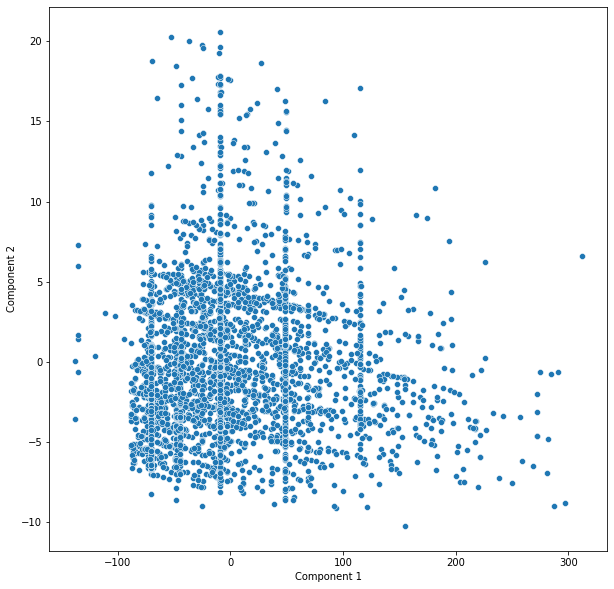

In [180]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Component 1', y='Component 2', data=x)
plt.show()

## Clustering Model: K-Means Clustering

### Mencari Nilai K Terbaik
Dalam mencari berapa banyak cluster optimal untuk data ini, saya menggunakan Silhouette method.

In [181]:
score=[]
k_num=range(3,30)
best=0

for i in k_num:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    labels=kmeans.labels_
    sil_score=silhouette_score(x,labels,metric='euclidean')
    score.append(sil_score)
    
    if best<sil_score:
        best=sil_score
        best_k=i

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


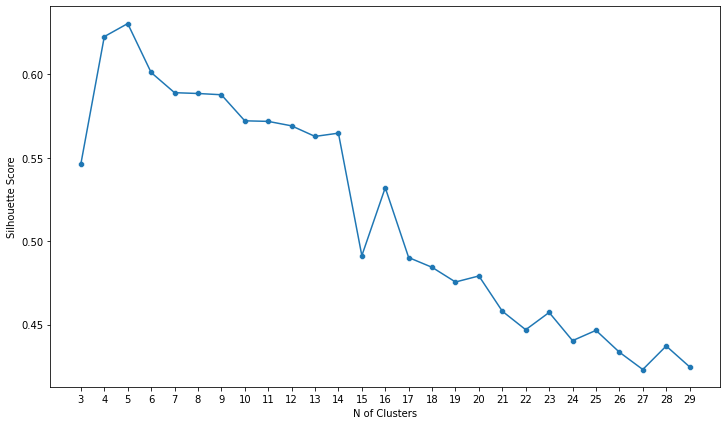

In [182]:
plt.figure(figsize=(12,7))
sns.lineplot(k_num, score)
sns.scatterplot(k_num, score)
plt.xticks(k_num)
plt.xlabel('N of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [183]:
print('Jumlah cluster optimum adalah',best_k,'dengan silhouette', best)

Jumlah cluster optimum adalah 5 dengan silhouette 0.6304742409192367


### Final Clustering

In [184]:
kmeans=KMeans(n_clusters=best_k)
kmeans.fit(x)

KMeans(n_clusters=5)

In [185]:
x['cluster']=kmeans.labels_

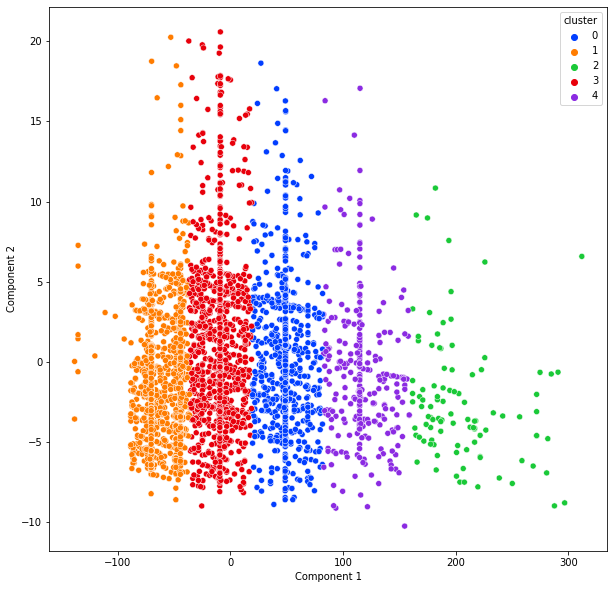

In [186]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Component 1', y='Component 2', data=x, hue='cluster', palette='bright')
plt.show()

Hasil clustering dengan K-Means menghasilkan lima buah kluster dengan silhouette score sebesar 0.6304

In [187]:
df['Cluster']=kmeans.labels_

In [188]:
df['Cluster']=df['Cluster'].apply(lambda x: 'Cluster 1' if x==0 else 'Cluster 2' if x ==1 else 'Cluster 3' if x ==2 else
                              'Cluster 4' if x ==3 else 'Cluster 5')

# Feature Engineering Tambahan
Feature Engineering disini diharapkan dapat membantu dalam proses analisa data

## Penambahan Kolom: RangePrice
RangePrice berisikan harga property (Price) yang dijadikan kategori dengan metode binning.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


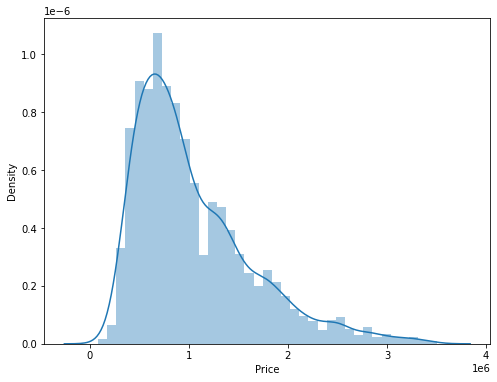

In [189]:
plt.figure(figsize=(8,6))
sns.distplot(df['Price'], kde=True)
plt.show()

Karena rentang data Price cukup lebar dan juga data tidak terdistribusi secara normal, maka kita akan gunakan metode binning equal frequency.

In [190]:
df['RangePrice']=pd.qcut(df['Price'],7,labels=['85.000-500.000','500.000-650.000','650.000-800.000','800.000-1.000.000',
                                               '1.000.000-1.275.000','1.275.000-1.700.000','1.700.000-3.500.000']) 

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


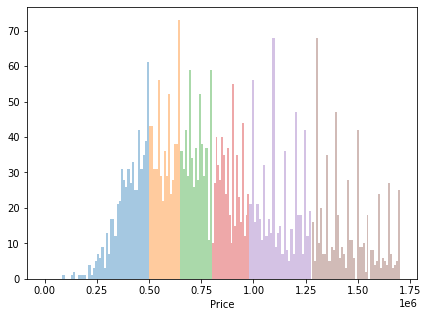

In [191]:
plt.figure(figsize=(7,5))
for i,j in zip(['85.000-500.000','500.000-650.000','650.000-800.000','800.000-1.000.000','1.000.000-1.275.000',
                '1.275.000-1.700.000','>1.700.000-3.500.000'],[40,15,15,20,27,45,170]):
    sns.distplot(df[df['RangePrice']== i]['Price'],bins=j, kde=False)

## Penambahan Kolom: CategorizedRooms

In [192]:
df['Rooms'].min()

2.0

In [193]:
df['Rooms'].max()

10.0

Kategori untuk Rooms:
* Standard (1-3)
* Medium (4-6)
* Large (7-9)
* Extra Large (>9)

In [194]:
df['CategorizedRooms']=df['Rooms'].apply(lambda x: 'Standard' if x in np.arange(1,4) else 
                                             'Medium' if x in np.arange(4,7) else 
                                             'Large' if x in np.arange(7,10) else 
                                             'Extra Large')

## Penambahan Kolom: CategorizedLandsize
RangeLandsize berisikan harga nilai Landsize yang dijadikan kategori dengan metode binning.

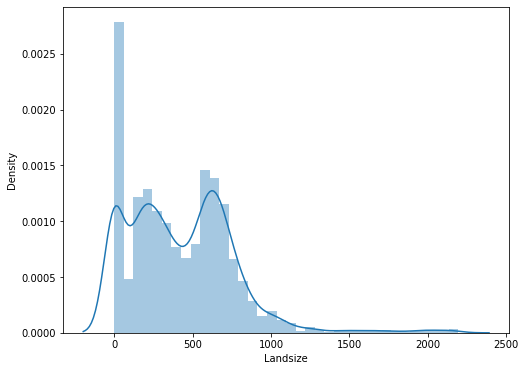

In [195]:
plt.figure(figsize=(8,6))
sns.distplot(df['Landsize'], kde=True)
plt.show()

Karena rentang data Landsize cukup lebar dan juga data tidak terdistribusi secara normal, maka kita akan gunakan metode binning equal frequency.

Kategori untuk Landsize:
* Small (0-120)
* Medium (120-290)
* High Medium (290-535)
* Large (535-680)
* Extra Large (680-2200)

In [196]:
df['CategorizedLandsize']=pd.qcut(df['Landsize'],5,labels=['Small','Medium','High Medium','Large','Extra Large']) 

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


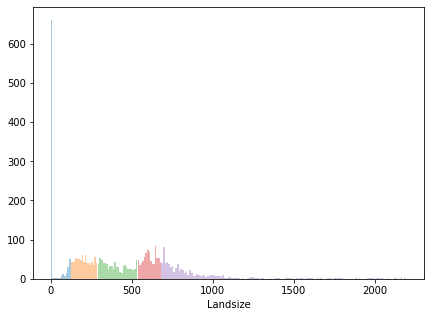

In [197]:
plt.figure(figsize=(7,5))
for i,j in zip(['Small','Medium','High Medium','Large','Extra Large'],[12,17,24,15,140]):
    sns.distplot(df[df['CategorizedLandsize']== i]['Landsize'],bins=j, kde=False)

## Penambahan Kolom: CategorizedBuildingArea
RangeBuildingArea berisikan harga nilai BuildingArea yang dijadikan kategori dengan metode binning.

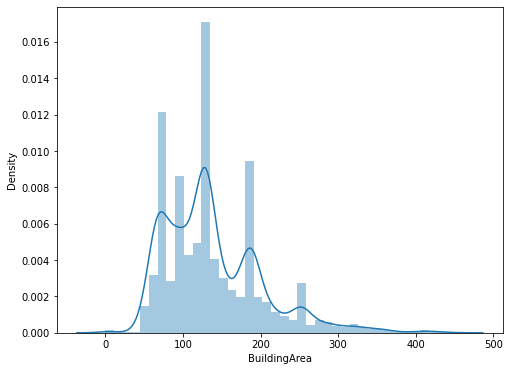

In [198]:
plt.figure(figsize=(8,6))
sns.distplot(df['BuildingArea'], kde=True)
plt.show()

Karena rentang data BuildingArea cukup lebar dan juga data tidak terdistribusi secara normal, maka kita akan gunakan metode binning equal frequency.

Kategori untuk BuildingArea:
* Small (0-80)
* Medium (80-120)
* High Medium (120-130)
* Large (130-190)
* Extra Large (190-450)

In [199]:
df['CategorizedBuildingArea']=pd.qcut(df['BuildingArea'],5,labels=['Small','Medium','High Medium','Large','Extra Large']) 

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


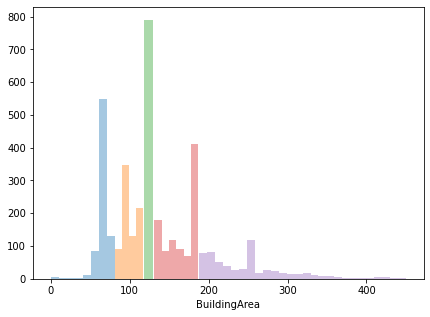

In [200]:
plt.figure(figsize=(7,5))
for i,j in zip(['Small','Medium','High Medium','Large','Extra Large'],[8,4,1,6,26]):
    sns.distplot(df[df['CategorizedBuildingArea']== i]['BuildingArea'],bins=j, kde=False)

## Penambahan Kolom: CityDistance

In [201]:
df['CityDistance']=pd.cut(df['Distance'],10,labels=['0-3','3.1-6','6.1-9','9.1-12','12.1-15','15.1-18','18.1-21','21.1-24',
                                                    '24.1-27','27.1-30']) 

In [202]:
df

Suburb             Address  Rooms Type      Price Method  \
0       Abbotsford        5 Charles St    3.0    h  1465000.0     SP   
1       Abbotsford         55a Park St    4.0    h  1600000.0     VB   
2       Abbotsford  411/8 Grosvenor St    4.0    u   700000.0     VB   
3       Abbotsford     40 Nicholson St    3.0    h  1350000.0     VB   
4       Abbotsford  7/20 Abbotsford St    2.0    u   441000.0     SP   
...            ...                 ...    ...  ...        ...    ...   
3924      Viewbank       149 Graham Rd    5.0    h  1316000.0     SP   
3925      Watsonia       76 Kenmare St    2.0    h   650000.0     PI   
3926  Williamstown       77 Merrett Dr    3.0    h  1031000.0     SP   
3927  Williamstown        96 Verdon St    4.0    h  2500000.0     PI   
3928    Yarraville          6 Agnes St    4.0    h  1285000.0     SP   

       SellerG       Date  Distance Postcode  Bathroom  Car  Landsize  \
0       Biggin 2017-04-03       2.5   3067.0       2.0  0.0     134.0   
1       Nelson 2016-04-06       2.5   3067.0       1.0  2.0     120.0   
2       Jellis 2016-12-11       2.5   3067.0       2.0  1.0       0.0   
3       Nelson 2016-12-11       2.5   3067.0       2.0  2.0     214.0   
4         Greg 2016-05-14       2.5   3067.0       1.0  1.0       0.0   
...        ...        ...       ...      ...       ...  ...       ...   
3924    Nelson 2017-08-26       8.9   3084.0       3.0  3.0     696.0   
3925  Morrison 2017-08-26      14.5   3087.0       1.0  1.0     210.0   
3926  Williams 2017-08-26       6.8   3016.0       2.0  2.0     333.0   
3927   Sweeney 2017-08-26       6.8   3016.0       1.0  5.0     866.0   
3928   Village 2017-08-26       6.3   3013.0       1.0  1.0     362.0   

      BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0          150.000     1900.0       Yarra  -37.80930   144.99440   
1          142.000     2014.0       Yarra  -37.80720   144.99410   
2           90.000        NaN       Yarra  -37.81100   145.00670   
3          190.000     2005.0       Yarra  -37.80850   144.99640   
4           68.055        NaN       Yarra  -37.80160   144.99880   
...            ...        ...         ...        ...         ...   
3924       253.000        NaN         NaN  -37.73501   145.08341   
3925        79.000     2006.0         NaN  -37.70657   145.07878   
3926       133.000     1995.0         NaN  -37.85927   144.87904   
3927       157.000     1920.0         NaN  -37.85908   144.89299   
3928       112.000     1920.0         NaN  -37.81188   144.88449   

                 Regionname  Propertycount SimplifiedMethod  \
0     Northern Metropolitan         4019.0        Available   
1     Northern Metropolitan         4019.0        Available   
2     Northern Metropolitan         4019.0        Available   
3     Northern Metropolitan         4019.0        Available   
4     Northern Metropolitan         4019.0        Available   
...                     ...            ...              ...   
3924   Eastern Metropolitan         2698.0        Available   
3925  Northern Metropolitan         2329.0        Available   
3926   Western Metropolitan         6380.0        Available   
3927   Western Metropolitan         6380.0        Available   
3928   Western Metropolitan         6543.0        Available   

     PropertySalesMonth PropertySalesYear  Season StreetType    Cluster  \
0                     4              2017    Fall     Street  Cluster 4   
1                     4              2016    Fall     Street  Cluster 4   
2                    12              2016  Summer     Street  Cluster 2   
3                    12              2016  Summer     Street  Cluster 1   
4                     5              2016    Fall     Street  Cluster 2   
...                 ...               ...     ...        ...        ...   
3924                  8              2017  Winter       Road  Cluster 5   
3925                  8              2017  Winter     Street  Cluster 2   
3926                 

In [203]:
df.to_excel('Clustering Melbourne.xlsx',index=False)

# Analisis Data dan Analisis Hasil Clustering

## Analisa Karakteristik Setiap Cluster

In [204]:
#Kolom yang dipakai untuk analisa data
df.drop(columns=['Address','Method','SellerG','Date','Postcode','YearBuilt','CouncilArea','Lattitude','Longtitude',
                 'Propertycount','SimplifiedMethod','PropertySalesYear'], axis=1, inplace=True)

In [205]:
df

Suburb  Rooms Type      Price  Distance  Bathroom  Car  Landsize  \
0       Abbotsford    3.0    h  1465000.0       2.5       2.0  0.0     134.0   
1       Abbotsford    4.0    h  1600000.0       2.5       1.0  2.0     120.0   
2       Abbotsford    4.0    u   700000.0       2.5       2.0  1.0       0.0   
3       Abbotsford    3.0    h  1350000.0       2.5       2.0  2.0     214.0   
4       Abbotsford    2.0    u   441000.0       2.5       1.0  1.0       0.0   
...            ...    ...  ...        ...       ...       ...  ...       ...   
3924      Viewbank    5.0    h  1316000.0       8.9       3.0  3.0     696.0   
3925      Watsonia    2.0    h   650000.0      14.5       1.0  1.0     210.0   
3926  Williamstown    3.0    h  1031000.0       6.8       2.0  2.0     333.0   
3927  Williamstown    4.0    h  2500000.0       6.8       1.0  5.0     866.0   
3928    Yarraville    4.0    h  1285000.0       6.3       1.0  1.0     362.0   

      BuildingArea             Regionname PropertySalesMonth  Season  \
0          150.000  Northern Metropolitan                  4    Fall   
1          142.000  Northern Metropolitan                  4    Fall   
2           90.000  Northern Metropolitan                 12  Summer   
3          190.000  Northern Metropolitan                 12  Summer   
4           68.055  Northern Metropolitan                  5    Fall   
...            ...                    ...                ...     ...   
3924       253.000   Eastern Metropolitan                  8  Winter   
3925        79.000  Northern Metropolitan                  8  Winter   
3926       133.000   Western Metropolitan                  8  Winter   
3927       157.000   Western Metropolitan                  8  Winter   
3928       112.000   Western Metropolitan                  8  Winter   

     StreetType    Cluster           RangePrice CategorizedRooms  \
0        Street  Cluster 4  1.275.000-1.700.000         Standard   
1        Street  Cluster 4  1.275.000-1.700.000           Medium   
2        Street  Cluster 2      650.000-800.000           Medium   
3        Street  Cluster 1  1.275.000-1.700.000         Standard   
4        Street  Cluster 2       85.000-500.000         Standard   
...         ...        ...                  ...              ...   
3924       Road  Cluster 5  1.275.000-1.700.000           Medium   
3925     Street  Cluster 2      500.000-650.000         Standard   
3926      Drive  Cluster 4  1.000.000-1.275.000         Standard   
3927     Street  Cluster 4  1.700.000-3.500.000           Medium   
3928     Street  Cluster 4  1.275.000-1.700.000           Medium   

     CategorizedLandsize CategorizedBuildingArea CityDistance  
0                 Medium                   Large          0-3  
1                  Small                   Large          0-3  
2                  Small                  Medium          0-3  
3                 Medium             Extra Large          0-3  
4                  Small                   Small          0-3  
...                  ...                     ...          ...  
3924         Extra Large             Extra Large        6.1-9  
3925              Medium                   Small      12.1-15  
3926         High Medium                   Large        6.1-9  
3927         Extra Large                   Large        6.1-9  
3928         High Medium                  Medium        6.1-9  

[3929 rows x 19 columns]

### Analisa Umum

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


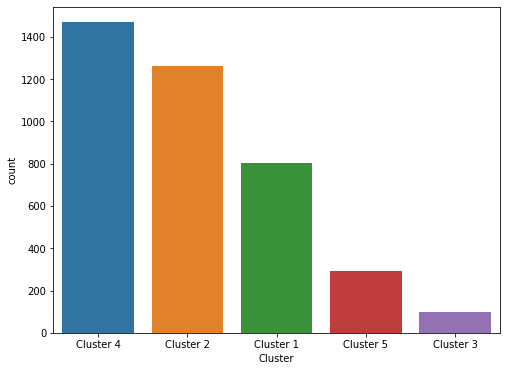

In [206]:
plt.figure(figsize=(8,6))
sns.countplot(df['Cluster'])
plt.show()

Berdasarkan pada countplot diatas, dapat dilihat bahwa Cluster 4 adalah cluster yang paling banyak dijual di Kota Melbourne, diikuti dengan Cluster 2, lalu Cluster 1, sementara itu Cluster 5 dan Cluster 3 sangat sedikit jumlahnya.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


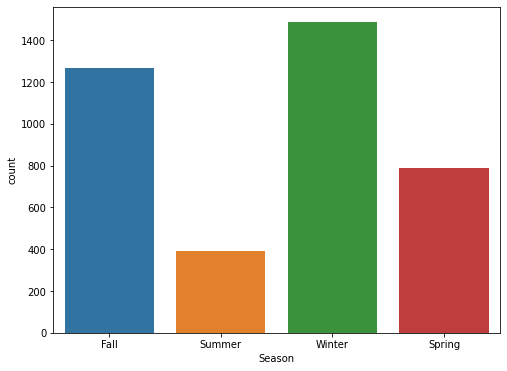

In [285]:
plt.figure(figsize=(8,6))
sns.countplot(df['Season'])
plt.show()

Berdasarkan pada countplot diatas, dapat dilihat bahwa Winter adalah dimana banyak terjadi transaksi jual beli property, diikuti dengan musim Fall, lalu Spring, dan terakhir Summer.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


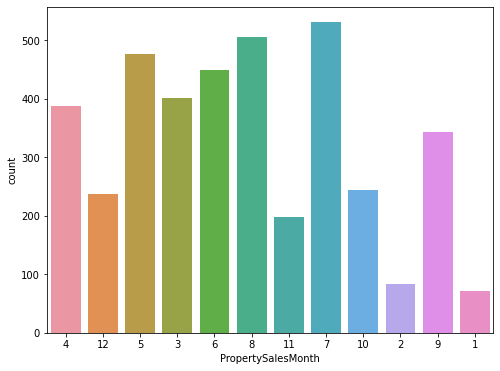

In [286]:
plt.figure(figsize=(8,6))
sns.countplot(df['PropertySalesMonth'])
plt.show()

Dapat dilihat pada countplot diatas, bahwa pada rentang bulan Maret hingga September merupakan bulan-bulan dimana banyak terjadi transaksi jual-beli property dan mencapai puncaknya pada bulan July-Agustus.

In [207]:
df.groupby('Cluster').describe(include=[object,'category'])

Suburb                              Type                   \
           count unique             top freq count unique top  freq   
Cluster                                                               
Cluster 1    803    188    Balwyn North   29   803      3   h   745   
Cluster 2   1264    165        St Kilda   50  1264      3   u   885   
Cluster 3    100     43          Balwyn    9   100      2   h    98   
Cluster 4   1469    235  Bentleigh East   45  1469      3   h  1166   
Cluster 5    293    121   Brighton East   16   293      3   h   267   

          Regionname                                    PropertySalesMonth  \
               count unique                    top freq              count   
Cluster                                                                      
Cluster 1        803      7  Southern Metropolitan  307                803   
Cluster 2       1264      6  Southern Metropolitan  526               1264   
Cluster 3        100      5  Southern Metropolitan   61                100   
Cluster 4       1469      7  Southern Metropolitan  424               1469   
Cluster 5        293      7  Southern Metropolitan  139                293   

                          Season                     StreetType         \
          unique top freq  count unique     top freq      count unique   
Cluster                                                                  
Cluster 1     12   8  104    803      4  Winter  301        803     20   
Cluster 2     12   7  175   1264      4  Winter  477       1264     20   
Cluster 3     12   6   18    100      4  Winter   34        100     11   
Cluster 4     12   7  215   1469      4  Winter  566       1469     27   
Cluster 5     12   5   38    293      4  Winter  108        293     18   

                       RangePrice                                   \
              top freq      count unique                  top freq   
Cluster                                                              
Cluster 1  Street  445        803      7  1.275.000-1.700.000  221   
Cluster 2  Street  798       1264      7       85.000-500.000  516   
Cluster 3  Street   51        100      6  1.700.000-3.500.000   72   
Cluster 4  Street  871       1469      7  1.000.000-1.275.000  286   
Cluster 5  Street  152        293      6  1.700.000-3.500.000  146   

          CategorizedRooms                        CategorizedLandsize         \
                     count unique       top  freq               count unique   
Cluster                                                                        
Cluster 1              803      3    Medium   649                 803      5   
Cluster 2             1264      3  Standard  1132                1264      5   
Cluster 3              100      4    Medium    78                 100      3   
Cluster 4             1469      4  Standard  1295                1469      5   
Cluster 5              293      3    Medium   251                 293      5   

                            CategorizedBuildingArea                           \
                   top freq                   count unique          top freq   
Cluster                                                                        
Cluster 1        Large  254                     803      2        Large  584   
Cluster 2        Small  670                    1264      2        Small  786   
Cluster 3        Large   41                     100      1  Extra Large  100   
Cluster 4  High Medium  395                    1469      3  High Medium  790   
Cluster 5  Extra Large  115                     293      1  Extra Large  293   

          CityDistance                      
                 count unique     top freq  
Cluster                                     
Cluster 1          803     10  9.1-12  228  
Cluster 2         1264     10   6.1-9  385  
Cluster 3          100      7  9.1-12   40  
Cluster 4         1469     10  9.1-12  338  
Cluster 5          293     10  9.1-12  102

In [208]:
df.groupby('Cluster').describe()

Rooms                                                 Price  \
            count      mean       std  min  25%  50%  75%   max   count   
Cluster                                                                   
Cluster 1   803.0  3.997509  0.762261  2.0  4.0  4.0  4.0  10.0   803.0   
Cluster 2  1264.0  2.289557  0.663505  2.0  2.0  2.0  2.0   8.0  1264.0   
Cluster 3   100.0  4.970000  1.666394  2.0  4.0  5.0  5.0  10.0   100.0   
Cluster 4  1469.0  3.091219  0.525752  2.0  3.0  3.0  3.0  10.0  1469.0   
Cluster 5   293.0  4.518771  0.949309  2.0  4.0  5.0  5.0   8.0   293.0   

                                                                        \
                   mean            std       min        25%        50%   
Cluster                                                                  
Cluster 1  1.371842e+06  568506.239592  145000.0   930500.0  1300000.0   
Cluster 2  6.285105e+05  301021.573462   85000.0   430000.0   550000.0   
Cluster 3  2.118381e+06  688651.994724  650000.0  1637500.0  2225000.0   
Cluster 4  1.021287e+06  431930.523255  131000.0   706000.0   905000.0   
Cluster 5  1.711329e+06  680688.378966  520000.0  1125000.0  1700000.0   

                                Distance                                       \
                 75%        max    count       mean       std  min  25%   50%   
Cluster                                                                         
Cluster 1  1700000.0  3420000.0    803.0  10.507597  4.516037  1.3  7.5   9.9   
Cluster 2   735375.0  3000000.0   1264.0   7.270411  3.890486  0.0  4.5   6.5   
Cluster 3  2562500.0  3500000.0    100.0  10.658000  3.781379  5.6  7.9   9.7   
Cluster 4  1260000.0  3280000.0   1469.0  10.336283  5.020728  0.0  6.5   9.9   
Cluster 5  2125000.0  3400000.0    293.0  10.874403  4.259726  2.1  8.0  10.7   

                      Bathroom                                               \
            75%   max    count      mean       std  min  25%  50%  75%  max   
Cluster                                                                       
Cluster 1  13.5  28.5    803.0  2.042341  0.614213  0.0  2.0  2.0  2.0  5.0   
Cluster 2   9.4  28.8   1264.0  1.117880  0.355297  0.0  1.0  1.0  1.0  3.0   
Cluster 3  12.4  23.5    100.0  2.860000  0.816744  1.0  2.0  3.0  3.0  5.0   
Cluster 4  13.4  29.8   1469.0  1.462900  0.553185  0.0  1.0  1.0  2.0  5.0   
Cluster 5  13.0  28.5    293.0  2.447099  0.636853  1.0  2.0  2.0  3.0  4.0   

              Car                                              Landsize  \
            count      mean       std  min  25%  50%  75%  max    count   
Cluster                                                                   
Cluster 1   803.0  2.012453  0.891827  0.0  2.0  2.0  2.0  5.0    803.0   
Cluster 2  1264.0  1.102057  0.630345  0.0  1.0  1.0  1.0  4.0   1264.0   
Cluster 3   100.0  2.160000  0.813025  0.0  2.0  2.0  2.0  5.0    100.0   
Cluster 4  1469.0  1.645337  0.857814  0.0  1.0  2.0  2.0  5.0   1469.0   
Cluster 5   293.0  2.191126  0.897670  0.0  2.0  2.0  2.0  5.0    293.0   

                                                                         \
                 mean         std    min     25%    50%     75%     max   
Cluster                                                                   
Cluster 1  559.616438  249.349683    0.0  372.50  584.0  696.50  2027.0   
Cluster 2  260.921677  424.059396    0.0    0.00  102.0  323.25  2193.0   
Cluster 3  675.930000  187.514000  289.0  576.25  656.0  738.00  1250.0   
Cluster 4  440.948264  263.818842    0.0  234.00  405.0  617.00  2135.0   
Cluster 5  631.423208  223.236940    0.0  488.00  646.0  751.00  1590.0   

          BuildingArea                                                   \
                 count        mean        std       min      25%    50%   
Cluster                                                                   
Cluster 1        803.0  186.378918  13.896715  157.9351  180.000  187.0   
Cluster 2       1264.0   76.242991

Rangkuman karakteristik setiap Cluster berdasarkan statistika deskriptif *(Note: karakteristik ini merupakan hasil generalisasi dari kluster dan tidak mencerminkan karakteristik dari setiap individu property)*:

**1. Cluster 1**
1. Tipe property: **Top Type Property adalah h (house, cottage, villa)**
2. Harga: **range 145.000-3.420.000**, **median 1.300.000**, mayoritas kategori Price adalah **1.275.000-1.700.000**.
3. Jumlah Ruangan: **median total ruangan (Rooms) 4**, **median kamar mandi (Bathroom) 2**, mayoritas kategori Rooms adalah **Medium Rooms**.
4. Kapasitas Carport dalam menampung mobil: **range 0-5**, **median 2**.
5. Jarak dengan CBD: **range 1.3-28.5**, **mean 10.5**, mayoritas kategori Distance adalah **9.1-12**.
6. Luas Tanah: **range 0-2027**, **median 584**, **mean 560**, mayoritas kategori Landsize adalah **Large**.
7. Luas Bangunan: **range 158-220**, **median 187**, **mean 186.3**, mayoritas kategori BuildingArea adalah **Large**.
8. Lokasi: **Top Suburb adalah Balwyn North**, **Top Region adalah Southern Metropolitan**, **Top StreetType adalah Street**.
9. Waktu Penjualan: **Top SalesMonth adalah August**, **Top Season adalah Winter**

**2. Cluster 2**
1. Tipe property: **Top Type Property adalah u (unit, duplex, apartment)**
2. Harga: **range 85.000-3.000.000**, **median 550.000**, mayoritas kategori Price adalah **85.000-500.000**.
3. Jumlah Ruangan: **median total ruangan (Rooms) 2**, **median kamar mandi (Bathroom) 1**, mayoritas kategori Rooms adalah **Standard Rooms**.
4. Kapasitas Carport dalam menampung mobil: **range 0-4**, **median 1**.
5. Jarak dengan CBD: **range 0-28.8**, **mean 7.2**, mayoritas kategori Distance adalah **6.1-9**.
6. Luas Tanah: **range 0-2193**, **median 102**, **mean 260**, mayoritas kategori Landsize adalah **Small**.
7. Luas Bangunan: **range 0-102**, **median 70**, **mean 76**, mayoritas kategori BuildingArea adalah **Small**.
8. Lokasi: **Top Suburb adalah St. Kilda**, **Top Region adalah Southern Metropolitan**, **Top StreetType adalah Street**.
9. Waktu Penjualan: **Top SalesMonth adalah July**, **Top Season adalah Winter**

**3. Cluster 3**
1. Tipe property: **Top Type Property adalah h (house, cottage, villa)**
2. Harga: **range 650.000-3.500.000**, **median 2.225.000**, mayoritas kategori Price adalah **1.700.000-3.500.000**.
3. Jumlah Ruangan: **median total ruangan (Rooms) 5**, **median kamar mandi (Bathroom) 3**, mayoritas kategori Rooms adalah **Medium Rooms**.
4. Kapasitas Carport dalam menampung mobil: **range 0-5**, **median 2**.
5. Jarak dengan CBD: **range 5.6-23.5**, **mean 10.65**, mayoritas kategori Distance adalah **9.1-12**.
6. Luas Tanah: **range 289-1250**, **median 656**, **mean 675**, mayoritas kategori Landsize adalah **Large**.
7. Luas Bangunan: **range 300-450**, **median 334**, **mean 344**, mayoritas kategori BuildingArea adalah **Extra Large**.
8. Lokasi: **Top Suburb adalah Balwyn**, **Top Region adalah Southern Metropolitan**, **Top StreetType adalah Street**.
9. Waktu Penjualan: **Top SalesMonth adalah June**, **Top Season adalah Winter**

**4. Cluster 4**
1. Tipe property: **Top Type Property adalah h (house, cottage, villa)**
2. Harga: **range 131.000-3.280.000**, **median 905.000**, mayoritas kategori Price adalah **1.000.000-1.275.000**.
3. Jumlah Ruangan: **median total ruangan (Rooms) 3**, **median kamar mandi (Bathroom) 1**, mayoritas kategori Rooms adalah **Standard Rooms**.
4. Kapasitas Carport dalam menampung mobil: **range 0-5**, **median 2**.
5. Jarak dengan CBD: **range 0-29.8**, **mean 10.3**, mayoritas kategori Distance adalah **9.1-12**.
6. Luas Tanah: **range 0-2135**, **median 405**, **mean 264**, mayoritas kategori Landsize adalah **High Medium**.
7. Luas Bangunan: **range 101-157**, **median 129**, **mean 127**, mayoritas kategori BuildingArea adalah **High Medium**.
8. Lokasi: **Top Suburb adalah Bentleigh East**, **Top Region adalah Southern Metropolitan**, **Top StreetType adalah Street**.
9. Waktu Penjualan: **Top SalesMonth adalah July**, **Top Season adalah Winter**

**5. Cluster 5**
1. Tipe property: **Top Type Property adalah h (house, cottage, villa)**
2. Harga: **range 520.000-3.400.000**, **median 1.700.000**, mayoritas kategori Price adalah **1.700.000-3.500.000**.
3. Jumlah Ruangan: **median total ruangan (Rooms) 5**, **median kamar mandi (Bathroom) 2**, mayoritas kategori Rooms adalah **Medium Rooms**.
4. Kapasitas Carport dalam menampung mobil: **range 0-5**, **median 2**.
5. Jarak dengan CBD: **range 2.1-28.5**, **mean 10.8**, mayoritas kategori Distance adalah **9.1-12**.
6. Luas Tanah: **range 0-1590**, **median 646**, **mean 631**, mayoritas kategori Landsize adalah **Extra Large**.
7. Luas Bangunan: **range 221-297**, **median 253**, **mean 254**, mayoritas kategori BuildingArea adalah **Extra Large**.
8. Lokasi: **Top Suburb adalah Brighton East**, **Top Region adalah Southern Metropolitan**, **Top StreetType adalah Street**.
9. Waktu Penjualan: **Top SalesMonth adalah May**, **Top Season adalah Winter**

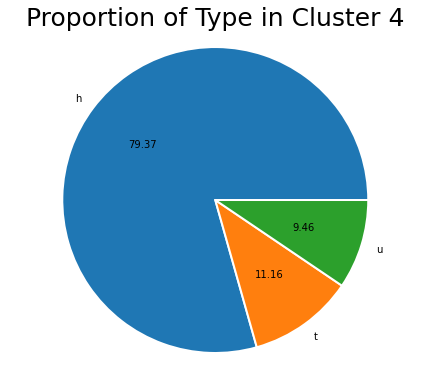

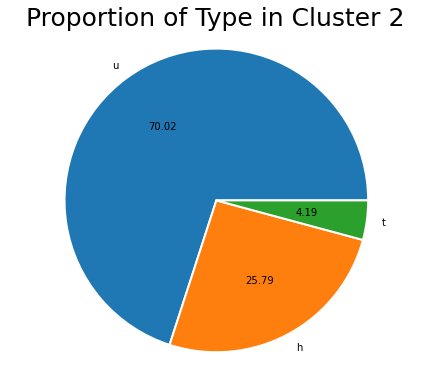

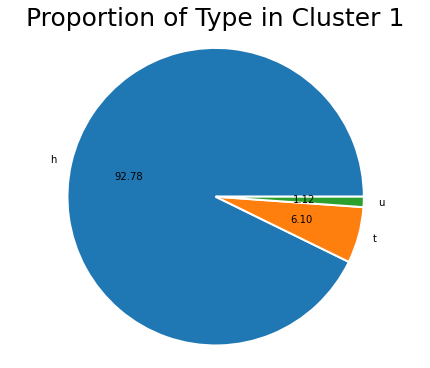

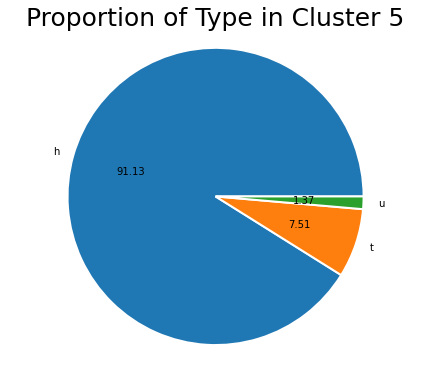

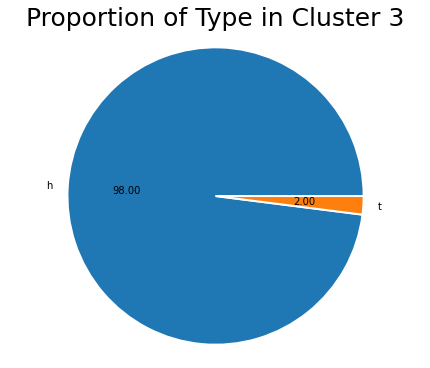

In [234]:
for i,j in zip(df['Cluster'].unique(),[1,2,3,4,5]):
    plt.figure(figsize=(12,15))
    plt.subplot(3,2,j)
    plt.pie(
        df[df['Cluster']==i]['Type'].value_counts(),
        labels=df[df['Cluster']==i]['Type'].value_counts().index,
        wedgeprops={'edgecolor':'w','linewidth':2},
        autopct='%.2f')
    plt.axis('equal')
    plt.title(f'Proportion of Type in {i}', fontsize=25)
    plt.tight_layout()
    plt.show()

Berdasarkan hasil analisa dari deskriptif statistik d dan pie chart diatas, kita dapat beberapa gambaran awal mengenai karakteristik dari masing-masing kluster:
1. **Cluster 1** didominasi 92% oleh Type property h (house, cottage, villa), dengan median harga 1.300.000 dan mayoritas range harga sedang (1.275.000-1.700.000), median jumlah ruangan (Rooms) 4 buah dengan mayoritas pada kategori Medium, median kapasitas Car port 2 buah, Landsize dan Building Area mayoritas berada pada kategori Large, memiliki rata-rata jarak Distance dengan CBD (10,5km).


2. **Cluster 2** didominasi 70% oleh Type property u (unit, duplex, atau apartment), dengan median harga 550.000 dan mayoritas range harga yang paling murah (85.000-3.000.000), median jumlah ruangan (Rooms) 2 buah dengan mayoritas pada kategori Standard, median kapasitas Car port 1 buah, Landsize dan Building Area mayoritas berada pada kategori Small, akan tetapi memiliki rata-rata jarak Distance yang paling dekat dengan CBD (7,2km).


3. **Cluster 3** didominasi 98% oleh Type property h (house, cottage, villa), dengan median harga 2.225.000 dan mayoritas range harga paling mahal (1.700.000-3.500.000), median jumlah ruangan (Rooms) 5 buah dengan mayoritas pada kategori Medium, median kapasitas Car port 2 buah, Landsize mayoritas berada pada kategori Large, BuildingArea mayoritas berada pada kategoti Extra Large, memiliki rata-rata jarak Distance dengan CBD (10,65km).


4. **Cluster 4** didominasi 80% oleh Type property h (house, cottage, villa), dengan median harga 905.000 dan mayoritas range harga sedang (1.000.000-1.275.000), median jumlah ruangan (Rooms) 3 buah dengan mayoritas pada kategori Standard, median kapasitas Car port 2 buah, Landsize dan Building Area mayoritas berada pada kategori High Medium, memiliki rata-rata jarak Distance dengan CBD (10,3km).


5. **Cluster 5** didominasi 91% oleh Type property h (house, cottage, villa), dengan median harga 1.700.000 dan mayoritas range harga paling mahal (1.700.000-3.500.000), median jumlah ruangan (Rooms) 5 buah dengan mayoritas pada kategori Medium, median kapasitas Car port 2 buah, Landsize dan BuilingArea mayoritas berada pada kategori Extra Large, memiliki rata-rata jarak Distance dengan CBD (10,8km).

### Analisa Multivariate

#### Building Area

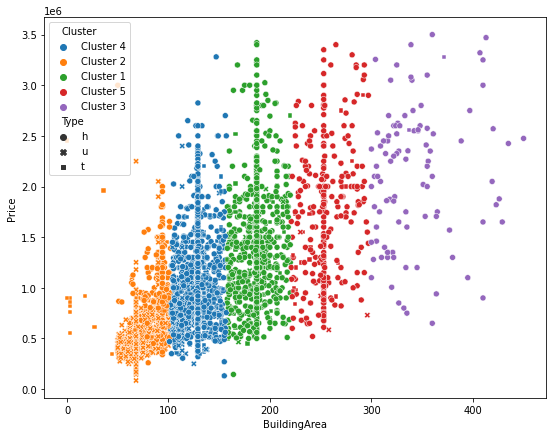

In [237]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df, x='BuildingArea', y='Price', hue='Cluster', style='Type')
plt.show()

Berdasarkan scatterplot diatas, kita dapat melihat dengan jelas pembagian cluster berdasarkan BuildingArea, dimulai dari yang paling kecil yakni Cluster 2 hingga yang paling besar yakni Cluster 3. Selain itu kita dapat melihat bagaimana Price dan BuildingArea sangat berkorelasi positif dan berbanding lurus satu dengan lainnya.

#### Landsize

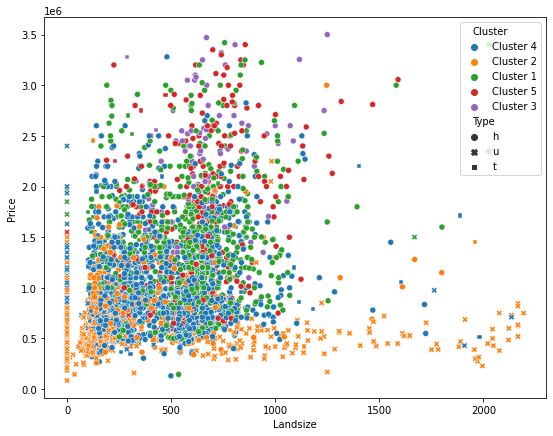

In [236]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df, x='Landsize', y='Price', hue='Cluster', style='Type')
plt.show()

Berdasarkan scatterplot diatas kita dapat melihat bahwa Cluster 2 di dominasi oleh property dengan Landsize yang relatif kecil dibandingkan Cluster lainnya, setelah itu diikuti oleh Cluster 4. Namun penyebaran Price-Landsize tidak begitu dapat dilihat pada cluster lainnya. Selain itu kita dapat melihat bagaimana Price dan Landsize cukup memiliki korelasi positif dan berbanding lurus satu dengan lainnya. Namun kita juga dapat melihat banyak contextual outliers, terutama pada Cluster 2 dengan Type u.

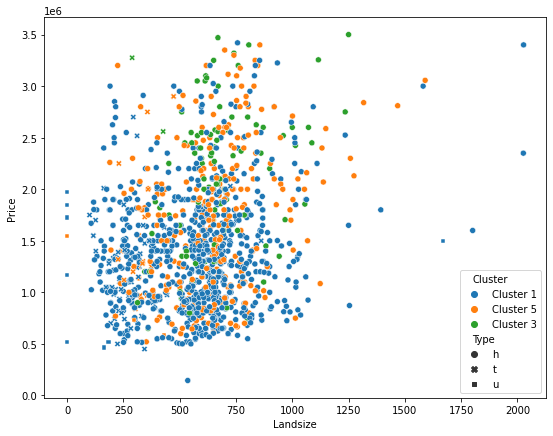

In [241]:
# Kita lihat persebaran data Price-Landsize hanya Cluster 1,3,5
plt.figure(figsize=(9,7))
sns.scatterplot(data=df[(df['Cluster']=='Cluster 1') | (df['Cluster']=='Cluster 3') | (df['Cluster']=='Cluster 5')], 
                x='Landsize', y='Price', hue='Cluster', style='Type')
plt.show()

Bisa kita lihat pada Cluster 1,3,5 data relatif tersebar merata pada range Landsize 250-1000, namun untuk harga pada Landsize yang sama, harga property pada Cluster 5 dan 3 lebih tinggi dibandingkan Cluster 1.

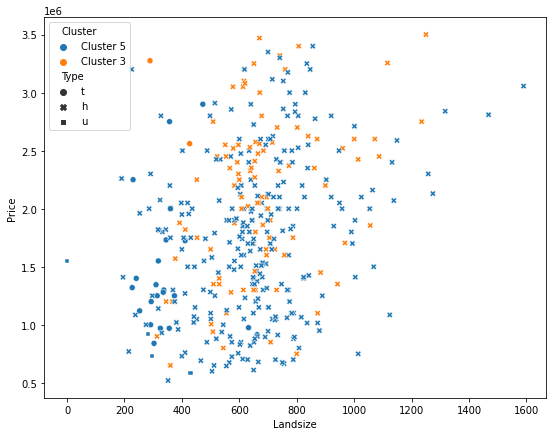

In [242]:
# Kita lihat persebaran data Price-Landsize hanya Cluster 3 dan 5
plt.figure(figsize=(9,7))
sns.scatterplot(data=df[(df['Cluster']=='Cluster 3') | (df['Cluster']=='Cluster 5')], 
                x='Landsize', y='Price', hue='Cluster', style='Type')
plt.show()

Bisa dilihat bahwa Cluster 3 dan 5 memiliki penyebaran Price-Landsize yang relatif sama dan tidak terlalu terlihat perbedaan.

#### Rooms

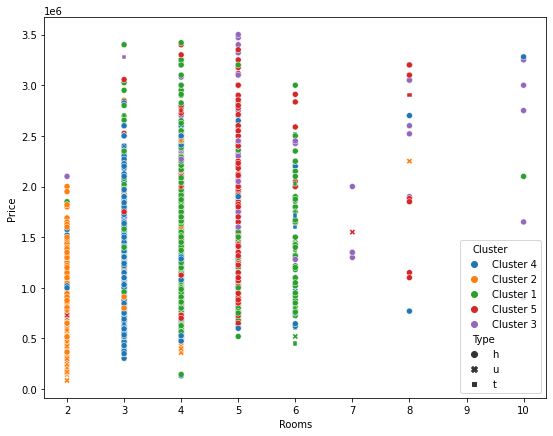

In [235]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df, x='Rooms', y='Price', hue='Cluster', style='Type')
plt.show()

Berdasarkan scatterplot diatas, bisa kita lihat bahwa Cluster 2 memiliki jumlah Rooms yang paling sedikit, diikuti oleh Cluster 4. Lalu Cluster 1 dan Cluster 5 relatif memiliki jumlah Rooms yang sama, dan Cluster 3 didominasi oleh property dengan jumlah Rooms yang paling banyak (>=6).

#### Car

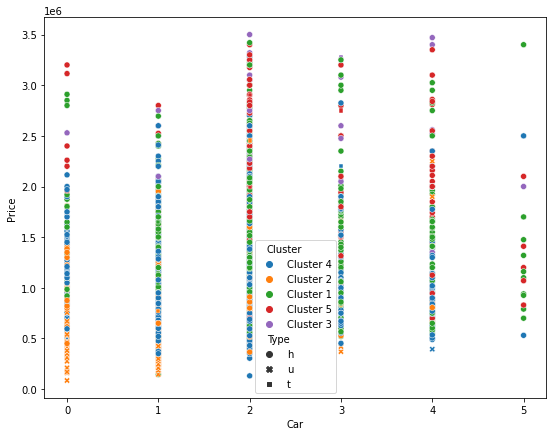

In [239]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df, x='Car', y='Price', hue='Cluster', style='Type')
plt.show()

Berdasarkan scatterplot diatas, bisa kita lihat bahwa Cluster 2 memiliki kapasitas Car port yang paling sedikit dengan harga yang murah, diikuti oleh Cluster 4. Lalu untuk Cluster 1,3,5 pada umumnya memiliki variasi kapasitas Car port yang beragam, akan tetapi dengan harga property yang jauh lebih mahal dibandingkan Cluster 2,4.

#### Distance

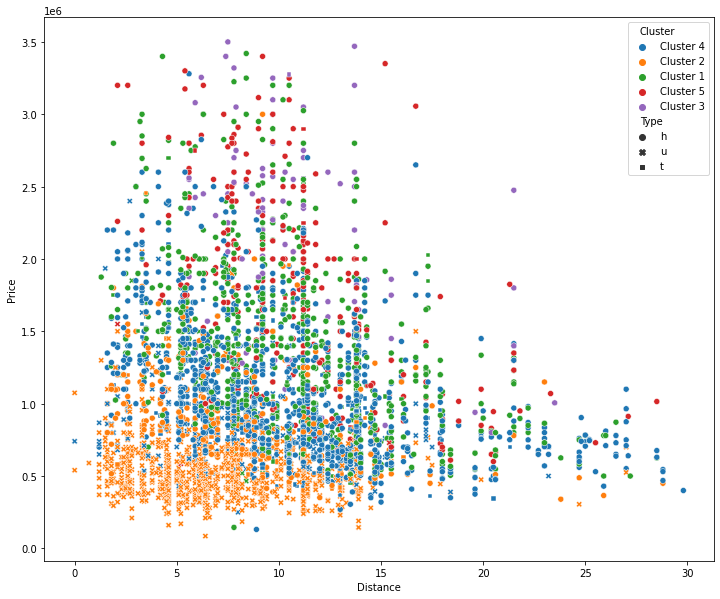

In [213]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x='Distance', y='Price', hue='Cluster', style='Type')
plt.show()

Berdasarkan scatterplot diatas kita dapat melihat bahwa Cluster 2 memiliki jarak yang paling dekat dengan CBD dibandingkan Cluster lainnya, setelah itu diikuti oleh Cluster 4. Namun penyebaran Price-Distance tidak begitu dapat dilihat pada cluster lainnya. Namun kita juga dapat melihat banyak contextual outliers, terutama pada Cluster 2 dan Cluster 4.

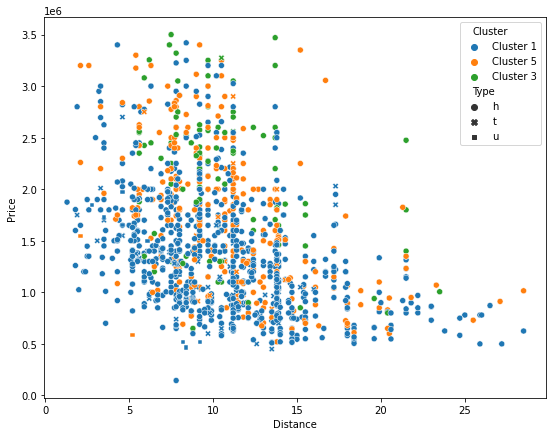

In [243]:
# Kita lihat persebaran data Price-Distance hanya Cluster 1,3,5
plt.figure(figsize=(9,7))
sns.scatterplot(data=df[(df['Cluster']=='Cluster 1') | (df['Cluster']=='Cluster 3') | (df['Cluster']=='Cluster 5')], 
                x='Distance', y='Price', hue='Cluster', style='Type')
plt.show()

Bisa kita lihat pada Cluster 1,3,5 data relatif tersebar merata pada range Distance 5-15, namun untuk harga pada Distance yang sama, harga property pada Cluster 5 dan 3 lebih tinggi dibandingkan Cluster 1.

#### Regionname

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


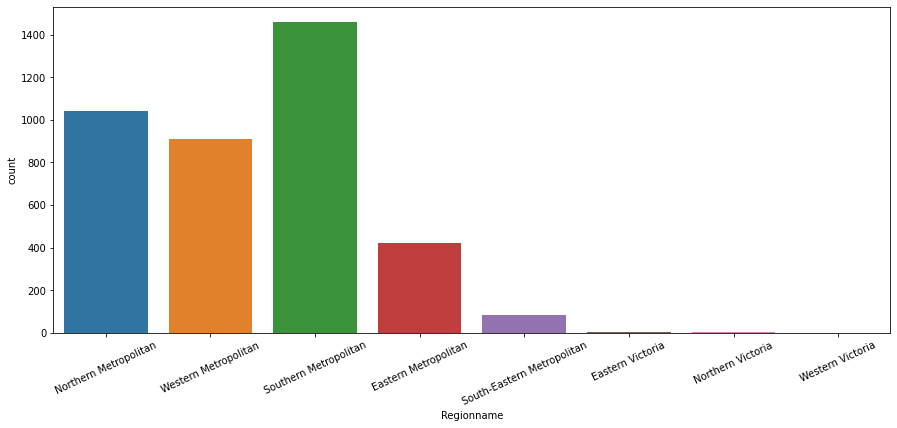

In [251]:
plt.figure(figsize=(15,6))
sns.countplot(df['Regionname'])
plt.xticks(rotation=25)
plt.show()

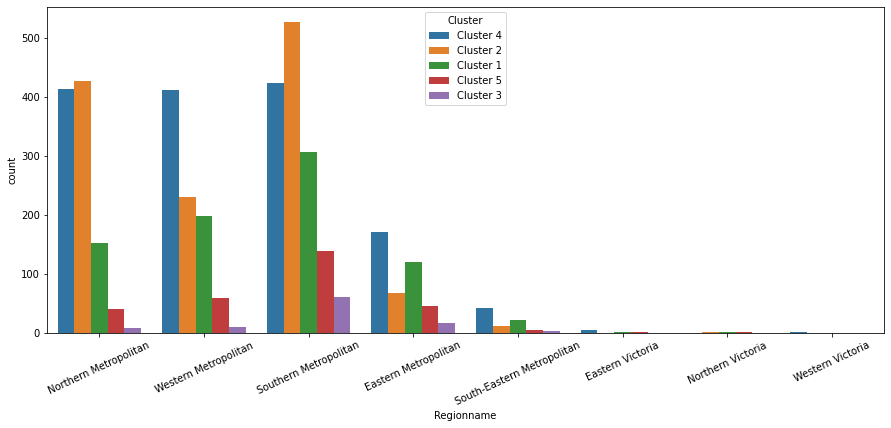

In [293]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Regionname',hue='Cluster')
plt.xticks(rotation=25)
plt.show()

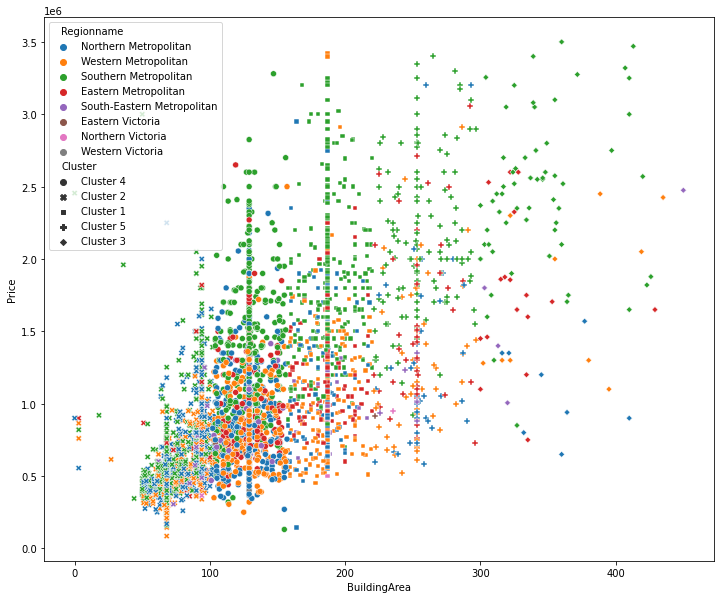

In [245]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x='BuildingArea', y='Price', hue='Regionname', style='Cluster')
plt.show()

Berdasarkan countplot dan scatterplot antara Price-BuildingArea dikelompokan berdasarkan Regionname, kita dapat melihat bahwa Region Southern Metropolitan merupakan region dengan jumlah Property terbanyak, diikuti oleh Northern Metropolitan dan Western Metropolitan. Harga property tertinggi mayoritas berada pada region Southern Metropolitan dan diikuti oleh Northern Metropolitan dan Western Metropolitan. 

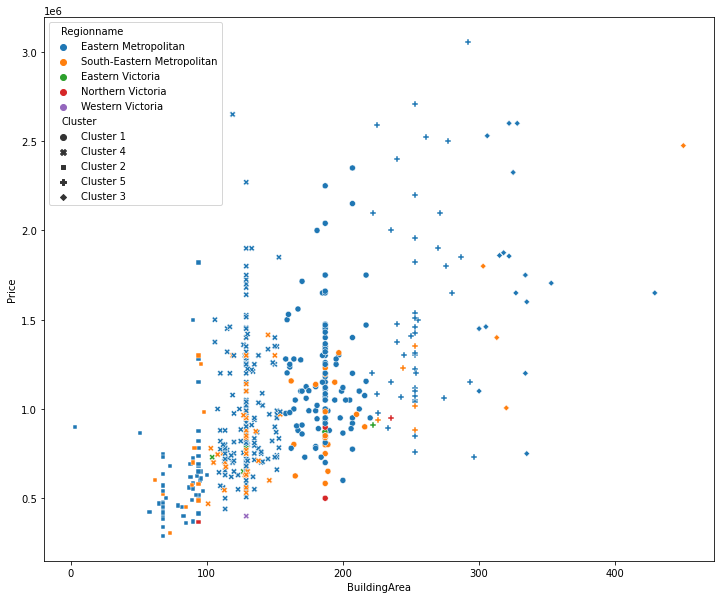

In [256]:
# Kita lihat persebaran data Price-BuildingArea selain Region Southern Metropolitan, Northern Metropolitan, dan
# Western Metropolitan
plt.figure(figsize=(12,10))
sns.scatterplot(data=df[(df['Regionname']!='Southern Metropolitan') & (df['Regionname']!='Northern Metropolitan') &
   (df['Regionname']!='Western Metropolitan')], x='BuildingArea', y='Price', hue='Regionname', style='Cluster')
plt.show()

Berdasarkan scatterplot diatas selain tiga region sebelumnya, Eastern Metropolitan merupakan region yang paling banyak menjual property (region terbanyak ke 4), diikuti oleh region South-Eastern Metropolitan (region terbanyak ke 5), lalu untuk semua region yang berada di Victoria tidak terlalu banyak menjual property.

### Kesimpulan Analisa Karakteristik Cluster

Berikut adalah kesimpulan untuk karakteristik setiap Cluster:
1. **Cluster 1**: Merupakan cluster yang di dominasi oleh property berupa perumahan dengan harga yang lumayan tinggi, mayoritas memiliki jumlah ruangan yang cukup banyak dengan luas bangunan yang cukup besar, luas tanah pada cluster ini juga mayoritas luas. Cluster ini cocok untuk para warga yang ingin memiliki property perumahan yang cukup luas dan cukup dekat dengan kota. Cluster ini cocok untuk para warga kota dengan kemampuan ekonomi menengah keatas.


2. **Cluster 2**: Merupakan cluster yang di dominasi oleh duplex atau apartment dengan harga murah, mayoritas memiliki jumlah ruangan yang sedikit dengan luas tanah dan bangunan yang kecil bahkan paling kecil diantara semua cluster yang ada, namun sangat dekat dengan CBD, sehingga Cluster ini cocok untuk para warga yang ingin memiliki property dekat dengan kota dan murah. Cluster ini cocok untuk para warga kota dengan kemampuan ekonomi menengah kebawah atau para pekerja kantoran yang ingin memiliki property yang dekat dengan kantornya. Namun perlu diingat bahwa pada Cluster ini terdapat beberapa contextual outlier mengakibatkan kesimpulan ini bisa saja tidak valid pada beberapa property, sehingga perlu di check satu per satu property yang ada.


3. **Cluster 3**: Merupakan cluster yang di dominasi oleh pemukiman warga dengan harga yang sangat mahal, kemungkinan mayoritas property pada kluster ini berupa mansion atau villa mewah. Mayoritas cluster ini memiliki jumlah ruangan yang banyak dengan luas tanah yang besar dan luas bangunan sangat besar. Kemungkinan cluster ini mayoritas merupakan bangunan bertingkat, karena memiliki luas bangunan paling besar diantara bangunan yang lain, namun tidak terbesar untuk luas tanahnya. Cluster ini cocok untuk para warga yang ingin memiliki property rumah yang sangat luas dan cukup dekat dengan kota. Cluster ini cocok untuk para warga kota dengan kemampuan ekonomi kelas atas hingga kaya raya.


4. **Cluster 4**: Merupakan cluster yang di dominasi oleh property berupa perumahan dengan harga yang sedang, mayoritas memiliki jumlah ruangan yang sedang dengan luas tanah dan bangunan yang tidak terlalu besar hingga sedang (Cluster dengan luas tanah dan bangunan paling kecil kedua diantara semua Cluster), sehingga Cluster ini cocok untuk para warga yang ingin memiliki property perumahan yang sedang-tidak terlalu besar, namun dekat dengan kota. Cluster ini cocok untuk para warga kota dengan kemampuan ekonomi menengah, hingga menengah kebawah.


5. **Cluster 5**: Merupakan cluster yang di dominasi oleh pemukiman warga dengan harga yang sangat mahal, kemungkinan mayoritas property pada kluster ini berupa villa atau cottage mewah. Mayoritas cluster ini memiliki jumlah ruangan yang banyak dengan luas tanah dan luas bangunan yang sangat besar. Secara luas tanah, cluster ini merupakan cluster dengan luas tanah terluas, tetapi tidak dengan luas bangunan, sehingga kemungkinan bangunan ini di dominasi oleh property dengan halaman yang luas. Mayoritas jarak pada cluster ini cukup jauh dengan pusat kota, sehingga Cluster ini cocok untuk para warga yang ingin memiliki property rumah yang sangat luas tetapi ingin jauh dari hiruk pikuk perkotaan. Cluster ini cocok untuk para warga kota dengan kemampuan ekonomi kelas atas hingga kaya raya.

# Analisis Persebaran Property Berdasarkan Letak Geografis
Setelah kita mendapatkan hasil analisa umum dari karakteristik setiap cluster, kita akan melihat bagaimana persebaran dari setiap property pada cluster. Hal ini dikarenakan hasil analisis sebelumnya masih bersifat umum, tidak dapat menjelaskan persebaran geografis property, dan spesifikasi setiap property. Oleh karena itu saya menggunakan visualisasi tambahan untuk mempermudah dalam proses analisis terutama pada aspek geografis. Pada analisa ini saya menggunakan aplikasi **Tableau** serta dashboard dari hasil analisis dapat dilihat pada link berikut [**(Tableau Visualization)**](https://public.tableau.com/app/profile/muh.rivaldi.prabowo/viz/MelbourneAvailablePropertyGeospatialInformationDashboard/GeographicalInfromation?publish=yes). 

Berikut ini adalah beberapa hasil analisa dengan visualisasi Tableau.

In [257]:
from IPython.display import Image

## Cluster 1

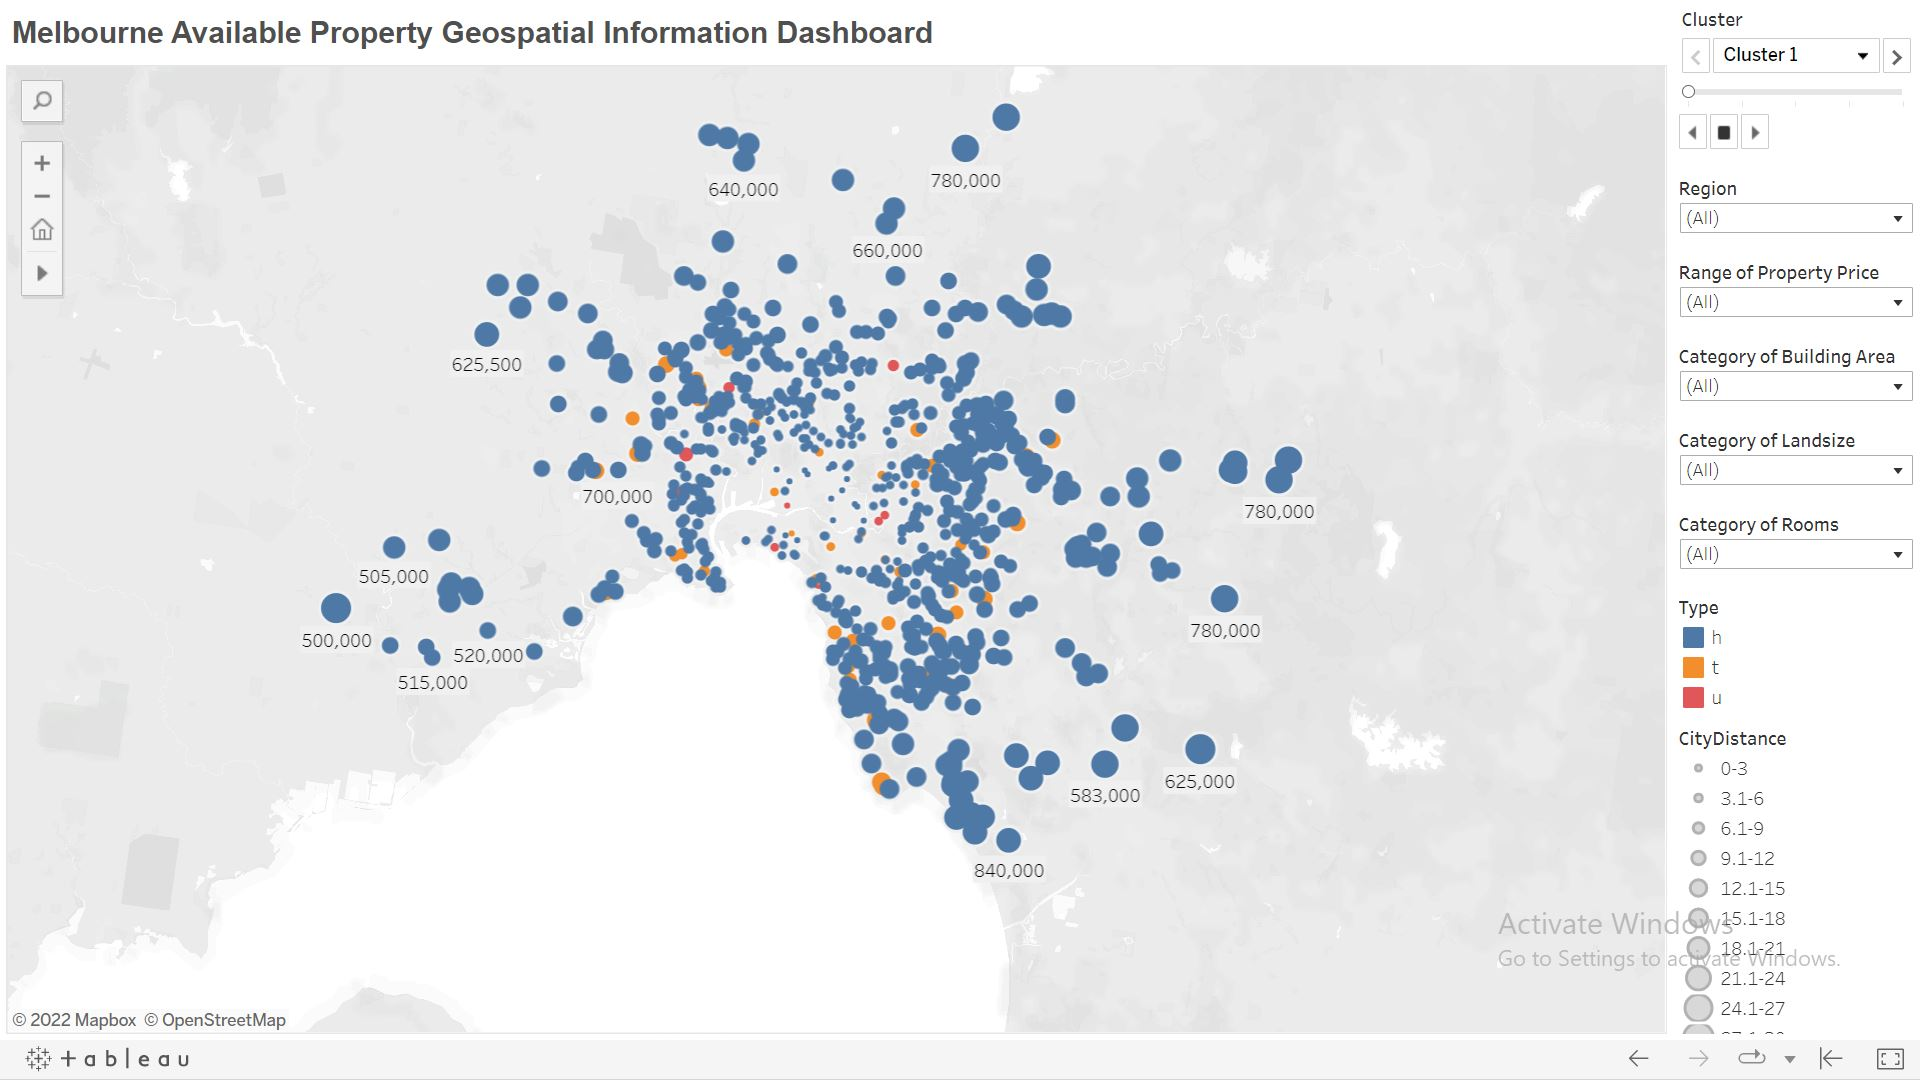

In [269]:
# Dashboard 1 (Semua data)
Image(filename='Cluster 1 All.JPG',width=1000, height=1000)

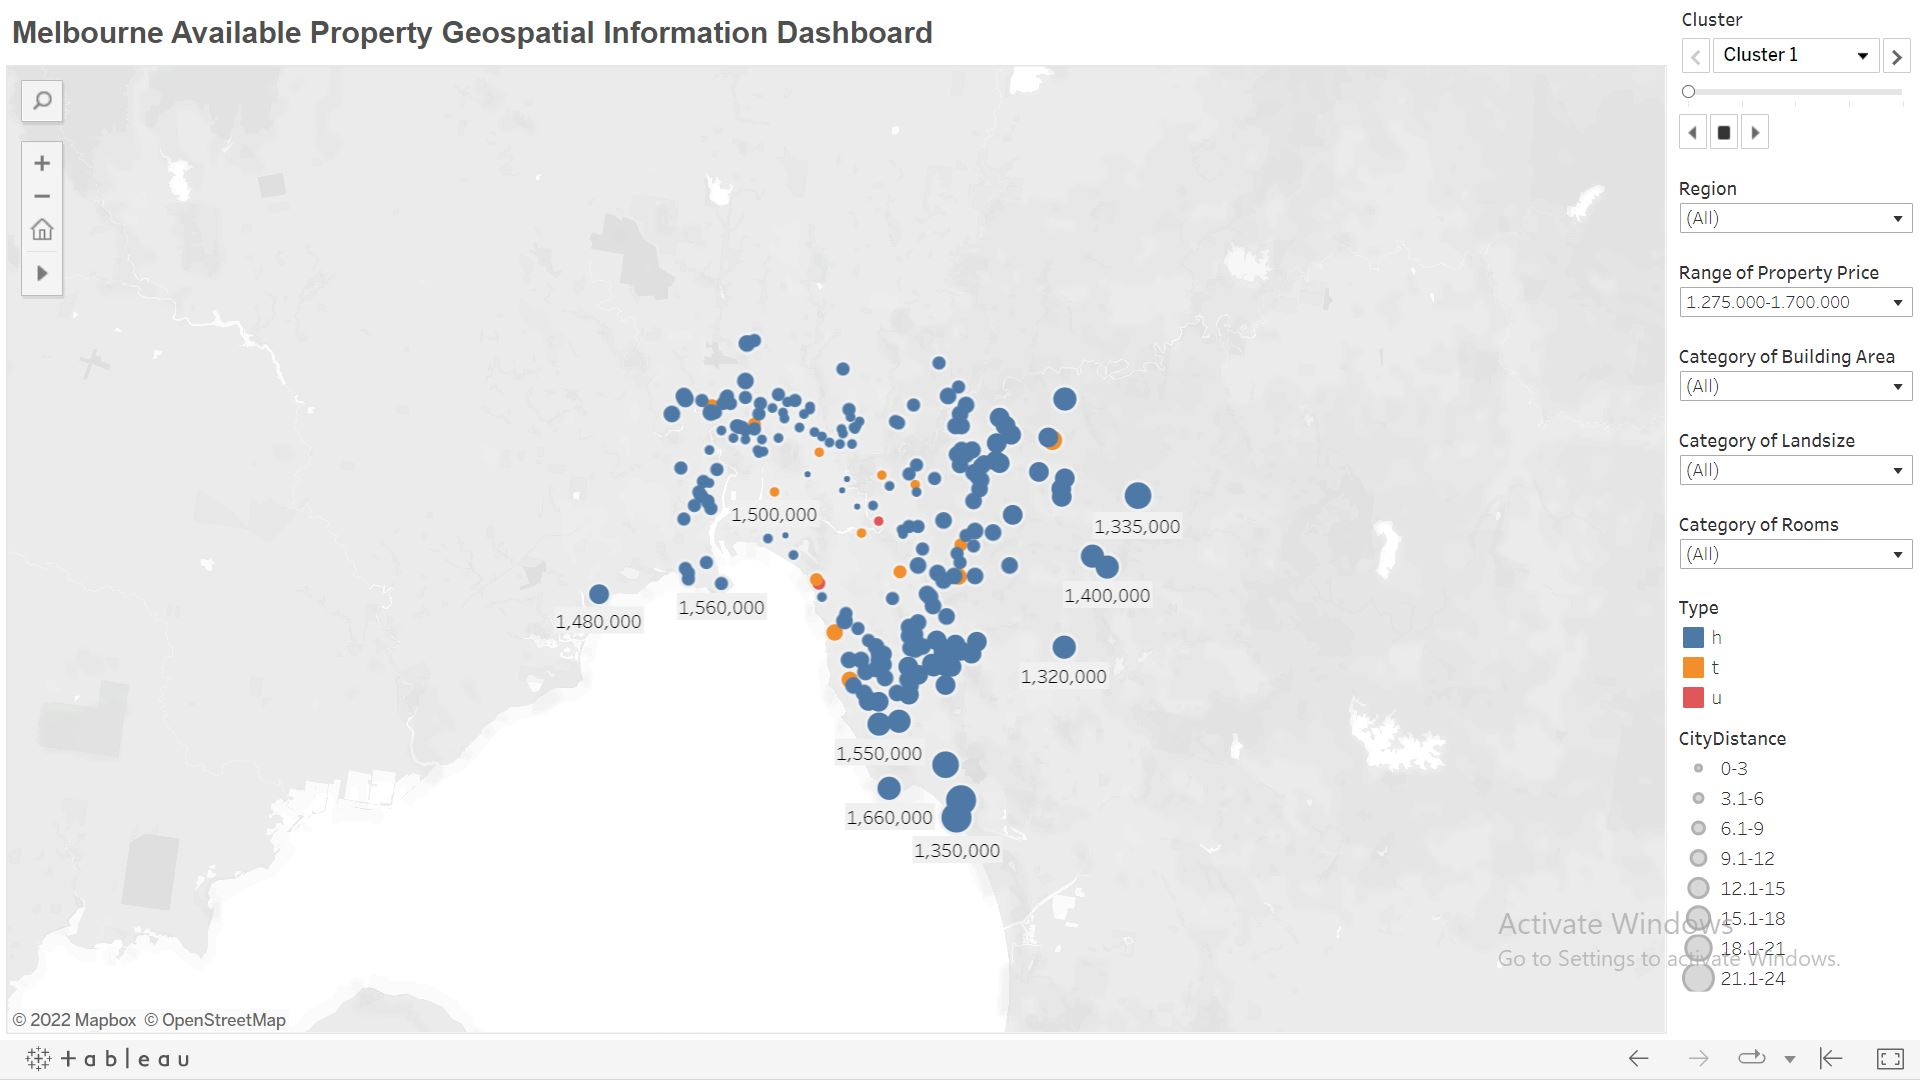

In [270]:
# Dashboard 2 (Filter oleh mayoritas kategori RangePrice)
Image(filename='Cluster 1 Price Range.JPG',width=1000, height=1000)

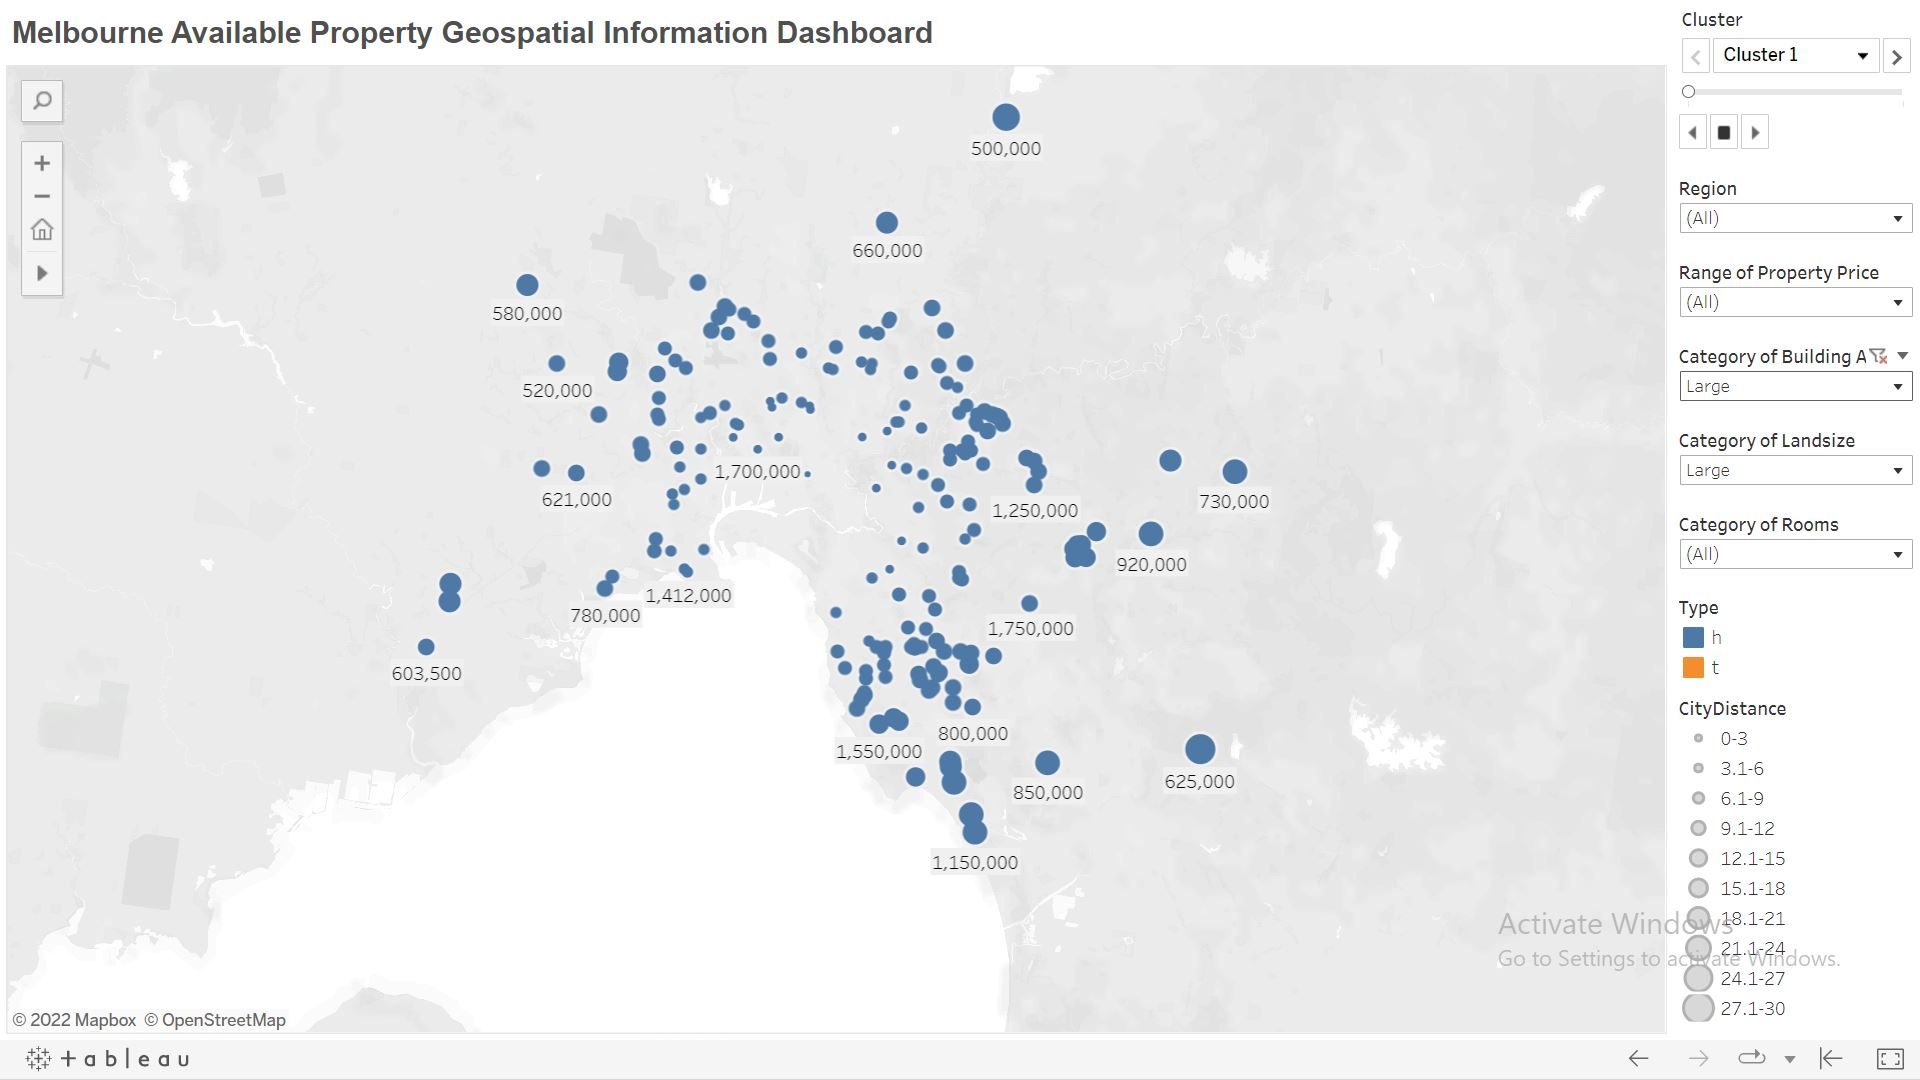

In [271]:
# Dashboard 3 (Filter oleh kategori BuildingArea dan Landsize terbanyak)
Image(filename='Cluster 1 Land-Building Range.JPG',width=1000, height=1000)

1. **Dashboard 1:** Berisikan visualisasi dari semua data pada Cluster 1, dimana terlihat di dominasi oleh oleh Type property h, pada umumnya tersebar pada Region Southern, Western, Eastern, dan Northern Metropolitan. Cluster ini merupakan Cluster dengan jumlah property terbanyak ketiga.
2. **Dashboard 2:** Berisikan visualisasi Cluster 1 dengan menggunakan kategori Range of Property Price terbanyak pada Cluster ini yakni 1.250.000-1.700.000. Property pada rentang harga ini mayoritas berada pada daerah dekat dengan CBD Kota Melbourne.
3. **Dashboard 3:** Berisikan visualisasi Cluster 1 dengan menggunakan kategori Category of Building Area dan Category of Landsize terbanyak pada Cluster ini yakni Large. Property pada kategori ini sudah terlihat menyebar dan tidak terlalu berkumpul pada daerah CBD.

## Cluster 2

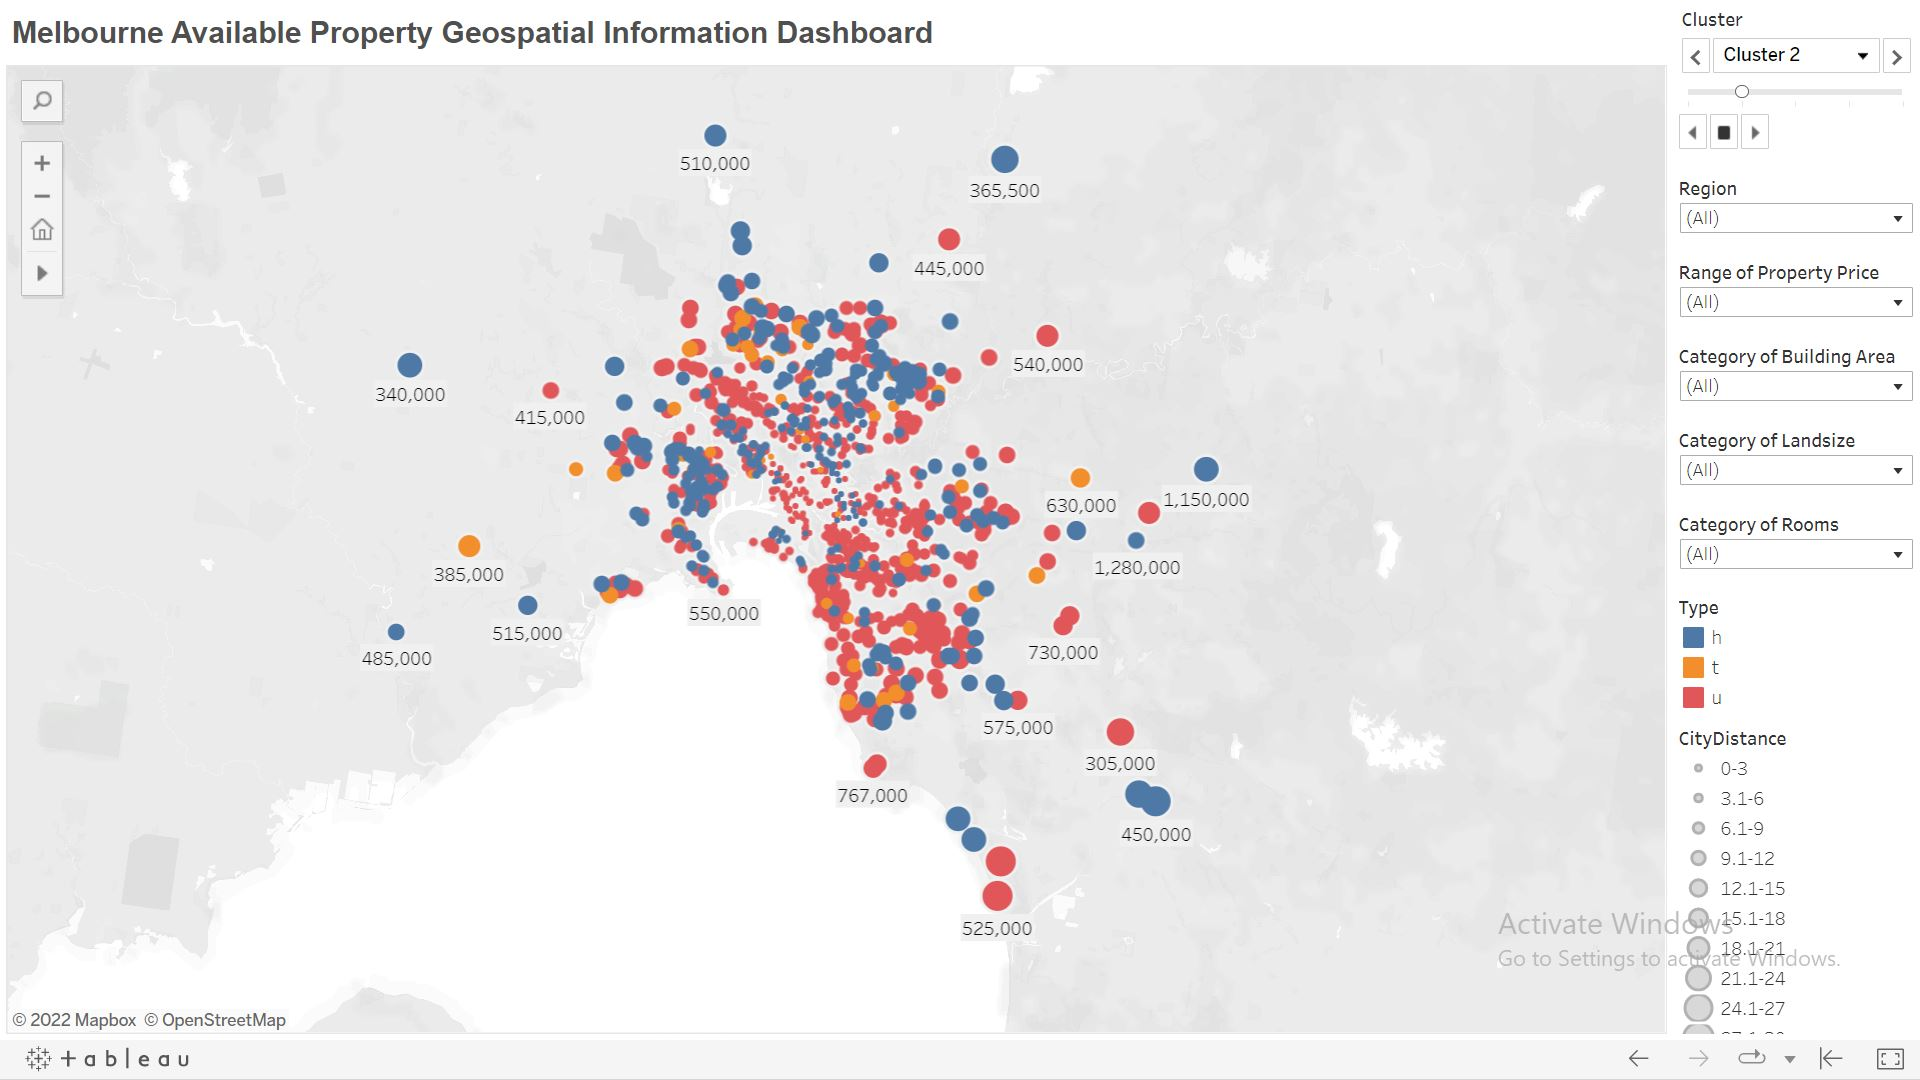

In [272]:
# Dashboard 1 (Semua data)
Image(filename='Cluster 2 All.JPG',width=1000, height=1000)

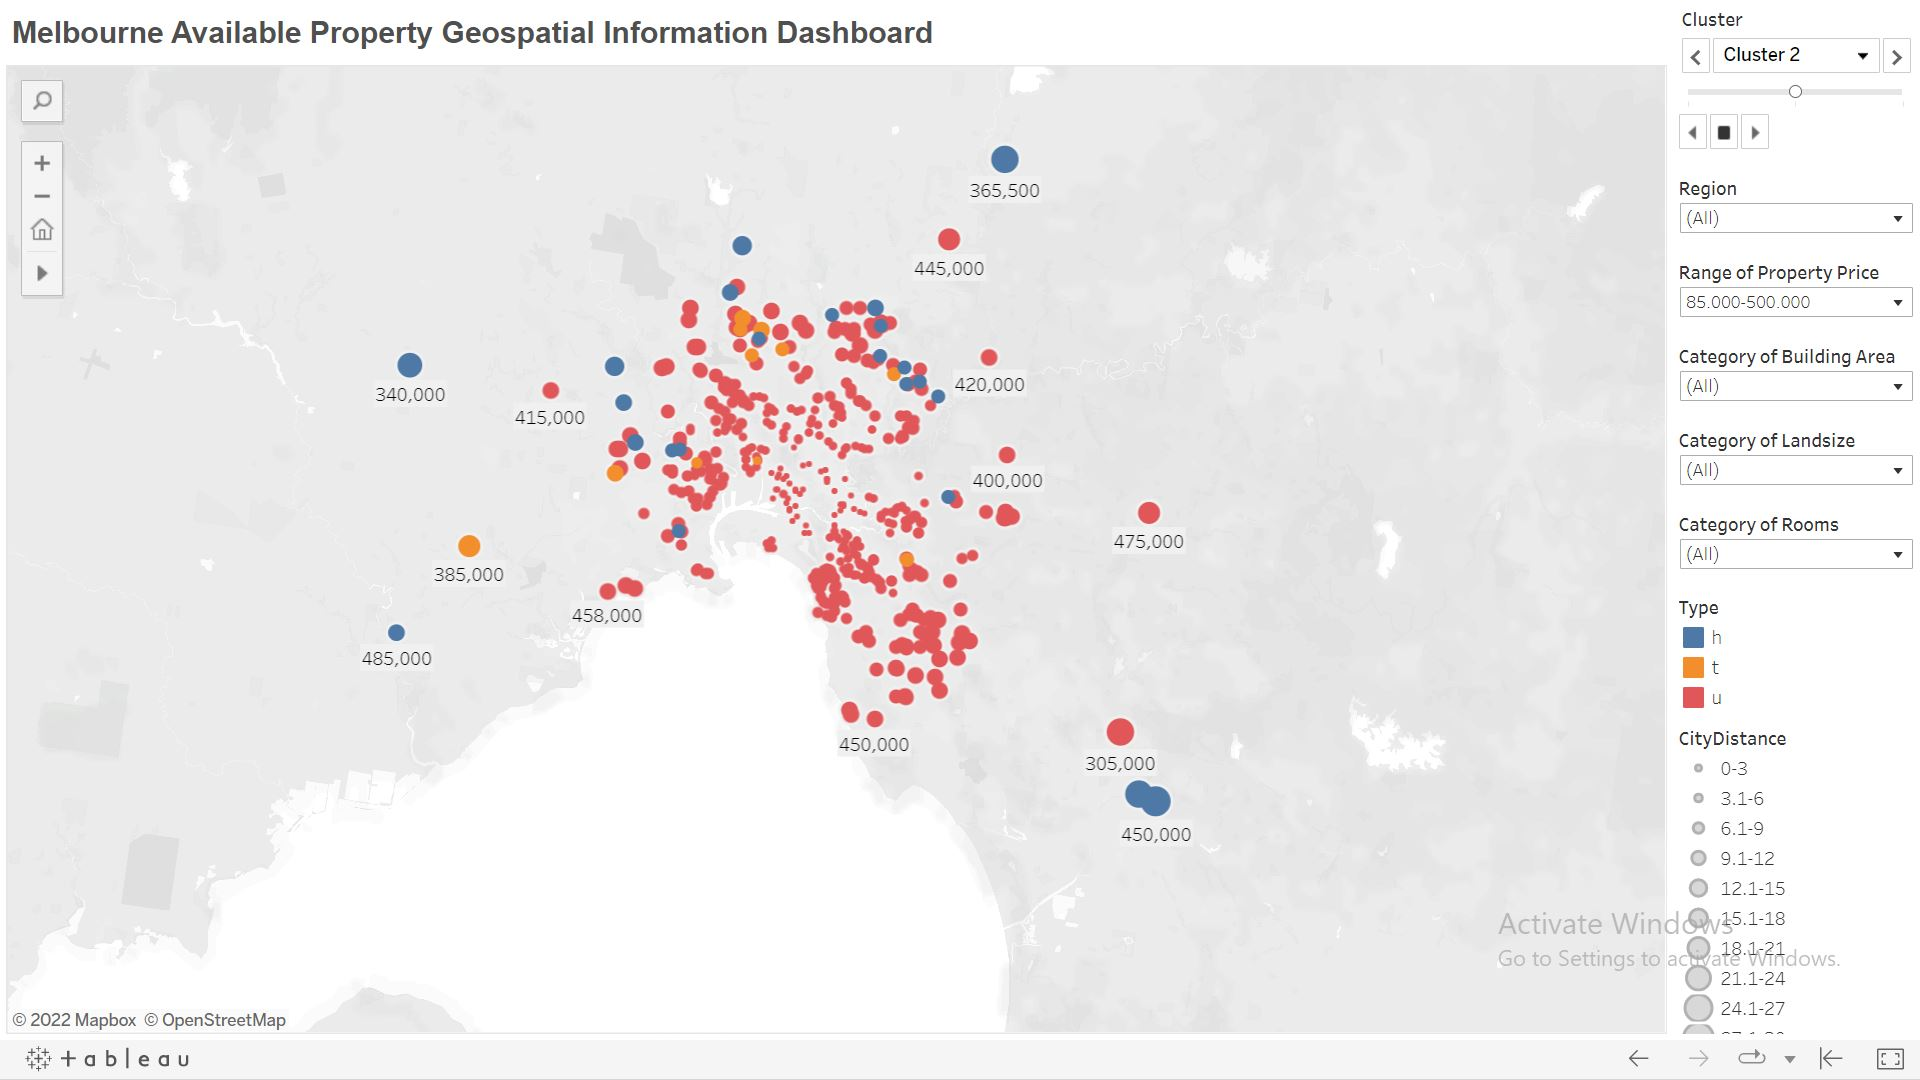

In [273]:
# Dashboard 2 (Filter oleh mayoritas kategori RangePrice)
Image(filename='Cluster 2 Price Range.JPG',width=1000, height=1000)

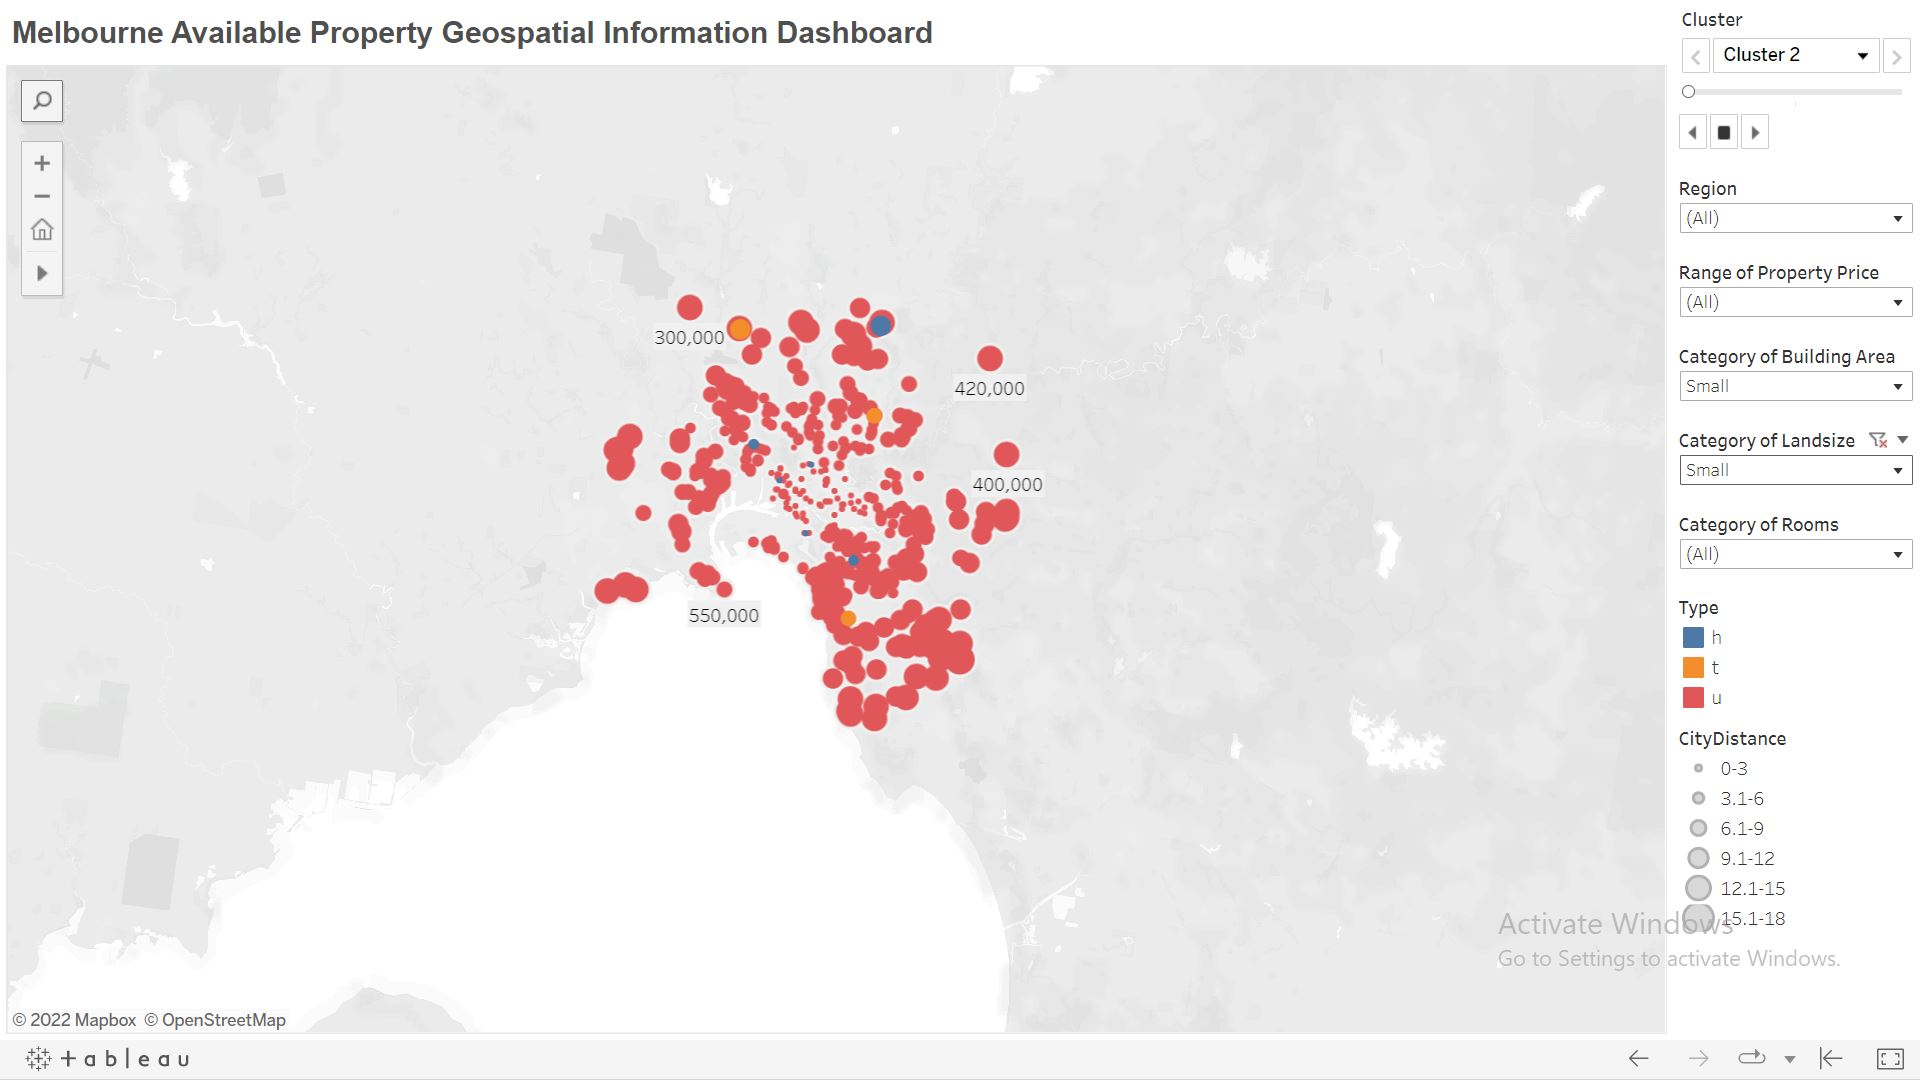

In [284]:
# Dashboard 3 (Filter oleh kategori BuildingArea dan Landsize terbanyak)
Image(filename='Cluster 2 Land-Building Range.JPG',width=1000, height=1000)

1. **Dashboard 1:** Berisikan visualisasi dari semua data pada Cluster 2, dimana terlihat di dominasi oleh oleh Type property u, pada umumnya tersebar pada Region Southern, Western, Eastern, dan Northern Metropolitan. Cluster ini merupakan Cluster dengan jumlah property terbanyak kedua.
2. **Dashboard 2:** Berisikan visualisasi Cluster 2 dengan menggunakan kategori Range of Property Price terbanyak pada Cluster ini yakni 85.000-500.000 (terendah dibandingkan semua Cluster). Property pada rentang harga ini mayoritas berada pada daerah dekat dengan CBD Kota Melbourne.
3. **Dashboard 3:** Berisikan visualisasi Cluster 2 dengan menggunakan kategori Category of Building Area dan Category of Landsize terbanyak pada Cluster ini yakni Small. Property pada kategori ini sudah terlihat lebih terkumpul pada daerah pusat CBD.

## Cluster 3

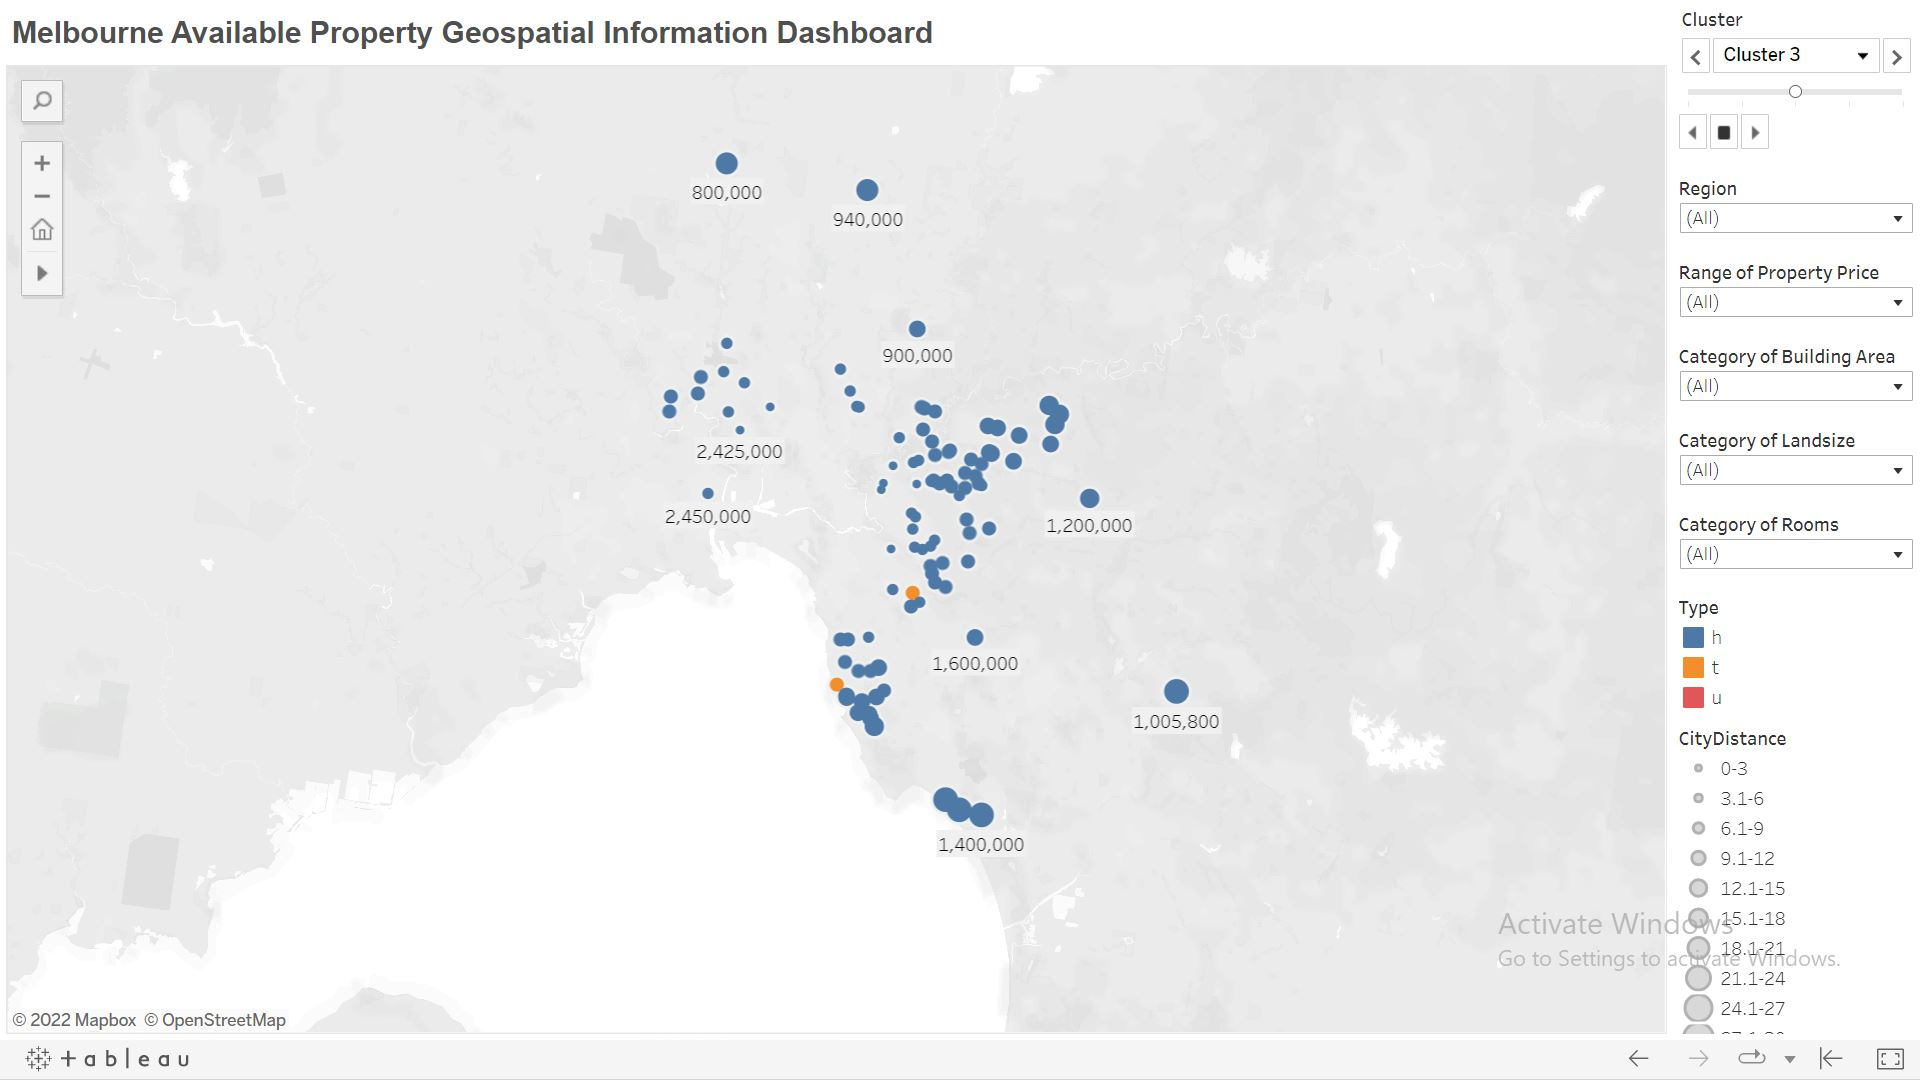

In [275]:
# Dashboard 1 (Semua data)
Image(filename='Cluster 3 All.JPG',width=1000, height=1000)

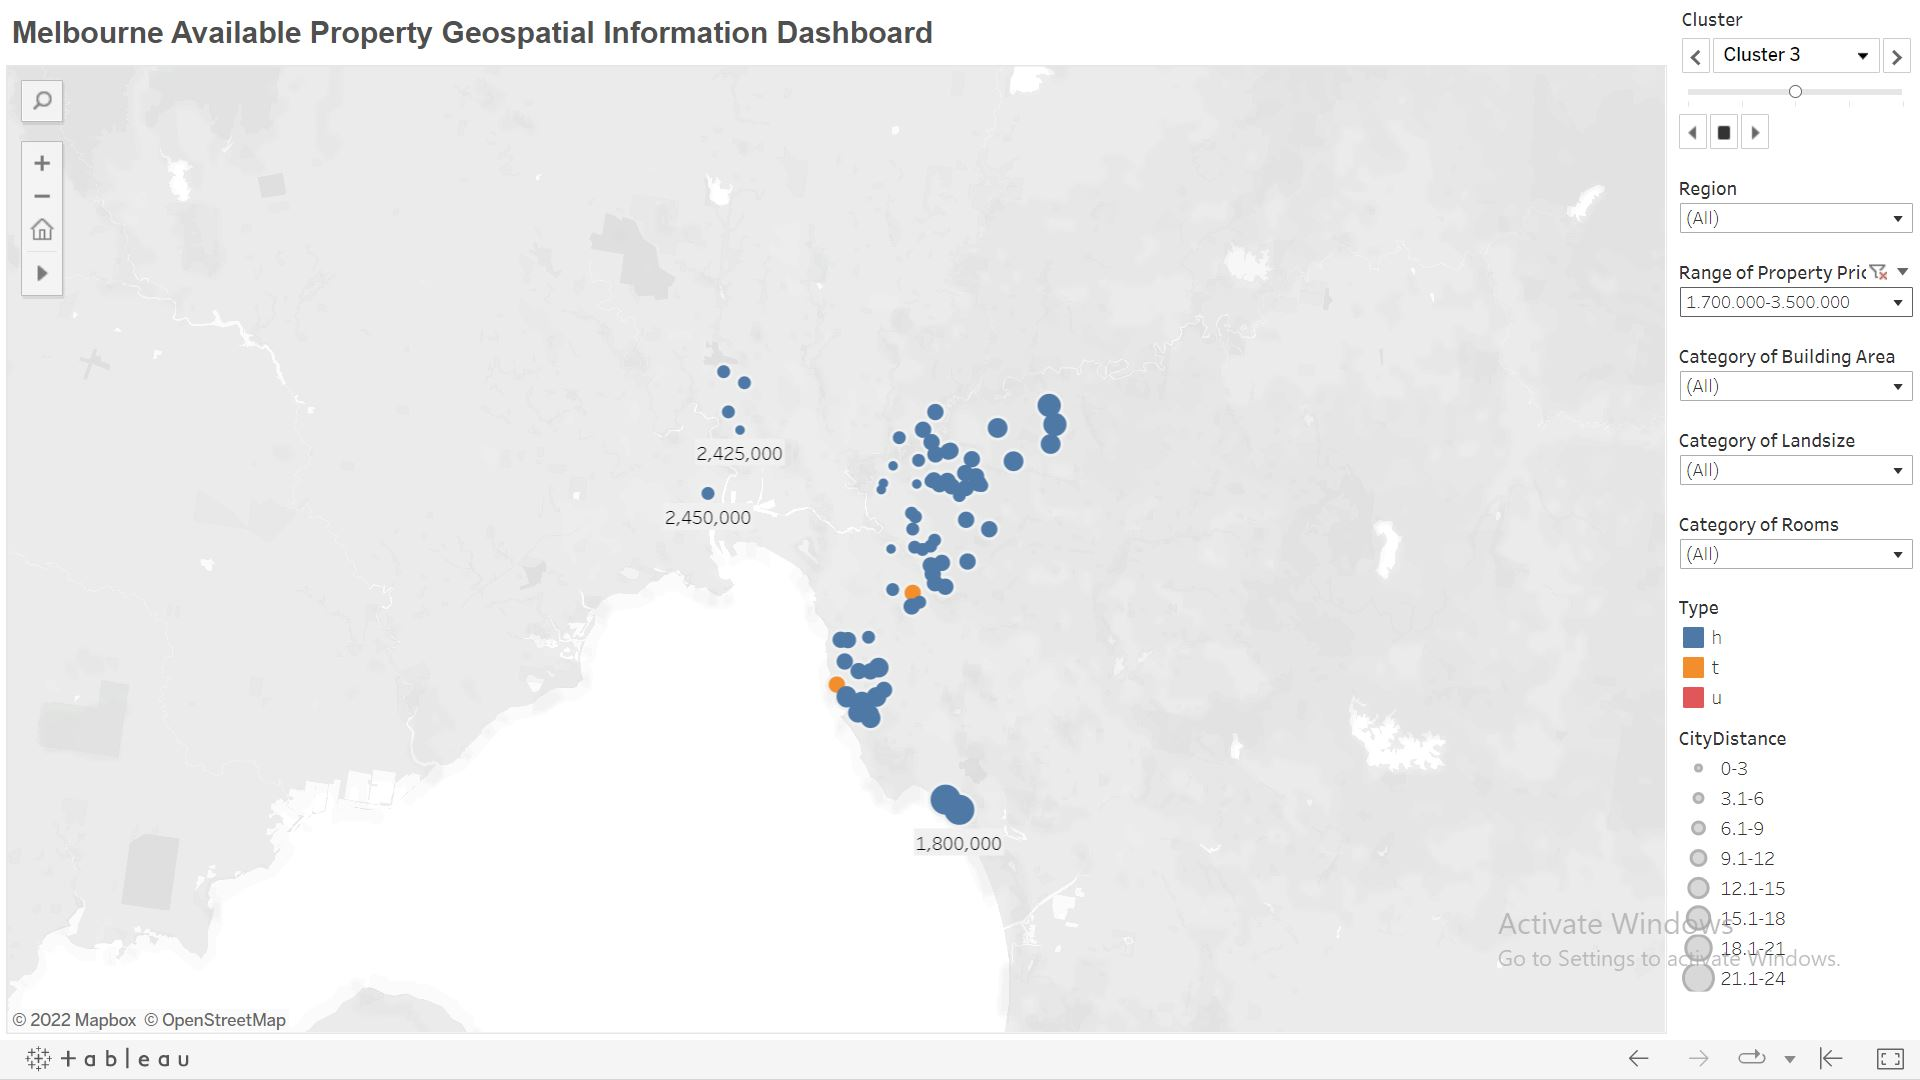

In [276]:
# Dashboard 2 (Filter oleh mayoritas kategori RangePrice)
Image(filename='Cluster 3 Price Range.JPG',width=1000, height=1000)

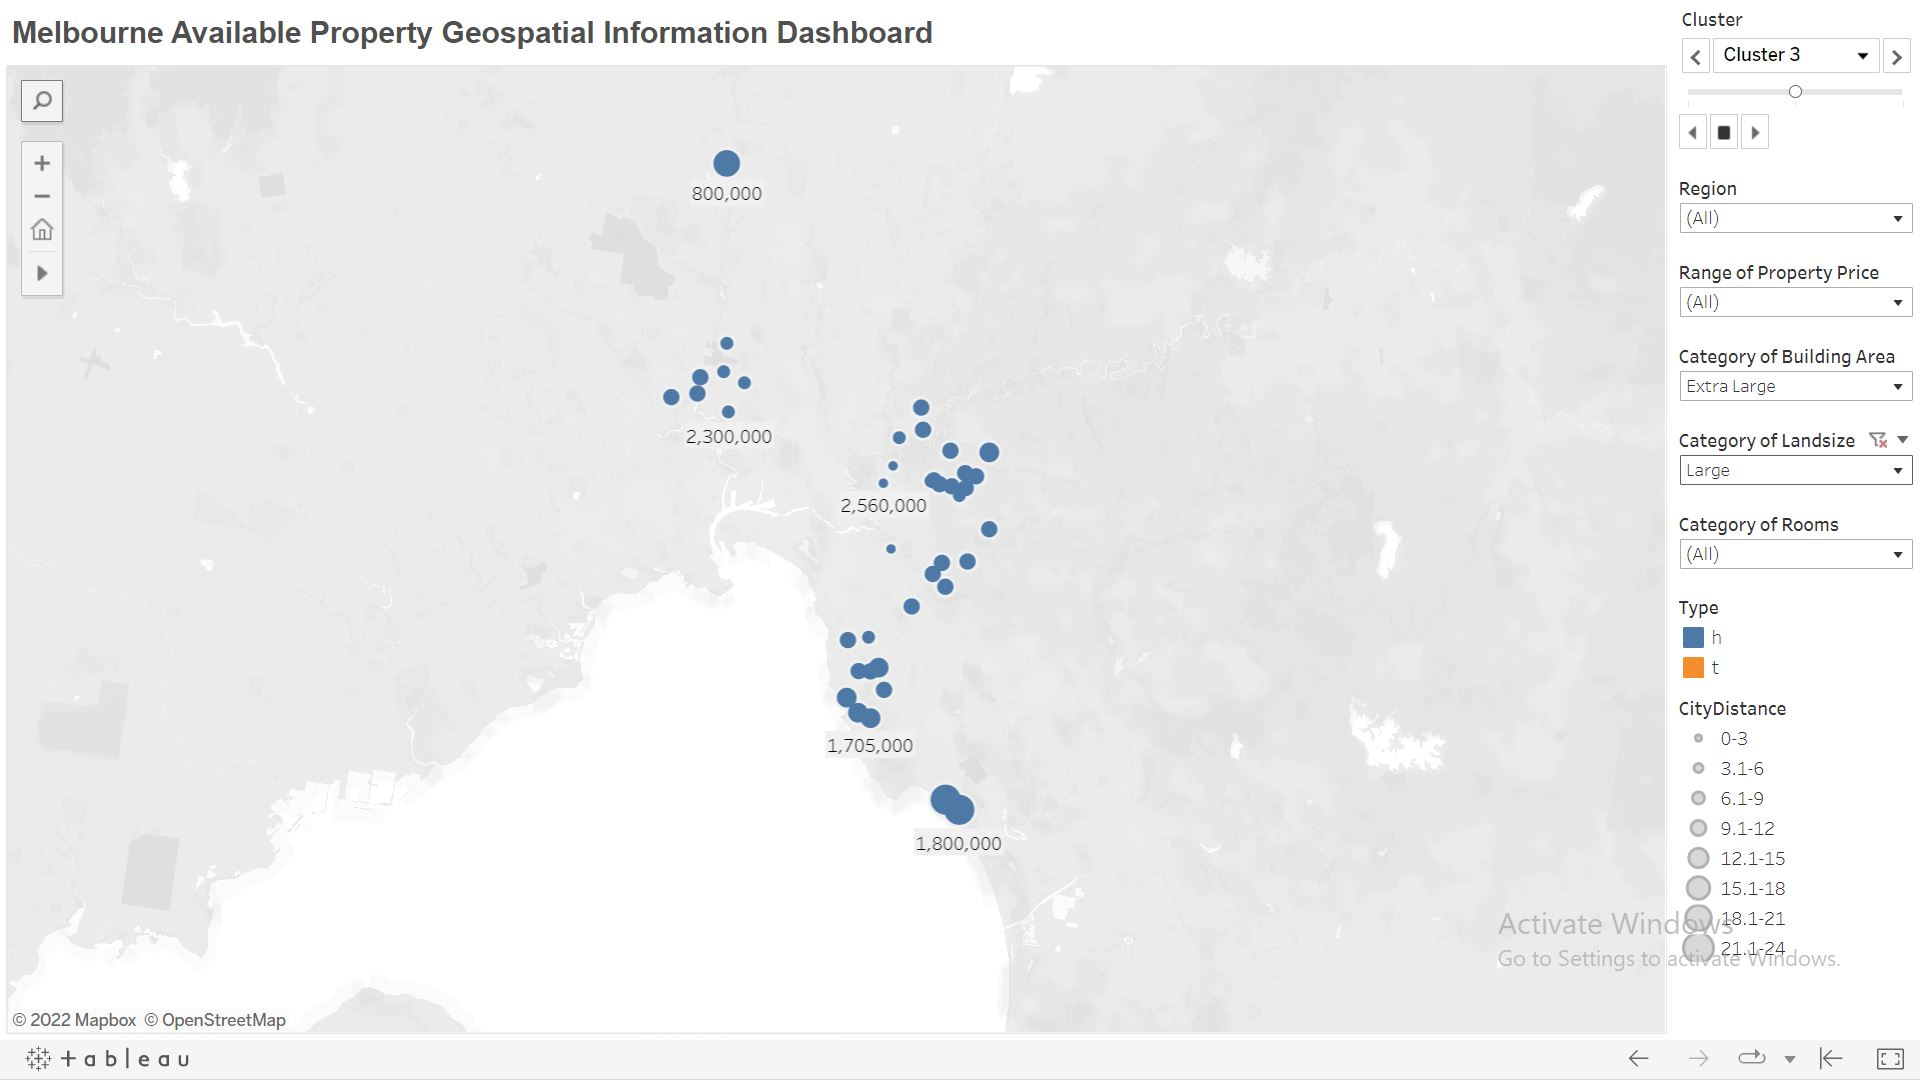

In [277]:
# Dashboard 3 (Filter oleh kategori BuildingArea dan Landsize terbanyak)
Image(filename='Cluster 3 Land-Building Range.JPG',width=1000, height=1000)

1. **Dashboard 1:** Berisikan visualisasi dari semua data pada Cluster 3, dimana terlihat di dominasi oleh oleh Type property h, pada umumnya tersebar pada Region Southern dan Eastern Metropolitan. Cluster ini merupakan Cluster dengan jumlah property paling sedikit.
2. **Dashboard 2:** Berisikan visualisasi Cluster 3 dengan menggunakan kategori Range of Property Price terbanyak pada Cluster ini yakni 1.700.000-3.500.000 (tertinggi dibandingkan semua Cluster). Property pada rentang harga ini mayoritas berada pada daerah timur dan selatan dari Kota Melbourne dan tidak terlalu dekat dengan CBD karnea memiliki jarak sekitar 9-12km ke CBD.
3. **Dashboard 3:** Berisikan visualisasi Cluster 3 dengan menggunakan kategori Category of Building Area terbanyak pada Cluster ini yakni Extra Large serta kategori Category of Landsize terbanyak pada Cluster ini yakni Large. Property pada rentang harga ini mayoritas berada pada daerah timur dan selatan dari Kota Melbourne dan tidak terlalu dekat dengan CBD karnea memiliki jarak sekitar 9-12km ke CBD.

## Cluster 4

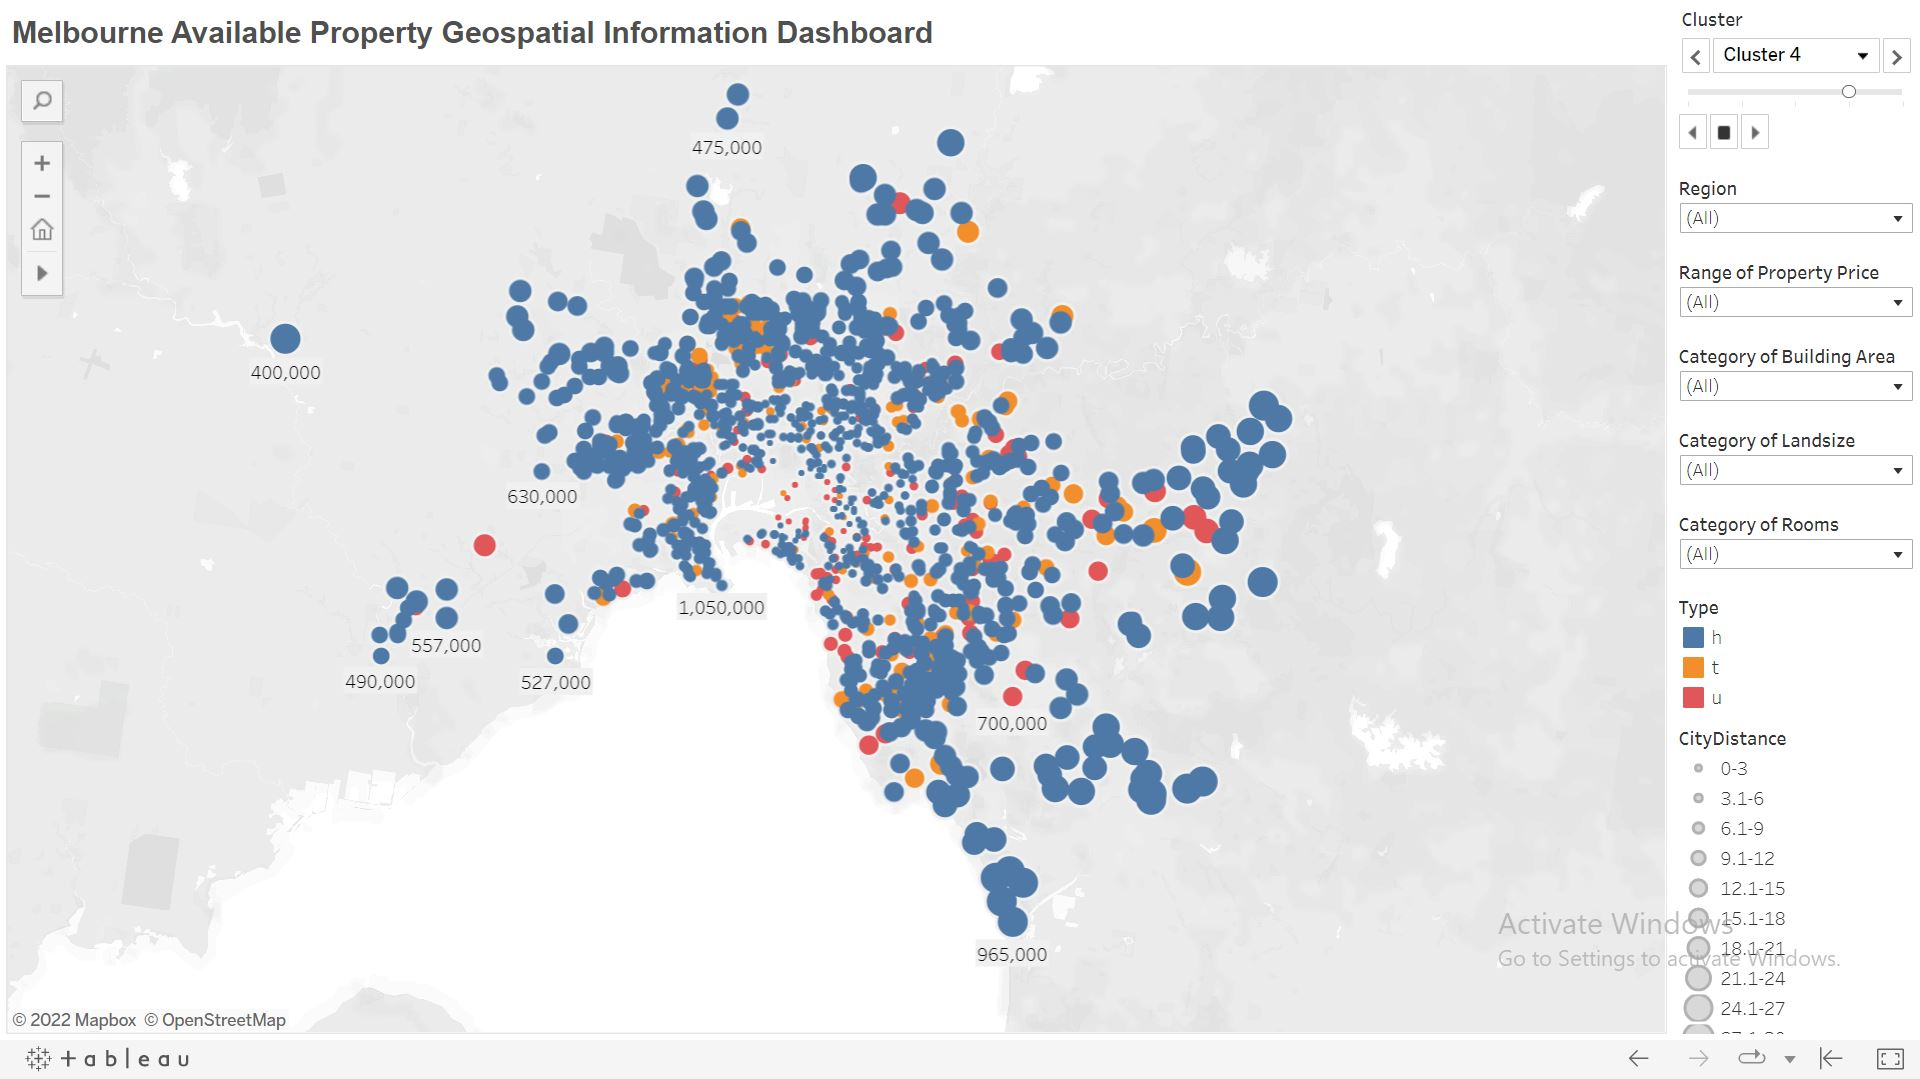

In [278]:
# Dashboard 1 (Semua data)
Image(filename='Cluster 4 All.JPG',width=1000, height=1000)

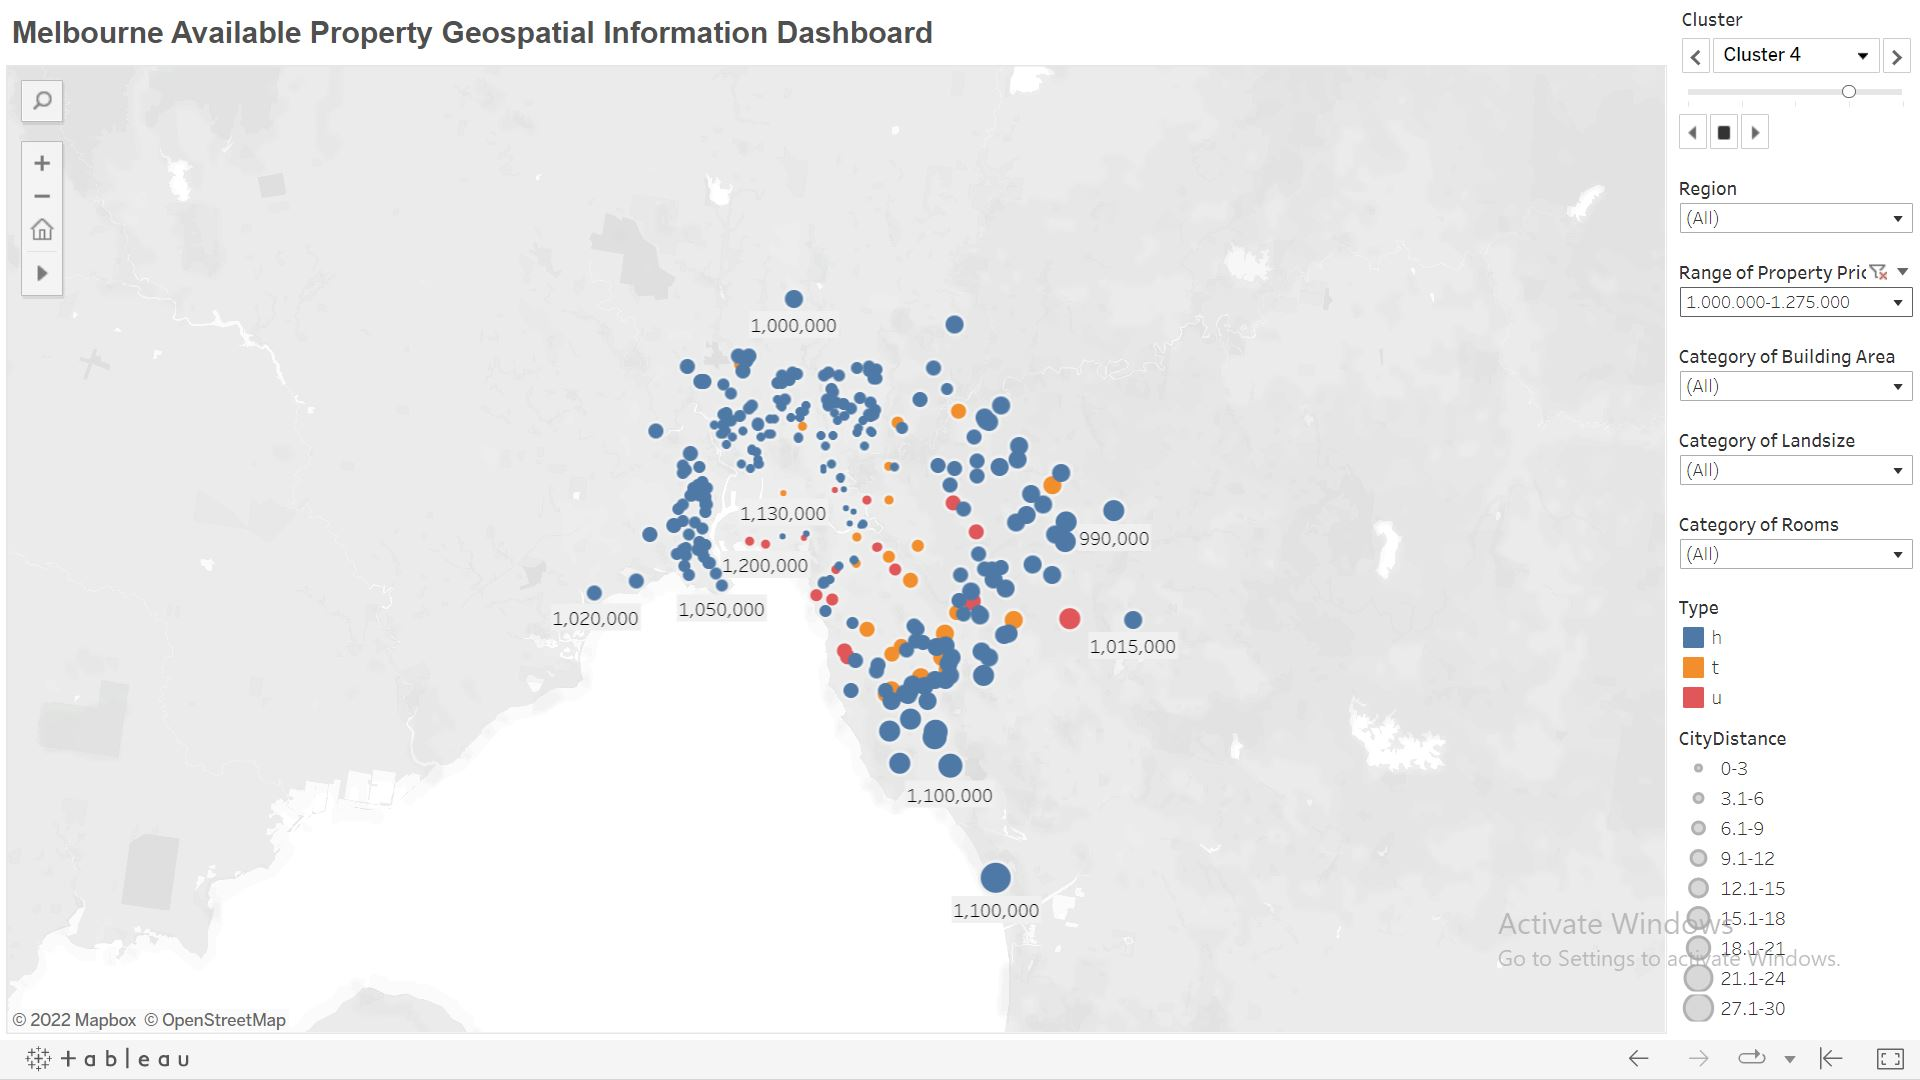

In [279]:
# Dashboard 2 (Filter oleh mayoritas kategori RangePrice)
Image(filename='Cluster 4 Price Range.JPG',width=1000, height=1000)

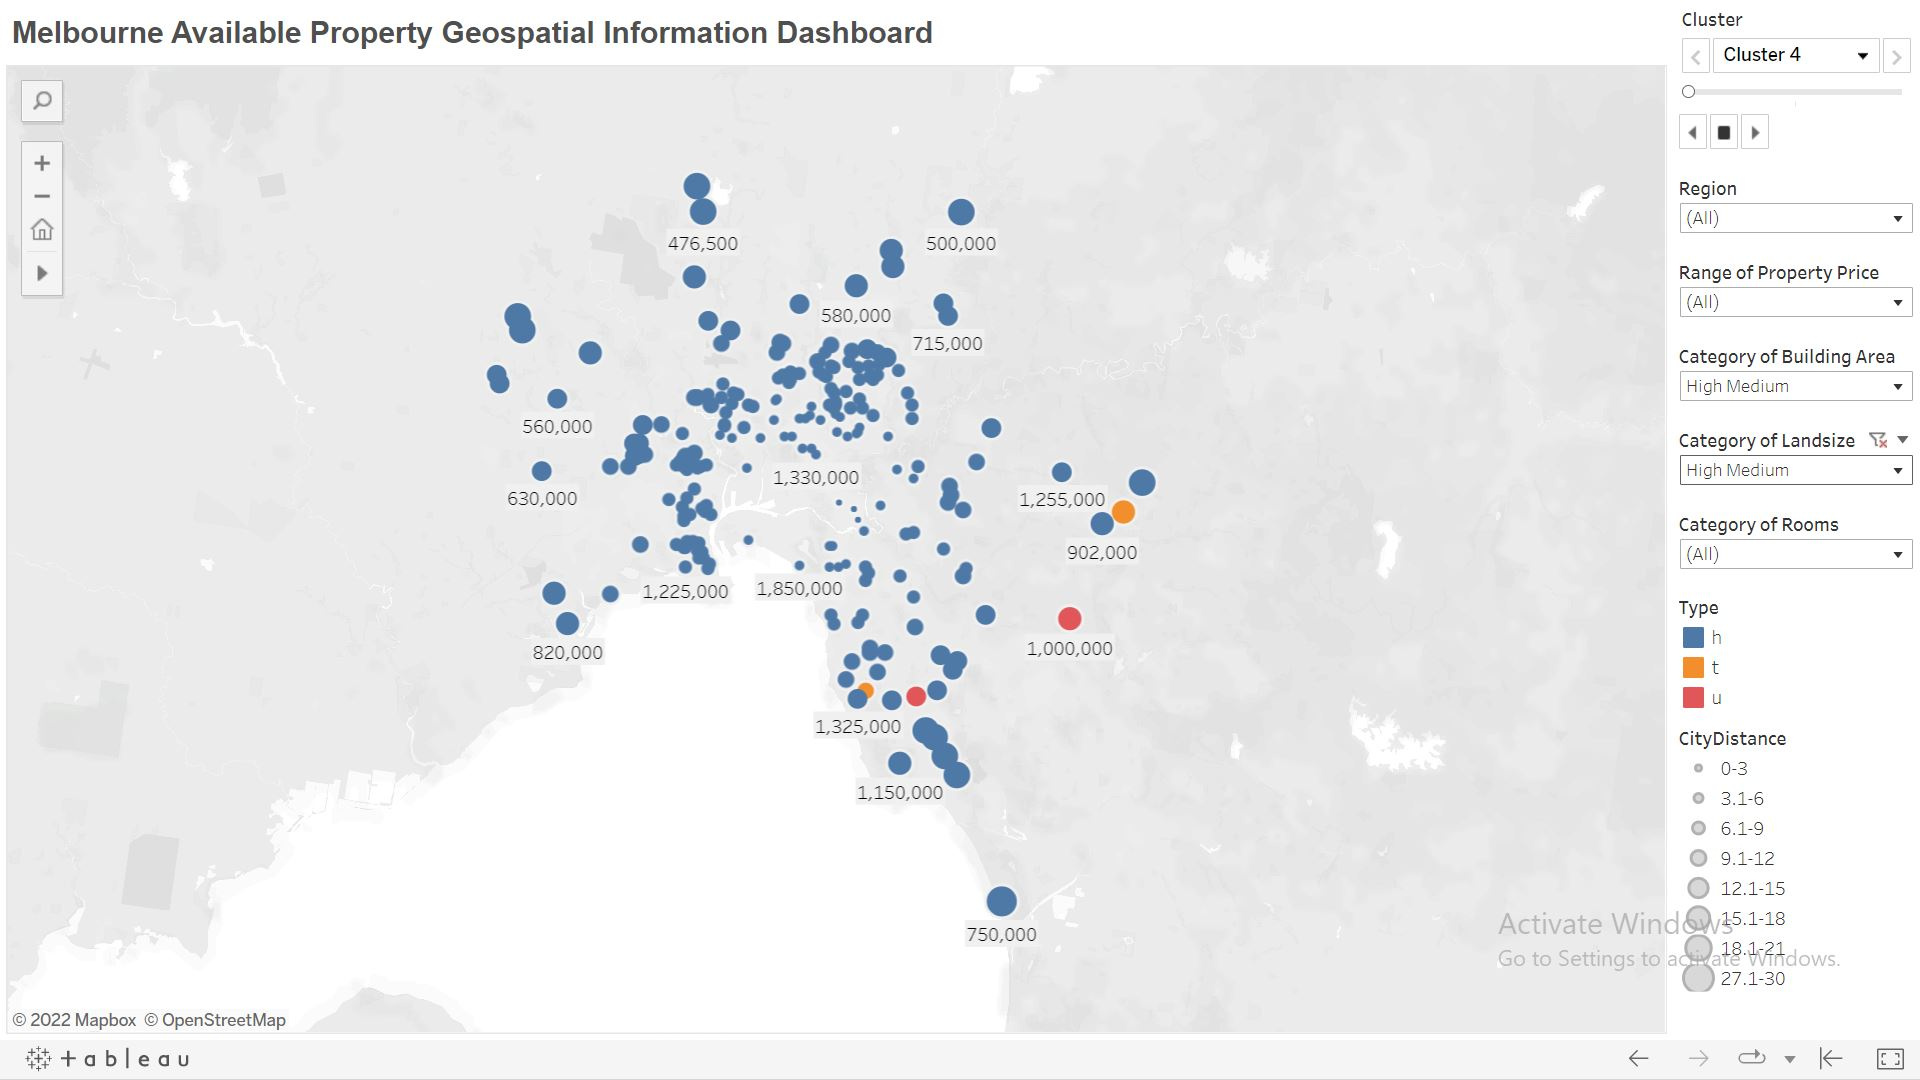

In [280]:
# Dashboard 3 (Filter oleh kategori BuildingArea dan Landsize terbanyak)
Image(filename='Cluster 4 Land-Building Range.JPG',width=1000, height=1000)

1. **Dashboard 1:** Berisikan visualisasi dari semua data pada Cluster 4, dimana terlihat di dominasi oleh oleh Type property h, pada umumnya tersebar pada Region Southern, Eastern, Western, dan Northern Metropolitan. Cluster ini merupakan Cluster dengan jumlah property terbanyak.
2. **Dashboard 2:** Berisikan visualisasi Cluster 4 dengan menggunakan kategori Range of Property Price terbanyak pada Cluster ini yakni 1.000.000-1.250.000. Property pada rentang harga ini mayoritas berada dekat dengan CBD Kota Melbourne untuk daerah Northern dan Western, sementara untuk daerah Eastern dan Southern berada tidak terlalu dekat dengan CBD kota Melbourne.
3. **Dashboard 3:** Berisikan visualisasi Cluster 4 dengan menggunakan kategori Category of Building Area dan Category of Landsize terbanyak pada Cluster ini yakni High Medium. Property pada kategori terlihat tidak terlalu dekat dengan CBD kota Melbourne dan juga lebih tersebar pada daerah Western dan Northern Metropolitan.

## Cluster 5

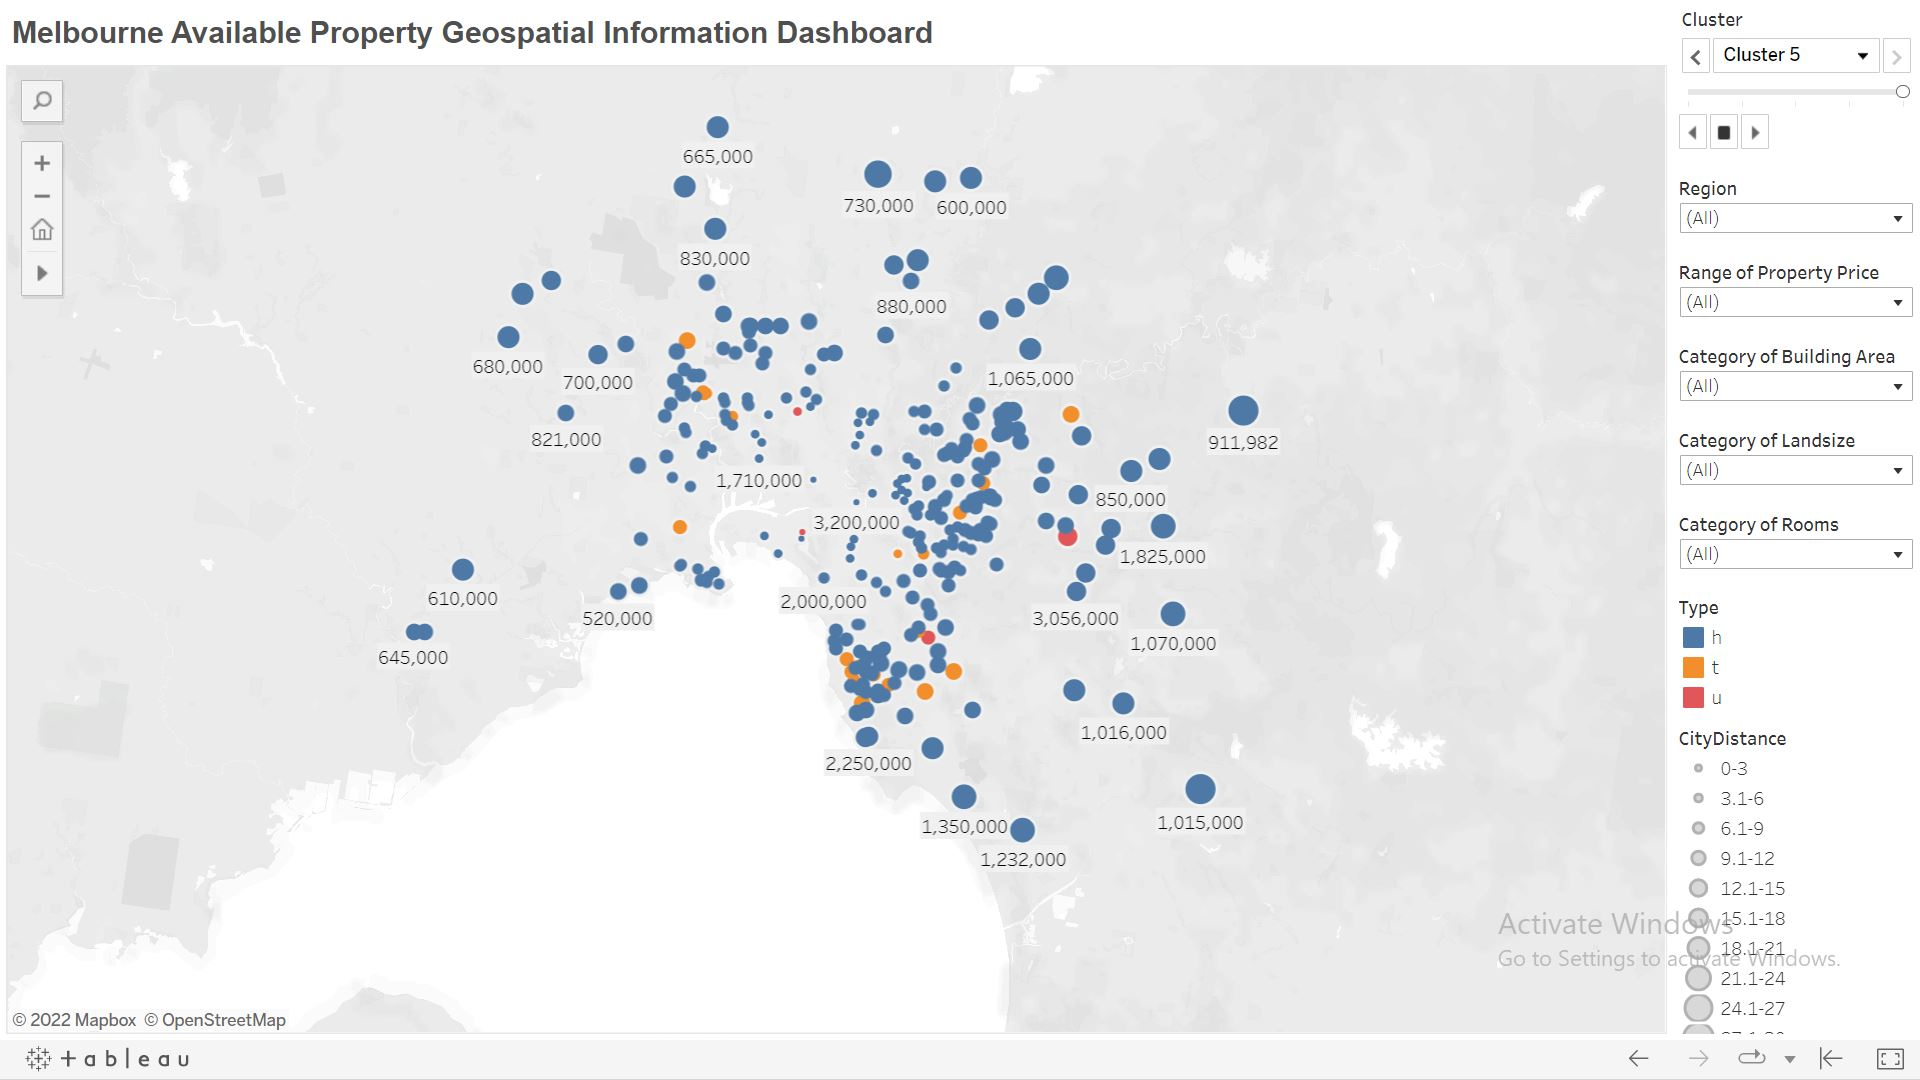

In [281]:
# Dashboard 1 (Semua data)
Image(filename='Cluster 5 All.JPG',width=1000, height=1000)

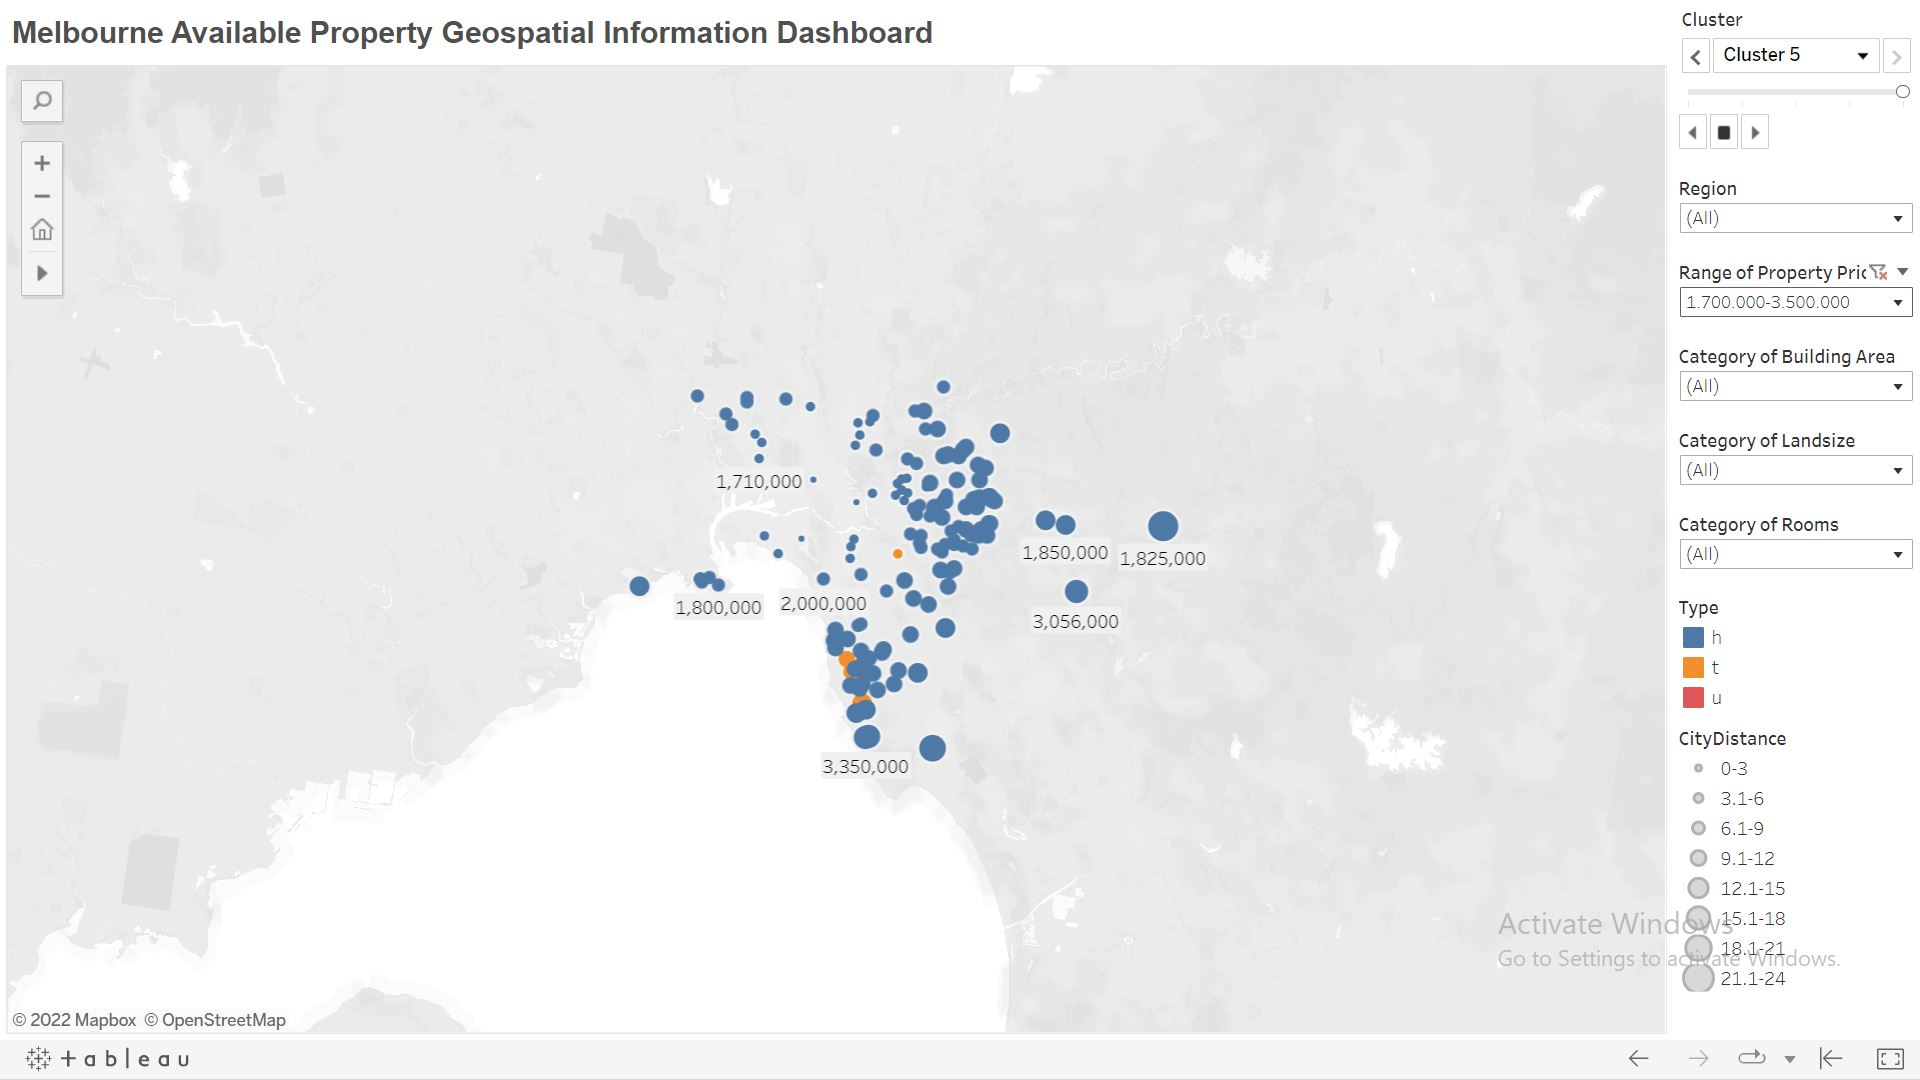

In [282]:
# Dashboard 2 (Filter oleh mayoritas kategori RangePrice)
Image(filename='Cluster 5 Price Range.JPG',width=1000, height=1000)

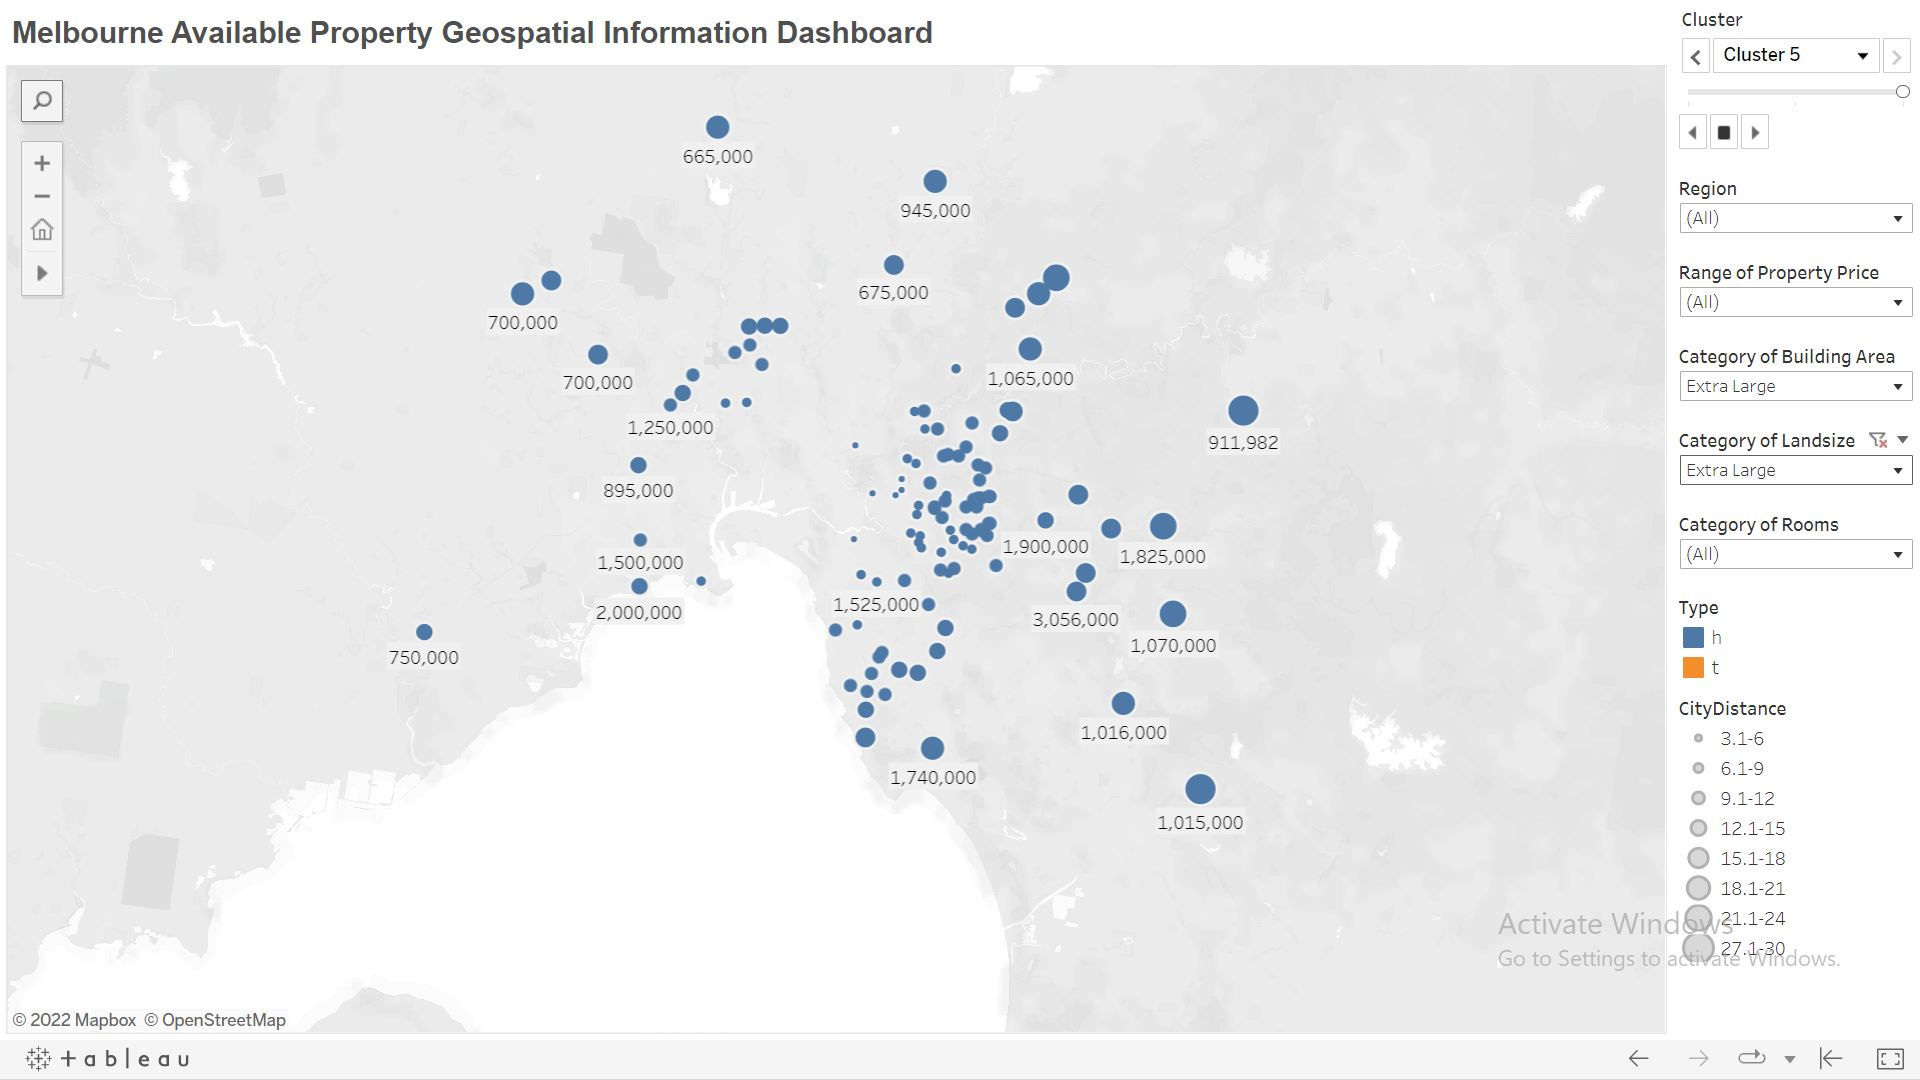

In [283]:
# Dashboard 3 (Filter oleh kategori BuildingArea dan Landsize terbanyak)
Image(filename='Cluster 5 Land-Building Range.JPG',width=1000, height=1000)

1. **Dashboard 1:** Berisikan visualisasi dari semua data pada Cluster 5, dimana terlihat di dominasi oleh oleh Type property h, pada umumnya tersebar pada Region Southern, Eastern, dan Northern Metropolitan. Cluster ini merupakan Cluster dengan jumlah property terbanyak keempat.
2. **Dashboard 2:** Berisikan visualisasi Cluster 5 dengan menggunakan kategori Range of Property Price terbanyak pada Cluster ini yakni 1.700.000-3.500.000 (tertinggi dibandingkan semua Cluster). Property pada rentang harga ini mayoritas berada pada daerah timur dan selatan dari Kota Melbourne dan tidak terlalu dekat hingga jauh dengan CBD karena memiliki jarak sekitar 12.1-15km ke CBD. Property hanya terdapat pada daerah Eastern dan Southern Metropolotan.
3. **Dashboard 3:** Berisikan visualisasi Cluster 5 dengan menggunakan kategori Category of Building Area dan Landsize terbanyak pada Cluster ini yakni Extra Large. Property pada rentang harga ini mayoritas berada pada daerah timur dan selatan dari Kota Melbourne dan tidak terlalu dekat hingga jauh dengan CBD karena memiliki jarak sekitar 12.1-15km ke CBD. Selain itu dapat dilihat bahwa property yang memiliki BuildingArea dan Landsize yang sangat besar mayoritas berada jauh dari CBD namun dengan harga yang relatif murah, dibandingkan dengan harga property yang berada dekat dengan CBD (Dashboard 2).

# Kesimpulan akhir dan Rekomendasi untuk Perusahaan Property

## Kesimpulan
1. **Data yang digunakan** pada proses analisis dan pemodelan hanya menggunakan data property yang sekiranya **dapat dijual dan dapat di akuisisi oleh pihak Perusahaan Property (Method: SP,PI,SA,VB)**. Karena berdasarkan bisnis proses, perusahaan agen property hanya tertarik pada property yang akan dijual oleh masyarakat, sehingga hanya **Property dengan kategori `Available`** saja yang digunakan untuk proses analisis dan modelling.
2. Dalam pemodelan Unsupervised Clustering, saya menggunakan **11 kolom dan 3929 baris data** yang relevan terhadap pemodelan.
3. Terdapat dua jenis Pre-Processing untuk mencari nilai PCA terbaik:
    * **Pre-processing (Semua dengan Proses Scaling)**, pada jenis Pre-Processing ini semua data numerik melewati proses scaling. Algoritma PCA digunakan untuk melihat berapa banyak informasi yang tersimpan pada proses ini dan proses ini menyimpan informasi pada 2 komponen pertama sebesar **63.43 %**.
    * **Pre-processing (Beberapa dengan Proses Scaling)**, pada jenis Pre-Processing ini hanya kolom Price saja yang melewati proses scaling. Algoritma PCA digunakan untuk melihat berapa banyak informasi yang tersimpan pada proses ini dan proses ini menyimpan informasi pada 2 komponen pertama sebesar **99.68 %**.
   Proses PCA menggunakan Pre-Processing kedua dipilih karena menyimpan informasi yang paling banyak (99.68%)
4. Algoritma yang digunakan pada proses Unsupervised Learning adalah **K-Means Clustering**.
5. Berdasarkan algoritma K-Means Clusering, **jumlah cluster optimum adalah 5 Cluster** dengan **silhouette score 0.63**.
6. Feature Engineering digunakan untuk memudahkan dalam proses analisa hasil model. Feature Engineering yang digunakan berupa kategorisasi data numerik. Hasil dari feature engineering ini adalah kolom `RangePrice`, `CategorizedRooms`, `CategorizedLandsize`, `CategorizedBuildingArea`, dan `CityDistance`.
7. Penjualan property terbanyak ada pada rentang bulan **Maret-September** atau pada musim **Fall-Winter**.
8. Property yang dapat diperjual belikan paling banyak terdapat pada region Southern Metropolitan, kedua berada pada Northern Metropolitan, ketiga pada Western Metropolitan, dan keempat pada Eastern Metropolitan.
9. Berikut adalah hasil analisis singkat mengenai karakteristik dari masing-masing cluster:
    1. **Cluster 1**: Dominasi oleh property perumahan dengan harga yang lumayan tinggi, jumlah ruangan yang cukup banyak dengan luas bangunan yang cukup besar dan luas tanah yang luas. Cluster ini cocok untuk para warga kota dengan kemampuan ekonomi menengah keatas.
    2. **Cluster 2**: Dominasi oleh duplex atau apartment dengan harga murah, jumlah ruangan yang sedikit dengan luas tanah dan bangunan yang kecil namun sangat dekat dengan CBD. Cluster ini cocok untuk para warga kota dengan kemampuan ekonomi menengah kebawah atau para pekerja kantoran.
    3. **Cluster 3**: Dominasi oleh pemukiman warga dengan harga yang sangat mahal (mansion atau villa mewah). Mayoritas cluster ini memiliki jumlah ruangan yang banyak dengan luas tanah yang besar dan luas bangunan sangat besar. Cluster ini cocok untuk para warga kota dengan kemampuan ekonomi kelas atas hingga kaya raya.
    4. **Cluster 4**: Dominasi oleh property berupa perumahan dengan harga yang sedang, jumlah ruangan yang sedang dengan luas tanah dan bangunan yang tidak terlalu besar hingga sedang. Cluster ini cocok untuk para warga kota dengan kemampuan ekonomi menengah, hingga menengah kebawah.
    5. **Cluster 5**: Dominasi oleh pemukiman warga dengan harga yang sangat mahal (villa atau cottage mewah). Mayoritas cluster ini memiliki jumlah ruangan yang banyak dengan luas tanah dan luas bangunan yang sangat besar. Mayoritas jarak pada cluster ini cukup jauh dengan pusat kota. Cluster ini cocok untuk para warga kota dengan kemampuan ekonomi kelas atas hingga kaya raya.
10. Tableau Public digunakan untuk menganalisis dan memvisualisasikan persebaran setiap Cluster dan property berdasarkan persebaran geografis. Dashboard Tableau tersebut dapat dilihat pada link berikut [**(Tableau Visualization)**](https://public.tableau.com/app/profile/muh.rivaldi.prabowo/viz/MelbourneAvailablePropertyGeospatialInformationDashboard/GeographicalInfromation?publish=yes)
11. Analisa dan modelling menggunakan Unsupervised Learning: Clustering sangat membantu perusahaan agen property dalam mengenali keadaan sebenarnya dari pasar property Kota Melbourne, mulai dari property mana saja yang dapat dijual pada Kota Melbourne, kapan transaksi jual beli property banyak terjadi, mengenali karakteristik dari setiap kluster property, segmentasi calon pembeli property berdasarkan kluster property, hingga mengetahui persebaran setiap property pada Kota Melbourne.

## Rekomendasi untuk Perusahaan Property
1. Lakukan proses marketing dan pemasaran yang gencar terutama pada rentang bulan Maret-September dimana pada bulan-bulan tersebut banyak terjadi transaksi jual-beli property.
2. Batasi daerah pemasaran dan operasi berdasarkan jumlah property yang dijual pada region tertentu. Saya menyarankan gencarkan bagian pemasaran pada region Southern Metropolitan, Northern Metropolitan, Western Metropolitan, dan terakhir pada Eastern Metropolitan.
3. Sesuaikan rekomendasi property kepada customer berdasarkan profil dari customer lalu sesuaikan dengan Cluster property yang ada, contoh:
    * **Customer dengan kemampuan ekonomi menengah keatas dan ingin memiliki property dapat diarahkan untuk melihat property Cluster 1.**
    * **Customer dengan kemampuan ekonomi menengah kebawah atau para pekerja kantoran yang ingin memiliki property dekat dengan kantornya dapat diarahkan untuk melihat property Cluster 2.**
    * **Customer dengan kemampuan ekonomi kelas atas hingga kaya raya dan ingin memiliki perumahan mewah bertingkat dan dekat dengan kota dapat diarahkan untuk melihat property Cluster 3.**
    * **Customer dengan kemampuan ekonomi menengah dan ingin memiliki perumahan sederhana dapat diarahkan untuk melihat property Cluster 4.**
    * **Customer dengan kemampuan ekonomi kelas atas hingga kaya raya dan ingin memiliki property mewah namun jauh dari hiruk-pikuk perkotaan dapat diarahkan untuk melihat property Cluster 5.**
4. Dahsboard pada Tableau Public dapat digunakan untuk menyeleksi spesifikasi pada setiap property.
5. Perusahaan Property juga harus jeli dalam mengakuisisi property yang akan dijual, contohnya:
    * Property dengan yang baru saja ditawar oleh perusahaan property lain (Method Vendor Bid) pada pelelangan dapat diambil oleh kita dengan cara menawar property pada harga lebih tinggi jika memang propertynya bagus untuk dijual kembali.
    * Selalu update mengenai property mana yang masuk ke dalam pelelangan (Method Property In), jika property menarik maka boleh ditawar dengan harga tinggi.
    * Perbanyak pemasaran dan iklan mengenai keuntungan menjual property pada perusahaan ini dibandingkan di perusahaan lain, sehingga masyarakat yang akan menjual property akan tertarik memakai jasa perusahaan ini.